# Practical Exercise

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load the red wine dataset using Pandas

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score

class NeuralNetwork:
    def __init__(self, samples, labels, size_hidden=30, eta=0.1, my=0.9, epochs=10, optimizer="sgd", verbose=False):
        self.samples = samples
        self.labels = labels
        self.w01 = np.random.random((len(self.samples[0]), size_hidden))
        self.w12 = np.random.random((size_hidden, len(self.labels[0])))
        self.v01 = np.zeros((len(self.samples[0]), size_hidden))
        self.v12 = np.zeros((size_hidden, len(self.labels[0])))
        self.g01 = np.zeros((len(self.samples[0]), size_hidden))
        self.g12 = np.zeros((size_hidden, len(self.labels[0])))
        self.b1 = np.array([0])
        self.b2 = np.array([0])
        self.eta = eta
        self.epochs = epochs
        self.my = my
        self.optimizer = optimizer
        self.verbose = verbose
        
    def relu(self, x, deriv=False):
        if deriv:
            return 1. * (x > 0)
        return x * (x > 0)

    def softmax(self, x, deriv=False):
        if deriv:
            return np.multiply(x, 1 - x)
        y = x - np.max(x)
        e_x = np.exp(y)
        return e_x / e_x.sum()

    def fit(self):
        accuracy = []
        no_epochs = []
        sample_no = 0
        
        if self.optimizer == "adagrad":
            gti_01 = np.zeros(len(self.w01[0]))
            gti_12 = np.zeros(len(self.w12[0]))

        for epoch in range(self.epochs):
            l1_delta_batch = 0
            l2_delta_batch = 0
            for i in range(len(self.samples)):
                sample_no += 1
                l0 = self.samples[i:i + 1]
                y = self.labels[i:i + 1]

                l1 = self.relu(np.dot(l0, self.w01) + 1 * self.b1)
                l2 = self.softmax(np.dot(l1, self.w12) + 1 * self.b2)

                l2_error = ((1 / 2) * np.power((y - l2), 2))
                l2_error_total = str(np.mean(np.abs(l2_error)))

                if l2_error_total == 1.0:
                    if self.verbose:
                        print("Overflow")
                    return
                
                l2_delta = (-1 * (y - l2))
                l2_delta = l2_delta * self.softmax(l2, deriv=True)
                l2_delta_batch += np.dot(l2_delta.T, l1)

                l1_delta = np.dot(l2_delta, self.w12.T) * self.relu(l1, deriv=True)
                l1_delta_batch += np.dot(l1_delta.T, l0)

            if self.optimizer == "adagrad":
                grad_12 = self.eta * l2_delta_batch.T
                self.g12 += np.power(grad_12, 2)
                adjusted_grad = grad_12 / np.sqrt(0.0000001 + self.g12)
                self.w12 = self.w12 - adjusted_grad

                grad_01 = self.eta * l1_delta_batch.T
                self.g01 += np.power(grad_01, 2)
                adjusted_grad = grad_01 / np.sqrt(0.0000001 + self.g01)
                self.w01 = self.w01 - adjusted_grad

            if self.optimizer == "sgd":
                self.w01 -= (self.eta / len(self.samples)) * l1_delta_batch.T
                self.w12 -= (self.eta / len(self.samples)) * l2_delta_batch.T

            if self.optimizer == "momentum":
                self.v01 = self.my * self.v01 + (self.eta / len(self.samples)) * l1_delta_batch.T
                self.w01 -= self.v01
                self.v12 = self.my * self.v12 + (self.eta / len(self.samples)) * l2_delta_batch.T
                self.w12 -= self.v12

            if epoch % 1 == 0:
                if self.verbose:
                    y_pred, y_true = self.predict(X_test, y_test)
                    acc = accuracy_score(y_true, y_pred)
                    precision = precision_score(y_true, y_pred, average='weighted')
                    recall = recall_score(y_true, y_pred, average='weighted')
                    f1 = f1_score(y_true, y_pred, average='weighted')
                    print("Epoch: ", epoch, " - Error: ", l2_error_total, " - Accuracy: ", acc, " - Precision: ", precision, " - Recall: ", recall, " - F1-Score: ", f1)
                    y_pred, y_true = self.predict(X_train, y_train)
                    print("Epoch: ", epoch, " - Error: ", l2_error_total, " - Accuracy: ", accuracy_score(y_true, y_pred))
                    print("############################################")

                    accuracy.append(acc)
                    no_epochs.append(sample_no)
        if self.verbose:
            return no_epochs, accuracy

    def predict(self, test_samples, test_labels):
        l1 = self.relu(np.dot(test_samples, self.w01) + 1 * self.b1)
        l2 = self.softmax(np.dot(l1, self.w12) + 1 * self.b2)
        # Get the index of the maximum probability for each sample
        y_pred = np.argmax(l2, axis=1)
        # Return the predicted class labels and true labels
        return y_pred, np.argmax(test_labels, axis=1)



In [3]:
dataset_path = "/kaggle/input/wineqt/WineQT.csv"
dataset = pd.read_csv(dataset_path)

In [4]:
# Separate features and labels
X = dataset.drop(columns=['quality']).values
y = dataset['quality'].values.reshape(-1, 1)

In [5]:
# One-hot encode labels
enc = OneHotEncoder()
enc.fit(y)
labels = enc.transform(y).toarray()

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Assuming X_train is your training data
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [9]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [10]:
# Transform the training data
X_train = scaler.transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  0  - Error:  0.06622071442207575  - Accuracy:  0.4017467248908297  - Precision:  0.2184592912678971  - Recall:  0.4017467248908297  - F1-Score:  0.2707205965558763
Epoch:  0  - Error:  0.06622071442207575  - Accuracy:  0.22210065645514224
############################################
Epoch:  1  - Error:  0.16481681932508593  - Accuracy:  0.3537117903930131  - Precision:  0.29682887677260406  - Recall:  0.3537117903930131  - F1-Score:  0.29712856034193186
Epoch:  1  - Error:  0.16481681932508593  - Accuracy:  0.37089715536105033
############################################
Epoch:  2  - Error:  0.11546408380324336  - Accuracy:  0.32751091703056767  - Precision:  0.6005812964328248  - Recall:  0.32751091703056767  - F1-Score:  0.34434958359153883
Epoch:  2  - Error:  0.11546408380324336  - Accuracy:  0.2986870897155361
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  3  - Error:  0.07773275546035868  - Accuracy:  0.519650655021834  - Precision:  0.5853946413702497  - Recall:  0.519650655021834  - F1-Score:  0.512938760067653
Epoch:  3  - Error:  0.07773275546035868  - Accuracy:  0.48468271334792123
############################################
Epoch:  4  - Error:  0.0781820993850691  - Accuracy:  0.5851528384279476  - Precision:  0.5813839005633995  - Recall:  0.5851528384279476  - F1-Score:  0.5710599626342866
Epoch:  4  - Error:  0.0781820993850691  - Accuracy:  0.5645514223194749
############################################
Epoch:  5  - Error:  0.07394457714430605  - Accuracy:  0.537117903930131  - Precision:  0.5161672824991602  - Recall:  0.537117903930131  - F1-Score:  0.5038297395748923
Epoch:  5  - Error:  0.07394457714430605  - Accuracy:  0.5361050328227571
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  6  - Error:  0.00030486707280326033  - Accuracy:  0.537117903930131  - Precision:  0.5240603155626297  - Recall:  0.537117903930131  - F1-Score:  0.5062554987809568
Epoch:  6  - Error:  0.00030486707280326033  - Accuracy:  0.5448577680525164
############################################
Epoch:  7  - Error:  0.06156943180672428  - Accuracy:  0.5633187772925764  - Precision:  0.48497400707007693  - Recall:  0.5633187772925764  - F1-Score:  0.5190119131002587
Epoch:  7  - Error:  0.06156943180672428  - Accuracy:  0.5579868708971554
############################################
Epoch:  8  - Error:  0.006869562740326667  - Accuracy:  0.537117903930131  - Precision:  0.5937187133880072  - Recall:  0.537117903930131  - F1-Score:  0.5117636344952871
Epoch:  8  - Error:  0.006869562740326667  - Accuracy:  0.550328227571116
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  9  - Error:  0.05230036573633912  - Accuracy:  0.5851528384279476  - Precision:  0.5820320259640425  - Recall:  0.5851528384279476  - F1-Score:  0.5834653935787498
Epoch:  9  - Error:  0.05230036573633912  - Accuracy:  0.5754923413566739
############################################
Epoch:  10  - Error:  0.030007344944651442  - Accuracy:  0.611353711790393  - Precision:  0.6350057321366958  - Recall:  0.611353711790393  - F1-Score:  0.5691023934210201
Epoch:  10  - Error:  0.030007344944651442  - Accuracy:  0.5798687089715536
############################################
Epoch:  11  - Error:  0.0214771513096145  - Accuracy:  0.49344978165938863  - Precision:  0.5187378077868702  - Recall:  0.49344978165938863  - F1-Score:  0.44870924520295186
Epoch:  11  - Error:  0.0214771513096145  - Accuracy:  0.5218818380743983
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Epoch:  12  - Error:  0.04453724955814923  - Accuracy:  0.6026200873362445  - Precision:  0.6216961966196731  - Recall:  0.6026200873362445  - F1-Score:  0.5823262476971349
Epoch:  12  - Error:  0.04453724955814923  - Accuracy:  0.6028446389496718
############################################
Epoch:  13  - Error:  5.244559153094159e-06  - Accuracy:  0.5545851528384279  - Precision:  0.6021073156574933  - Recall:  0.5545851528384279  - F1-Score:  0.5398442818713161
Epoch:  13  - Error:  5.244559153094159e-06  - Accuracy:  0.5525164113785558
############################################
Epoch:  14  - Error:  0.04236301557626901  - Accuracy:  0.611353711790393  - Precision:  0.5998435920539069  - Recall:  0.611353711790393  - F1-Score:  0.60200109908223
Epoch:  14  - Error:  0.04236301557626901  - Accuracy:  0.6137855579868708
############################################
Epoch:  15  - Error:  0.04014288730257101  - Accuracy:  0.5327510917030568  - Precision:  0.5126974272636398  - Recall:  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  18  - Error:  9.707648591339408e-06  - Accuracy:  0.4978165938864629  - Precision:  0.4764971760398913  - Recall:  0.4978165938864629  - F1-Score:  0.48648285192200924
Epoch:  18  - Error:  9.707648591339408e-06  - Accuracy:  0.5043763676148797
############################################
Epoch:  19  - Error:  0.12551955595869801  - Accuracy:  0.5545851528384279  - Precision:  0.6512570399033282  - Recall:  0.5545851528384279  - F1-Score:  0.5040360344111815
Epoch:  19  - Error:  0.12551955595869801  - Accuracy:  0.513129102844639
############################################
Epoch:  20  - Error:  4.436641806399562e-09  - Accuracy:  0.537117903930131  - Precision:  0.5329635416566075  - Recall:  0.537117903930131  - F1-Score:  0.5281190790523582
Epoch:  20  - Error:  4.436641806399562e-09  - Accuracy:  0.5251641137855579
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  21  - Error:  0.15039939443012276  - Accuracy:  0.6157205240174672  - Precision:  0.6271754952218214  - Recall:  0.6157205240174672  - F1-Score:  0.6018159378352032
Epoch:  21  - Error:  0.15039939443012276  - Accuracy:  0.563457330415755
############################################
Epoch:  22  - Error:  1.3546203323117619e-11  - Accuracy:  0.5240174672489083  - Precision:  0.6406569587427735  - Recall:  0.5240174672489083  - F1-Score:  0.5206523556677857
Epoch:  22  - Error:  1.3546203323117619e-11  - Accuracy:  0.4989059080962801
############################################
Epoch:  23  - Error:  0.15135556972889982  - Accuracy:  0.5458515283842795  - Precision:  0.5997016048016749  - Recall:  0.5458515283842795  - F1-Score:  0.5517030421589496
Epoch:  23  - Error:  0.15135556972889982  - Accuracy:  0.5306345733041575
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  24  - Error:  1.0721070696075024e-49  - Accuracy:  0.5502183406113537  - Precision:  0.593145631140248  - Recall:  0.5502183406113537  - F1-Score:  0.5539801191843614
Epoch:  24  - Error:  1.0721070696075024e-49  - Accuracy:  0.5426695842450766
############################################
Epoch:  25  - Error:  2.927326429358915e-39  - Accuracy:  0.5807860262008734  - Precision:  0.5790538994255696  - Recall:  0.5807860262008734  - F1-Score:  0.5691345954491559
Epoch:  25  - Error:  2.927326429358915e-39  - Accuracy:  0.562363238512035
############################################
Epoch:  26  - Error:  2.9197731743298428e-30  - Accuracy:  0.5545851528384279  - Precision:  0.565244412315906  - Recall:  0.5545851528384279  - F1-Score:  0.5526150750925395
Epoch:  26  - Error:  2.9197731743298428e-30  - Accuracy:  0.5350109409190372
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Epoch:  27  - Error:  1.6299633764283637e-11  - Accuracy:  0.5720524017467249  - Precision:  0.6049587623792081  - Recall:  0.5720524017467249  - F1-Score:  0.5567653968733028
Epoch:  27  - Error:  1.6299633764283637e-11  - Accuracy:  0.563457330415755
############################################
Epoch:  28  - Error:  1.7951971326395972e-20  - Accuracy:  0.5152838427947598  - Precision:  0.5682181275961231  - Recall:  0.5152838427947598  - F1-Score:  0.539517738155162
Epoch:  28  - Error:  1.7951971326395972e-20  - Accuracy:  0.49671772428884026
############################################
Epoch:  29  - Error:  6.697314571673834e-11  - Accuracy:  0.4759825327510917  - Precision:  0.5504402944243137  - Recall:  0.4759825327510917  - F1-Score:  0.5025733878961178
Epoch:  29  - Error:  6.697314571673834e-11  - Accuracy:  0.4562363238512035
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  30  - Error:  8.036511178969845e-31  - Accuracy:  0.4978165938864629  - Precision:  0.6581738188265424  - Recall:  0.4978165938864629  - F1-Score:  0.5107618111240881
Epoch:  30  - Error:  8.036511178969845e-31  - Accuracy:  0.48577680525164113
############################################
Epoch:  31  - Error:  1.0553397435583458e-52  - Accuracy:  0.4759825327510917  - Precision:  0.598538067210936  - Recall:  0.4759825327510917  - F1-Score:  0.4923973679903667
Epoch:  31  - Error:  1.0553397435583458e-52  - Accuracy:  0.4824945295404814
############################################
Epoch:  32  - Error:  4.885627707790752e-13  - Accuracy:  0.462882096069869  - Precision:  0.5908857126945493  - Recall:  0.462882096069869  - F1-Score:  0.5115739821174028
Epoch:  32  - Error:  4.885627707790752e-13  - Accuracy:  0.4660831509846827
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  33  - Error:  0.16666666666666666  - Accuracy:  0.4585152838427948  - Precision:  0.6007475327324779  - Recall:  0.4585152838427948  - F1-Score:  0.504653333860014
Epoch:  33  - Error:  0.16666666666666666  - Accuracy:  0.4726477024070022
############################################
Epoch:  34  - Error:  0.16628147150331726  - Accuracy:  0.4672489082969432  - Precision:  0.5841919072546429  - Recall:  0.4672489082969432  - F1-Score:  0.5094982364150896
Epoch:  34  - Error:  0.16628147150331726  - Accuracy:  0.4737417943107221
############################################
Epoch:  35  - Error:  1.1959798255054634e-14  - Accuracy:  0.5152838427947598  - Precision:  0.624539182777375  - Recall:  0.5152838427947598  - F1-Score:  0.5548900071289002
Epoch:  35  - Error:  1.1959798255054634e-14  - Accuracy:  0.49671772428884026
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  36  - Error:  9.330764556620003e-20  - Accuracy:  0.4672489082969432  - Precision:  0.5892158724131384  - Recall:  0.4672489082969432  - F1-Score:  0.49397683082537996
Epoch:  36  - Error:  9.330764556620003e-20  - Accuracy:  0.47045951859956237
############################################
Epoch:  37  - Error:  1.9794861935686386e-31  - Accuracy:  0.4192139737991266  - Precision:  0.5026447289223548  - Recall:  0.4192139737991266  - F1-Score:  0.4354252999543276
Epoch:  37  - Error:  1.9794861935686386e-31  - Accuracy:  0.44529540481400437
############################################
Epoch:  38  - Error:  0.1666666637696135  - Accuracy:  0.4148471615720524  - Precision:  0.4932258051978086  - Recall:  0.4148471615720524  - F1-Score:  0.43739921374955476
Epoch:  38  - Error:  0.1666666637696135  - Accuracy:  0.46061269146608314
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  39  - Error:  0.1666664230512616  - Accuracy:  0.4148471615720524  - Precision:  0.5100124301212425  - Recall:  0.4148471615720524  - F1-Score:  0.42937627567243464
Epoch:  39  - Error:  0.1666664230512616  - Accuracy:  0.44091903719912473
############################################
Epoch:  40  - Error:  0.16666666666666666  - Accuracy:  0.4017467248908297  - Precision:  0.4744013960000115  - Recall:  0.4017467248908297  - F1-Score:  0.42906216017535476
Epoch:  40  - Error:  0.16666666666666666  - Accuracy:  0.43544857768052514
############################################
Epoch:  41  - Error:  0.16666666666666666  - Accuracy:  0.4104803493449782  - Precision:  0.5101304200275538  - Recall:  0.4104803493449782  - F1-Score:  0.45261409299593675
Epoch:  41  - Error:  0.16666666666666666  - Accuracy:  0.42778993435448576
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  42  - Error:  0.1663269445813071  - Accuracy:  0.39737991266375544  - Precision:  0.5180733885159357  - Recall:  0.39737991266375544  - F1-Score:  0.44862897401435836
Epoch:  42  - Error:  0.1663269445813071  - Accuracy:  0.41466083150984684
############################################
Epoch:  43  - Error:  0.00497219166513622  - Accuracy:  0.3930131004366812  - Precision:  0.544564467938405  - Recall:  0.3930131004366812  - F1-Score:  0.4515552946069257
Epoch:  43  - Error:  0.00497219166513622  - Accuracy:  0.4190371991247265
############################################
Epoch:  44  - Error:  1.6074116445641464e-156  - Accuracy:  0.37554585152838427  - Precision:  0.5217449425184921  - Recall:  0.37554585152838427  - F1-Score:  0.4272190972698587
Epoch:  44  - Error:  1.6074116445641464e-156  - Accuracy:  0.4135667396061269
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  45  - Error:  1.795277959288583e-166  - Accuracy:  0.3930131004366812  - Precision:  0.544564467938405  - Recall:  0.3930131004366812  - F1-Score:  0.4515552946069257
Epoch:  45  - Error:  1.795277959288583e-166  - Accuracy:  0.4234135667396061
############################################
Epoch:  46  - Error:  2.2694041978387054e-148  - Accuracy:  0.3930131004366812  - Precision:  0.529938350886206  - Recall:  0.3930131004366812  - F1-Score:  0.45087944084251624
Epoch:  46  - Error:  2.2694041978387054e-148  - Accuracy:  0.39606126914660833
############################################
Epoch:  47  - Error:  3.201883815083478e-99  - Accuracy:  0.38427947598253276  - Precision:  0.5392254387887575  - Recall:  0.38427947598253276  - F1-Score:  0.44778947969289606
Epoch:  47  - Error:  3.201883815083478e-99  - Accuracy:  0.3927789934354486
############################################
Epoch:  48  - Error:  9.562991649459227e-62  - Accuracy:  0.36681222707423583  - Precision:  0.52573

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

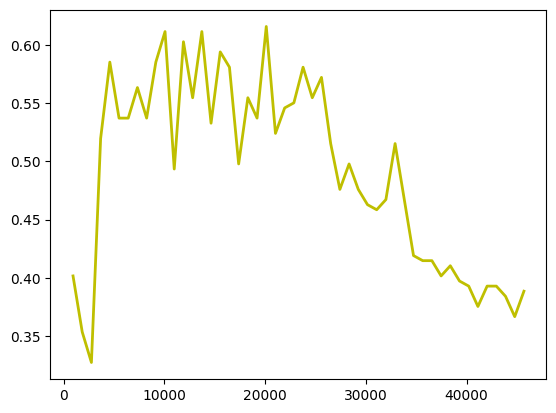

In [11]:
# Create instance of NeuralNetwork, fit to dataset, predict and print accuracy
NN = NeuralNetwork(samples=X_train, labels=y_train, eta=0.0001, epochs=50, size_hidden=64, optimizer="adagrad", verbose=True)
fitted = NN.fit()
plt.plot(fitted[0], fitted[1], 'y-', linewidth=2, label='sgd; Eta=0.1')

In [12]:
# Initialize lists to store learning rates and corresponding loss reductions
learning_rates = []
loss_reductions = []

# Train the network with different learning rates
for eta in np.logspace(-8, 1, 15):
    # Create instance of NeuralNetwork with the current learning rate
    NN = NeuralNetwork(samples=X_train, labels=y_train, eta=eta, epochs=50, size_hidden=64, optimizer="adagrad", verbose=True)
    
    # Train the network and collect the loss reduction
    fitted = NN.fit()
    loss_reduction = fitted[1][-1]  # Get the final loss reduction
    learning_rates.append(eta)
    loss_reductions.append(loss_reduction)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  0  - Error:  0.0642815961652503  - Accuracy:  0.026200873362445413  - Precision:  0.15264453474060458  - Recall:  0.026200873362445413  - F1-Score:  0.03132772127239231
Epoch:  0  - Error:  0.0642815961652503  - Accuracy:  0.06564551422319474
############################################
Epoch:  1  - Error:  0.06400119424756584  - Accuracy:  0.026200873362445413  - Precision:  0.14646941746130765  - Recall:  0.026200873362445413  - F1-Score:  0.03112792690331953
Epoch:  1  - Error:  0.06400119424756584  - Accuracy:  0.06564551422319474
############################################
Epoch:  2  - Error:  0.06372081336051562  - Accuracy:  0.026200873362445413  - Precision:  0.14646941746130765  - Recall:  0.026200873362445413  - F1-Score:  0.03112792690331953
Epoch:  2  - Error:  0.06372081336051562  - Accuracy:  0.06783369803063458
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  3  - Error:  0.06344055547768508  - Accuracy:  0.03056768558951965  - Precision:  0.16808595185397243  - Recall:  0.03056768558951965  - F1-Score:  0.03845016701177336
Epoch:  3  - Error:  0.06344055547768508  - Accuracy:  0.0700218818380744
############################################
Epoch:  4  - Error:  0.06316017695490059  - Accuracy:  0.03056768558951965  - Precision:  0.16808595185397243  - Recall:  0.03056768558951965  - F1-Score:  0.03845016701177336
Epoch:  4  - Error:  0.06316017695490059  - Accuracy:  0.06892778993435449
############################################
Epoch:  5  - Error:  0.06287968238640611  - Accuracy:  0.03056768558951965  - Precision:  0.16808595185397243  - Recall:  0.03056768558951965  - F1-Score:  0.03845016701177336
Epoch:  5  - Error:  0.06287968238640611  - Accuracy:  0.06892778993435449
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  6  - Error:  0.06259900540912602  - Accuracy:  0.03056768558951965  - Precision:  0.16808677694839416  - Recall:  0.03056768558951965  - F1-Score:  0.038451772752618026
Epoch:  6  - Error:  0.06259900540912602  - Accuracy:  0.06892778993435449
############################################
Epoch:  7  - Error:  0.0623181692837142  - Accuracy:  0.034934497816593885  - Precision:  0.1843072017744507  - Recall:  0.034934497816593885  - F1-Score:  0.04533443793863566
Epoch:  7  - Error:  0.0623181692837142  - Accuracy:  0.0700218818380744
############################################
Epoch:  8  - Error:  0.062037281549927485  - Accuracy:  0.034934497816593885  - Precision:  0.18227975324045192  - Recall:  0.034934497816593885  - F1-Score:  0.045132054484261455
Epoch:  8  - Error:  0.062037281549927485  - Accuracy:  0.0711159737417943
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  9  - Error:  0.06175633122386239  - Accuracy:  0.034934497816593885  - Precision:  0.18227975324045192  - Recall:  0.034934497816593885  - F1-Score:  0.045132054484261455
Epoch:  9  - Error:  0.06175633122386239  - Accuracy:  0.0711159737417943
############################################
Epoch:  10  - Error:  0.06147539325248228  - Accuracy:  0.034934497816593885  - Precision:  0.18227975324045192  - Recall:  0.034934497816593885  - F1-Score:  0.045132054484261455
Epoch:  10  - Error:  0.06147539325248228  - Accuracy:  0.0711159737417943
############################################
Epoch:  11  - Error:  0.06119431909608288  - Accuracy:  0.034934497816593885  - Precision:  0.18227975324045192  - Recall:  0.034934497816593885  - F1-Score:  0.045132054484261455
Epoch:  11  - Error:  0.06119431909608288  - Accuracy:  0.07221006564551423
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  12  - Error:  0.060913175530778484  - Accuracy:  0.03056768558951965  - Precision:  0.17586196233768797  - Recall:  0.03056768558951965  - F1-Score:  0.04475398187075066
Epoch:  12  - Error:  0.060913175530778484  - Accuracy:  0.07330415754923414
############################################
Epoch:  13  - Error:  0.06063204176847801  - Accuracy:  0.03056768558951965  - Precision:  0.17586196233768797  - Recall:  0.03056768558951965  - F1-Score:  0.04475398187075066
Epoch:  13  - Error:  0.06063204176847801  - Accuracy:  0.07330415754923414
############################################
Epoch:  14  - Error:  0.0603508495699747  - Accuracy:  0.034934497816593885  - Precision:  0.18674272710498802  - Recall:  0.034934497816593885  - F1-Score:  0.0518117111361396
Epoch:  14  - Error:  0.0603508495699747  - Accuracy:  0.07330415754923414
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  15  - Error:  0.060069690070763244  - Accuracy:  0.034934497816593885  - Precision:  0.18674272710498802  - Recall:  0.034934497816593885  - F1-Score:  0.0518117111361396
Epoch:  15  - Error:  0.060069690070763244  - Accuracy:  0.07330415754923414
############################################
Epoch:  16  - Error:  0.05978858491637212  - Accuracy:  0.039301310043668124  - Precision:  0.20317616721353693  - Recall:  0.039301310043668124  - F1-Score:  0.05882678711354257
Epoch:  16  - Error:  0.05978858491637212  - Accuracy:  0.07330415754923414
############################################
Epoch:  17  - Error:  0.05950757158726135  - Accuracy:  0.039301310043668124  - Precision:  0.20317616721353693  - Recall:  0.039301310043668124  - F1-Score:  0.05882678711354257
Epoch:  17  - Error:  0.05950757158726135  - Accuracy:  0.07549234135667396
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  18  - Error:  0.05922679973882027  - Accuracy:  0.039301310043668124  - Precision:  0.20317616721353693  - Recall:  0.039301310043668124  - F1-Score:  0.05882678711354257
Epoch:  18  - Error:  0.05922679973882027  - Accuracy:  0.07549234135667396
############################################
Epoch:  19  - Error:  0.058946224218215194  - Accuracy:  0.039301310043668124  - Precision:  0.20317616721353693  - Recall:  0.039301310043668124  - F1-Score:  0.05882678711354257
Epoch:  19  - Error:  0.058946224218215194  - Accuracy:  0.07768052516411379
############################################
Epoch:  20  - Error:  0.05866609047357558  - Accuracy:  0.039301310043668124  - Precision:  0.20317660964638667  - Recall:  0.039301310043668124  - F1-Score:  0.05882764731490711
Epoch:  20  - Error:  0.05866609047357558  - Accuracy:  0.07986870897155361
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  21  - Error:  0.058386533542144424  - Accuracy:  0.039301310043668124  - Precision:  0.20317660964638667  - Recall:  0.039301310043668124  - F1-Score:  0.05882764731490711
Epoch:  21  - Error:  0.058386533542144424  - Accuracy:  0.07986870897155361
############################################
Epoch:  22  - Error:  0.058107501680728514  - Accuracy:  0.043668122270742356  - Precision:  0.21796676196160975  - Recall:  0.043668122270742356  - F1-Score:  0.06572486126076585
Epoch:  22  - Error:  0.058107501680728514  - Accuracy:  0.08096280087527352
############################################
Epoch:  23  - Error:  0.057829130792588966  - Accuracy:  0.048034934497816595  - Precision:  0.2587241313840896  - Recall:  0.048034934497816595  - F1-Score:  0.07363399508274925
Epoch:  23  - Error:  0.057829130792588966  - Accuracy:  0.08205689277899343
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  24  - Error:  0.05755143467575815  - Accuracy:  0.048034934497816595  - Precision:  0.2587241313840896  - Recall:  0.048034934497816595  - F1-Score:  0.07363399508274925
Epoch:  24  - Error:  0.05755143467575815  - Accuracy:  0.08315098468271334
############################################
Epoch:  25  - Error:  0.0572747655895094  - Accuracy:  0.048034934497816595  - Precision:  0.2587241313840896  - Recall:  0.048034934497816595  - F1-Score:  0.07363399508274925
Epoch:  25  - Error:  0.0572747655895094  - Accuracy:  0.08424507658643327
############################################
Epoch:  26  - Error:  0.05699910069972577  - Accuracy:  0.048034934497816595  - Precision:  0.2587241313840896  - Recall:  0.048034934497816595  - F1-Score:  0.07363399508274925
Epoch:  26  - Error:  0.05699910069972577  - Accuracy:  0.08533916849015317
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  27  - Error:  0.056724523602126216  - Accuracy:  0.048034934497816595  - Precision:  0.2587241313840896  - Recall:  0.048034934497816595  - F1-Score:  0.07363399508274925
Epoch:  27  - Error:  0.056724523602126216  - Accuracy:  0.087527352297593
############################################
Epoch:  28  - Error:  0.056451182475779516  - Accuracy:  0.048034934497816595  - Precision:  0.2587241313840896  - Recall:  0.048034934497816595  - F1-Score:  0.07363399508274925
Epoch:  28  - Error:  0.056451182475779516  - Accuracy:  0.0886214442013129
############################################
Epoch:  29  - Error:  0.05617927222180034  - Accuracy:  0.05240174672489083  - Precision:  0.2721057536583626  - Recall:  0.05240174672489083  - F1-Score:  0.08041629519766814
Epoch:  29  - Error:  0.05617927222180034  - Accuracy:  0.08971553610503283
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  30  - Error:  0.05590896538068419  - Accuracy:  0.05240174672489083  - Precision:  0.27052931798629204  - Recall:  0.05240174672489083  - F1-Score:  0.08022638711835597
Epoch:  30  - Error:  0.05590896538068419  - Accuracy:  0.08971553610503283
############################################
Epoch:  31  - Error:  0.05564034266083686  - Accuracy:  0.056768558951965066  - Precision:  0.28269448487789095  - Recall:  0.056768558951965066  - F1-Score:  0.08689662423764997
Epoch:  31  - Error:  0.05564034266083686  - Accuracy:  0.09080962800875274
############################################
Epoch:  32  - Error:  0.055373490467049  - Accuracy:  0.056768558951965066  - Precision:  0.28269448487789095  - Recall:  0.056768558951965066  - F1-Score:  0.08689662423764997
Epoch:  32  - Error:  0.055373490467049  - Accuracy:  0.09080962800875274
############################################
Epoch:  33  - Error:  0.055108533164467656  - Accuracy:  0.056768558951965066  - Precision:  0.28269496766

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  35  - Error:  0.054584627807235164  - Accuracy:  0.0611353711790393  - Precision:  0.2938028471539008  - Recall:  0.0611353711790393  - F1-Score:  0.09345945889016205
Epoch:  35  - Error:  0.054584627807235164  - Accuracy:  0.09190371991247265
############################################
Epoch:  36  - Error:  0.05432586231146639  - Accuracy:  0.0611353711790393  - Precision:  0.2938028471539008  - Recall:  0.0611353711790393  - F1-Score:  0.09345945889016205
Epoch:  36  - Error:  0.05432586231146639  - Accuracy:  0.09190371991247265
############################################
Epoch:  37  - Error:  0.05406944434869734  - Accuracy:  0.0611353711790393  - Precision:  0.2938028471539008  - Recall:  0.0611353711790393  - F1-Score:  0.09345945889016205
Epoch:  37  - Error:  0.05406944434869734  - Accuracy:  0.09190371991247265
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch:  38  - Error:  0.05381534785519929  - Accuracy:  0.0611353711790393  - Precision:  0.2938028471539008  - Recall:  0.0611353711790393  - F1-Score:  0.09345945889016205
Epoch:  38  - Error:  0.05381534785519929  - Accuracy:  0.09299781181619256
############################################
Epoch:  39  - Error:  0.05356361627303561  - Accuracy:  0.0611353711790393  - Precision:  0.2938028471539008  - Recall:  0.0611353711790393  - F1-Score:  0.09345945889016205
Epoch:  39  - Error:  0.05356361627303561  - Accuracy:  0.09299781181619256
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  40  - Error:  0.053314431798846734  - Accuracy:  0.0611353711790393  - Precision:  0.2938033522212415  - Recall:  0.0611353711790393  - F1-Score:  0.0934604389849274
Epoch:  40  - Error:  0.053314431798846734  - Accuracy:  0.09409190371991247
############################################
Epoch:  41  - Error:  0.05306777002885415  - Accuracy:  0.0611353711790393  - Precision:  0.2938033522212415  - Recall:  0.0611353711790393  - F1-Score:  0.0934604389849274
Epoch:  41  - Error:  0.05306777002885415  - Accuracy:  0.09518599562363239
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  42  - Error:  0.05282367562535053  - Accuracy:  0.0611353711790393  - Precision:  0.2938033522212415  - Recall:  0.0611353711790393  - F1-Score:  0.0934604389849274
Epoch:  42  - Error:  0.05282367562535053  - Accuracy:  0.09737417943107221
############################################
Epoch:  43  - Error:  0.052582185429851463  - Accuracy:  0.0611353711790393  - Precision:  0.2938033522212415  - Recall:  0.0611353711790393  - F1-Score:  0.0934604389849274
Epoch:  43  - Error:  0.052582185429851463  - Accuracy:  0.0962800875273523
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  44  - Error:  0.05234333489104611  - Accuracy:  0.0611353711790393  - Precision:  0.2938033522212415  - Recall:  0.0611353711790393  - F1-Score:  0.0934604389849274
Epoch:  44  - Error:  0.05234333489104611  - Accuracy:  0.09737417943107221
############################################
Epoch:  45  - Error:  0.0521071111816141  - Accuracy:  0.0611353711790393  - Precision:  0.2938033522212415  - Recall:  0.0611353711790393  - F1-Score:  0.0934604389849274
Epoch:  45  - Error:  0.0521071111816141  - Accuracy:  0.09846827133479212
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  46  - Error:  0.05187352097774295  - Accuracy:  0.0611353711790393  - Precision:  0.29380386505884887  - Recall:  0.0611353711790393  - F1-Score:  0.09346143392961345
Epoch:  46  - Error:  0.05187352097774295  - Accuracy:  0.09846827133479212
############################################
Epoch:  47  - Error:  0.05164257698598378  - Accuracy:  0.06550218340611354  - Precision:  0.3039857034855511  - Recall:  0.06550218340611354  - F1-Score:  0.0999157579352529
Epoch:  47  - Error:  0.05164257698598378  - Accuracy:  0.09846827133479212
############################################
Epoch:  48  - Error:  0.051414202893305345  - Accuracy:  0.06986899563318777  - Precision:  0.3041114150284455  - Recall:  0.06986899563318777  - F1-Score:  0.1054185035003812
Epoch:  48  - Error:  0.051414202893305345  - Accuracy:  0.10065645514223195
############################################
Epoch:  49  - Error:  0.051188406189604324  - Accuracy:  0.06986899563318777  - Precision:  0.3041119695442839

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  1  - Error:  0.10237780132872025  - Accuracy:  0.06550218340611354  - Precision:  0.19015482334259629  - Recall:  0.06550218340611354  - F1-Score:  0.06790194751845467
Epoch:  1  - Error:  0.10237780132872025  - Accuracy:  0.05579868708971553
############################################
Epoch:  2  - Error:  0.10168669450608554  - Accuracy:  0.06550218340611354  - Precision:  0.18124061642792968  - Recall:  0.06550218340611354  - F1-Score:  0.06746832618738206
Epoch:  2  - Error:  0.10168669450608554  - Accuracy:  0.06236323851203501
############################################
Epoch:  3  - Error:  0.10096793772525708  - Accuracy:  0.08296943231441048  - Precision:  0.19636614850990708  - Recall:  0.08296943231441048  - F1-Score:  0.09114282205562668
Epoch:  3  - Error:  0.10096793772525708  - Accuracy:  0.06564551422319474
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  4  - Error:  0.10022267688869872  - Accuracy:  0.10043668122270742  - Precision:  0.21784589098535023  - Recall:  0.10043668122270742  - F1-Score:  0.11400371092018177
Epoch:  4  - Error:  0.10022267688869872  - Accuracy:  0.07768052516411379
############################################
Epoch:  5  - Error:  0.09945089790613193  - Accuracy:  0.10043668122270742  - Precision:  0.21728703126083035  - Recall:  0.10043668122270742  - F1-Score:  0.11833347039152892
Epoch:  5  - Error:  0.09945089790613193  - Accuracy:  0.08533916849015317
############################################
Epoch:  6  - Error:  0.09865335863331591  - Accuracy:  0.1222707423580786  - Precision:  0.22651817879084862  - Recall:  0.1222707423580786  - F1-Score:  0.14131193412775223
Epoch:  6  - Error:  0.09865335863331591  - Accuracy:  0.10065645514223195
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  7  - Error:  0.0978298161017186  - Accuracy:  0.13100436681222707  - Precision:  0.20787828377348028  - Recall:  0.13100436681222707  - F1-Score:  0.14529088894771583
Epoch:  7  - Error:  0.0978298161017186  - Accuracy:  0.1137855579868709
############################################
Epoch:  8  - Error:  0.09699805402097768  - Accuracy:  0.1615720524017467  - Precision:  0.22109809232884933  - Recall:  0.1615720524017467  - F1-Score:  0.1743047245150157
Epoch:  8  - Error:  0.09699805402097768  - Accuracy:  0.12910284463894967
############################################
Epoch:  9  - Error:  0.09619213736381409  - Accuracy:  0.16593886462882096  - Precision:  0.32069915563897883  - Recall:  0.16593886462882096  - F1-Score:  0.18262638071052362
Epoch:  9  - Error:  0.09619213736381409  - Accuracy:  0.13785557986870897
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch:  10  - Error:  0.09540400301434794  - Accuracy:  0.17467248908296942  - Precision:  0.3225904823740587  - Recall:  0.17467248908296942  - F1-Score:  0.18980095766980778
Epoch:  10  - Error:  0.09540400301434794  - Accuracy:  0.14551422319474835
############################################
Epoch:  11  - Error:  0.09461856955590063  - Accuracy:  0.1703056768558952  - Precision:  0.31576426156441567  - Recall:  0.1703056768558952  - F1-Score:  0.18464337745569148
Epoch:  11  - Error:  0.09461856955590063  - Accuracy:  0.15317286652078774
############################################
Epoch:  12  - Error:  0.09382260704006538  - Accuracy:  0.1703056768558952  - Precision:  0.345860732939464  - Recall:  0.1703056768558952  - F1-Score:  0.184668452533852
Epoch:  12  - Error:  0.09382260704006538  - Accuracy:  0.1586433260393873
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  13  - Error:  0.09300893145621135  - Accuracy:  0.1703056768558952  - Precision:  0.3438761264510589  - Recall:  0.1703056768558952  - F1-Score:  0.18399062495725146
Epoch:  13  - Error:  0.09300893145621135  - Accuracy:  0.1575492341356674
############################################
Epoch:  14  - Error:  0.09218911284993757  - Accuracy:  0.17903930131004367  - Precision:  0.34859455236973197  - Recall:  0.17903930131004367  - F1-Score:  0.19130496139162165
Epoch:  14  - Error:  0.09218911284993757  - Accuracy:  0.16411378555798686
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  15  - Error:  0.09136235164693367  - Accuracy:  0.18777292576419213  - Precision:  0.35545406691824644  - Recall:  0.18777292576419213  - F1-Score:  0.1994084087883931
Epoch:  15  - Error:  0.09136235164693367  - Accuracy:  0.17177242888402625
############################################
Epoch:  16  - Error:  0.09052828011129897  - Accuracy:  0.18777292576419213  - Precision:  0.3547946573781198  - Recall:  0.18777292576419213  - F1-Score:  0.19927248580277804
Epoch:  16  - Error:  0.09052828011129897  - Accuracy:  0.1739606126914661
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  17  - Error:  0.08968609701742326  - Accuracy:  0.18777292576419213  - Precision:  0.31952537062411696  - Recall:  0.18777292576419213  - F1-Score:  0.1995463821082371
Epoch:  17  - Error:  0.08968609701742326  - Accuracy:  0.1761487964989059
############################################
Epoch:  18  - Error:  0.08883579054345646  - Accuracy:  0.18777292576419213  - Precision:  0.32384103394844344  - Recall:  0.18777292576419213  - F1-Score:  0.20115852747224305
Epoch:  18  - Error:  0.08883579054345646  - Accuracy:  0.18161925601750548
############################################
Epoch:  19  - Error:  0.08797601715470231  - Accuracy:  0.18777292576419213  - Precision:  0.32383276347074064  - Recall:  0.18777292576419213  - F1-Score:  0.2011438491118159
Epoch:  19  - Error:  0.08797601715470231  - Accuracy:  0.18708971553610504
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  20  - Error:  0.08710512896007121  - Accuracy:  0.19213973799126638  - Precision:  0.3869190642346239  - Recall:  0.19213973799126638  - F1-Score:  0.20881402677076485
Epoch:  20  - Error:  0.08710512896007121  - Accuracy:  0.18927789934354486
############################################
Epoch:  21  - Error:  0.08622091249203802  - Accuracy:  0.20087336244541484  - Precision:  0.4339705466271005  - Recall:  0.20087336244541484  - F1-Score:  0.22120435826096094
Epoch:  21  - Error:  0.08622091249203802  - Accuracy:  0.19693654266958424
############################################
Epoch:  22  - Error:  0.08532062351846893  - Accuracy:  0.20087336244541484  - Precision:  0.3775605933736748  - Recall:  0.20087336244541484  - F1-Score:  0.2199360591505384
Epoch:  22  - Error:  0.08532062351846893  - Accuracy:  0.19803063457330417
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  23  - Error:  0.08441460738127199  - Accuracy:  0.20087336244541484  - Precision:  0.3775605933736748  - Recall:  0.20087336244541484  - F1-Score:  0.2199360591505384
Epoch:  23  - Error:  0.08441460738127199  - Accuracy:  0.20350109409190373
############################################
Epoch:  24  - Error:  0.08350140612101821  - Accuracy:  0.2096069868995633  - Precision:  0.39852693279015644  - Recall:  0.2096069868995633  - F1-Score:  0.23745841977646193
Epoch:  24  - Error:  0.08350140612101821  - Accuracy:  0.2089715536105033
############################################
Epoch:  25  - Error:  0.08256674868530788  - Accuracy:  0.2096069868995633  - Precision:  0.38891644397625036  - Recall:  0.2096069868995633  - F1-Score:  0.2388236883465303
Epoch:  25  - Error:  0.08256674868530788  - Accuracy:  0.21444201312910285
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  26  - Error:  0.08160896887784902  - Accuracy:  0.2096069868995633  - Precision:  0.36686556908694745  - Recall:  0.2096069868995633  - F1-Score:  0.23829046496223819
Epoch:  26  - Error:  0.08160896887784902  - Accuracy:  0.21772428884026257
############################################
Epoch:  27  - Error:  0.080627834348644  - Accuracy:  0.2052401746724891  - Precision:  0.3541791159120508  - Recall:  0.2052401746724891  - F1-Score:  0.23377260997451443
Epoch:  27  - Error:  0.080627834348644  - Accuracy:  0.21991247264770242
############################################
Epoch:  28  - Error:  0.0796261148095646  - Accuracy:  0.2183406113537118  - Precision:  0.3948289665211062  - Recall:  0.2183406113537118  - F1-Score:  0.2536510564482498
Epoch:  28  - Error:  0.0796261148095646  - Accuracy:  0.2188183807439825
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  29  - Error:  0.07860708407664767  - Accuracy:  0.22707423580786026  - Precision:  0.4263100067776341  - Recall:  0.22707423580786026  - F1-Score:  0.2692281402890531
Epoch:  29  - Error:  0.07860708407664767  - Accuracy:  0.22647702407002188
############################################
Epoch:  30  - Error:  0.07757218289631759  - Accuracy:  0.2445414847161572  - Precision:  0.4661067616718227  - Recall:  0.2445414847161572  - F1-Score:  0.2949813117688724
Epoch:  30  - Error:  0.07757218289631759  - Accuracy:  0.237417943107221
############################################
Epoch:  31  - Error:  0.07652916469588152  - Accuracy:  0.24890829694323144  - Precision:  0.47125662888859726  - Recall:  0.24890829694323144  - F1-Score:  0.30324945378487744
Epoch:  31  - Error:  0.07652916469588152  - Accuracy:  0.23960612691466082
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  32  - Error:  0.0754957247444455  - Accuracy:  0.2576419213973799  - Precision:  0.4770865684999926  - Recall:  0.2576419213973799  - F1-Score:  0.314593189221645
Epoch:  32  - Error:  0.0754957247444455  - Accuracy:  0.23960612691466082
############################################
Epoch:  33  - Error:  0.07449372318183065  - Accuracy:  0.25327510917030566  - Precision:  0.471263523060515  - Recall:  0.25327510917030566  - F1-Score:  0.3113689786187957
Epoch:  33  - Error:  0.07449372318183065  - Accuracy:  0.24726477024070023
############################################
Epoch:  34  - Error:  0.07351370376611804  - Accuracy:  0.25327510917030566  - Precision:  0.46654837568341256  - Recall:  0.25327510917030566  - F1-Score:  0.31137457849489353
Epoch:  34  - Error:  0.07351370376611804  - Accuracy:  0.24835886214442013
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  35  - Error:  0.07253911732157549  - Accuracy:  0.2576419213973799  - Precision:  0.4695386491238019  - Recall:  0.2576419213973799  - F1-Score:  0.31745548645111965
Epoch:  35  - Error:  0.07253911732157549  - Accuracy:  0.25164113785557984
############################################
Epoch:  36  - Error:  0.07156143460675647  - Accuracy:  0.27074235807860264  - Precision:  0.4856193567456932  - Recall:  0.27074235807860264  - F1-Score:  0.3340755414840643
Epoch:  36  - Error:  0.07156143460675647  - Accuracy:  0.25601750547045954
############################################
Epoch:  37  - Error:  0.07057753952388236  - Accuracy:  0.27510917030567683  - Precision:  0.49177434060516184  - Recall:  0.27510917030567683  - F1-Score:  0.33854294630867354
Epoch:  37  - Error:  0.07057753952388236  - Accuracy:  0.25820568927789933
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  38  - Error:  0.06959629781255351  - Accuracy:  0.2794759825327511  - Precision:  0.5011555901258677  - Recall:  0.2794759825327511  - F1-Score:  0.3452072158370023
Epoch:  38  - Error:  0.06959629781255351  - Accuracy:  0.2603938730853392
############################################
Epoch:  39  - Error:  0.06862770542623829  - Accuracy:  0.28820960698689957  - Precision:  0.5114799948607528  - Recall:  0.28820960698689957  - F1-Score:  0.3560431667817327
Epoch:  39  - Error:  0.06862770542623829  - Accuracy:  0.2614879649890591
############################################
Epoch:  40  - Error:  0.06768158527554069  - Accuracy:  0.28820960698689957  - Precision:  0.5061157507093555  - Recall:  0.28820960698689957  - F1-Score:  0.355478347855972
Epoch:  40  - Error:  0.06768158527554069  - Accuracy:  0.2647702407002188
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  41  - Error:  0.06676355170459451  - Accuracy:  0.28820960698689957  - Precision:  0.4987981891876229  - Recall:  0.28820960698689957  - F1-Score:  0.3547789059107323
Epoch:  41  - Error:  0.06676355170459451  - Accuracy:  0.26914660831509846
############################################
Epoch:  42  - Error:  0.06587718811979701  - Accuracy:  0.28820960698689957  - Precision:  0.4936142291831604  - Recall:  0.28820960698689957  - F1-Score:  0.35327049924555437
Epoch:  42  - Error:  0.06587718811979701  - Accuracy:  0.27571115973741794
############################################
Epoch:  43  - Error:  0.06502364106158877  - Accuracy:  0.31004366812227074  - Precision:  0.5167080442699357  - Recall:  0.31004366812227074  - F1-Score:  0.37717606953717836
Epoch:  43  - Error:  0.06502364106158877  - Accuracy:  0.2778993435448578
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  44  - Error:  0.0642060281406207  - Accuracy:  0.31004366812227074  - Precision:  0.5167080442699357  - Recall:  0.31004366812227074  - F1-Score:  0.37717606953717836
Epoch:  44  - Error:  0.0642060281406207  - Accuracy:  0.27680525164113784
############################################
Epoch:  45  - Error:  0.06342255779576442  - Accuracy:  0.314410480349345  - Precision:  0.5105176465315219  - Recall:  0.314410480349345  - F1-Score:  0.3803895131419959
Epoch:  45  - Error:  0.06342255779576442  - Accuracy:  0.2778993435448578
############################################
Epoch:  46  - Error:  0.06267341303950409  - Accuracy:  0.32751091703056767  - Precision:  0.5231475857375573  - Recall:  0.32751091703056767  - F1-Score:  0.39504045891398976
Epoch:  46  - Error:  0.06267341303950409  - Accuracy:  0.2811816192560175
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  47  - Error:  0.061955660489007004  - Accuracy:  0.32751091703056767  - Precision:  0.526419768896174  - Recall:  0.32751091703056767  - F1-Score:  0.39582597691603266
Epoch:  47  - Error:  0.061955660489007004  - Accuracy:  0.2844638949671772
############################################
Epoch:  48  - Error:  0.06126830471484657  - Accuracy:  0.3231441048034934  - Precision:  0.5188407662064066  - Recall:  0.3231441048034934  - F1-Score:  0.3911689142167086
Epoch:  48  - Error:  0.06126830471484657  - Accuracy:  0.28665207877461707
############################################
Epoch:  49  - Error:  0.06061103653203384  - Accuracy:  0.3231441048034934  - Precision:  0.5144647809084222  - Recall:  0.3231441048034934  - F1-Score:  0.39071247771838274
Epoch:  49  - Error:  0.06061103653203384  - Accuracy:  0.2910284463894967
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  0  - Error:  0.09992506676366573  - Accuracy:  0.19213973799126638  - Precision:  0.25807259324546294  - Recall:  0.19213973799126638  - F1-Score:  0.19583474672220574
Epoch:  0  - Error:  0.09992506676366573  - Accuracy:  0.24507658643326038
############################################
Epoch:  1  - Error:  0.09579841725894293  - Accuracy:  0.21397379912663755  - Precision:  0.2961645152694388  - Recall:  0.21397379912663755  - F1-Score:  0.224975587988474
Epoch:  1  - Error:  0.09579841725894293  - Accuracy:  0.2439824945295405
############################################
Epoch:  2  - Error:  0.09322590761266626  - Accuracy:  0.23580786026200873  - Precision:  0.3481505527547516  - Recall:  0.23580786026200873  - F1-Score:  0.27123660511059133
Epoch:  2  - Error:  0.09322590761266626  - Accuracy:  0.24726477024070023
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  3  - Error:  0.09134681804941179  - Accuracy:  0.2445414847161572  - Precision:  0.3688335497069121  - Recall:  0.2445414847161572  - F1-Score:  0.2917715557838856
Epoch:  3  - Error:  0.09134681804941179  - Accuracy:  0.23851203501094093
############################################
Epoch:  4  - Error:  0.08979918500979983  - Accuracy:  0.2576419213973799  - Precision:  0.37981884988664155  - Recall:  0.2576419213973799  - F1-Score:  0.2993748525973153
Epoch:  4  - Error:  0.08979918500979983  - Accuracy:  0.2614879649890591
############################################
Epoch:  5  - Error:  0.08885457992157993  - Accuracy:  0.25327510917030566  - Precision:  0.38033166822702186  - Recall:  0.25327510917030566  - F1-Score:  0.3027958218178784
Epoch:  5  - Error:  0.08885457992157993  - Accuracy:  0.2647702407002188
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  6  - Error:  0.0873811265381139  - Accuracy:  0.2576419213973799  - Precision:  0.3783537549799285  - Recall:  0.2576419213973799  - F1-Score:  0.29736517177371624
Epoch:  6  - Error:  0.0873811265381139  - Accuracy:  0.2833698030634573
############################################
Epoch:  7  - Error:  0.08659642464510604  - Accuracy:  0.28820960698689957  - Precision:  0.4426916922075456  - Recall:  0.28820960698689957  - F1-Score:  0.3474816955051384
Epoch:  7  - Error:  0.08659642464510604  - Accuracy:  0.3085339168490153
############################################
Epoch:  8  - Error:  0.08431155126041495  - Accuracy:  0.24890829694323144  - Precision:  0.34603442409119267  - Recall:  0.24890829694323144  - F1-Score:  0.25884832496292715
Epoch:  8  - Error:  0.08431155126041495  - Accuracy:  0.2986870897155361
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  9  - Error:  0.0848958145440719  - Accuracy:  0.28820960698689957  - Precision:  0.42774828491715244  - Recall:  0.28820960698689957  - F1-Score:  0.34343971113335897
Epoch:  9  - Error:  0.0848958145440719  - Accuracy:  0.3358862144420131
############################################
Epoch:  10  - Error:  0.08158279735920755  - Accuracy:  0.27074235807860264  - Precision:  0.3715025285132078  - Recall:  0.27074235807860264  - F1-Score:  0.29596551665686555
Epoch:  10  - Error:  0.08158279735920755  - Accuracy:  0.32056892778993434
############################################
Epoch:  11  - Error:  0.08183760133076289  - Accuracy:  0.314410480349345  - Precision:  0.4622951902560708  - Recall:  0.314410480349345  - F1-Score:  0.3703763839051026
Epoch:  11  - Error:  0.08183760133076289  - Accuracy:  0.33260393873085337
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  12  - Error:  0.07849362226004006  - Accuracy:  0.26200873362445415  - Precision:  0.34193939034792314  - Recall:  0.26200873362445415  - F1-Score:  0.27338072615677106
Epoch:  12  - Error:  0.07849362226004006  - Accuracy:  0.32713347921225383
############################################
Epoch:  13  - Error:  0.08017526959180175  - Accuracy:  0.3056768558951965  - Precision:  0.4334728666850282  - Recall:  0.3056768558951965  - F1-Score:  0.3573675253825247
Epoch:  13  - Error:  0.08017526959180175  - Accuracy:  0.36542669584245074
############################################
Epoch:  14  - Error:  0.07628306206533081  - Accuracy:  0.30131004366812225  - Precision:  0.4104965979486138  - Recall:  0.30131004366812225  - F1-Score:  0.3424687308581478
Epoch:  14  - Error:  0.07628306206533081  - Accuracy:  0.37527352297593
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  15  - Error:  0.07628377903076562  - Accuracy:  0.31004366812227074  - Precision:  0.43206911434930056  - Recall:  0.31004366812227074  - F1-Score:  0.35991996430840784
Epoch:  15  - Error:  0.07628377903076562  - Accuracy:  0.37199124726477023
############################################
Epoch:  16  - Error:  0.0739285686563876  - Accuracy:  0.2925764192139738  - Precision:  0.3909618698656494  - Recall:  0.2925764192139738  - F1-Score:  0.32983064733828216
Epoch:  16  - Error:  0.0739285686563876  - Accuracy:  0.3785557986870897
############################################
Epoch:  17  - Error:  0.07440106466308209  - Accuracy:  0.33624454148471616  - Precision:  0.45087287239803214  - Recall:  0.33624454148471616  - F1-Score:  0.38426915677163487
Epoch:  17  - Error:  0.07440106466308209  - Accuracy:  0.38074398249452956
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  18  - Error:  0.07153378244968993  - Accuracy:  0.30131004366812225  - Precision:  0.3976857365503654  - Recall:  0.30131004366812225  - F1-Score:  0.3376508464185026
Epoch:  18  - Error:  0.07153378244968993  - Accuracy:  0.3851203501094092
############################################
Epoch:  19  - Error:  0.07244644729217598  - Accuracy:  0.34497816593886466  - Precision:  0.45741304770331226  - Recall:  0.34497816593886466  - F1-Score:  0.3925478832113855
Epoch:  19  - Error:  0.07244644729217598  - Accuracy:  0.38949671772428884
############################################
Epoch:  20  - Error:  0.0692404156448868  - Accuracy:  0.29694323144104806  - Precision:  0.3919386264100915  - Recall:  0.29694323144104806  - F1-Score:  0.3332819515537121
Epoch:  20  - Error:  0.0692404156448868  - Accuracy:  0.38949671772428884
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  21  - Error:  0.07027682541214511  - Accuracy:  0.3406113537117904  - Precision:  0.4492120751851149  - Recall:  0.3406113537117904  - F1-Score:  0.3868697895990472
Epoch:  21  - Error:  0.07027682541214511  - Accuracy:  0.40043763676148797
############################################
Epoch:  22  - Error:  0.06720900790236961  - Accuracy:  0.3231441048034934  - Precision:  0.42123375228823007  - Recall:  0.3231441048034934  - F1-Score:  0.3625646935144751
Epoch:  22  - Error:  0.06720900790236961  - Accuracy:  0.40043763676148797
############################################
Epoch:  23  - Error:  0.06802593803528803  - Accuracy:  0.35807860262008734  - Precision:  0.46308316813882966  - Recall:  0.35807860262008734  - F1-Score:  0.403396744369303
Epoch:  23  - Error:  0.06802593803528803  - Accuracy:  0.41466083150984684
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  24  - Error:  0.06548586132497694  - Accuracy:  0.3406113537117904  - Precision:  0.4414523693999676  - Recall:  0.3406113537117904  - F1-Score:  0.382816517079724
Epoch:  24  - Error:  0.06548586132497694  - Accuracy:  0.412472647702407
############################################
Epoch:  25  - Error:  0.06590877404212216  - Accuracy:  0.35807860262008734  - Precision:  0.46308316813882966  - Recall:  0.35807860262008734  - F1-Score:  0.403396744369303
Epoch:  25  - Error:  0.06590877404212216  - Accuracy:  0.4201312910284464
############################################
Epoch:  26  - Error:  0.0638440516563875  - Accuracy:  0.34497816593886466  - Precision:  0.4436413768762546  - Recall:  0.34497816593886466  - F1-Score:  0.38693930362052625
Epoch:  26  - Error:  0.0638440516563875  - Accuracy:  0.4223194748358862
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  27  - Error:  0.0641205689966403  - Accuracy:  0.3537117903930131  - Precision:  0.45210179543492934  - Recall:  0.3537117903930131  - F1-Score:  0.39632577203957786
Epoch:  27  - Error:  0.0641205689966403  - Accuracy:  0.42669584245076586
############################################
Epoch:  28  - Error:  0.06219259012113132  - Accuracy:  0.3537117903930131  - Precision:  0.4493891100736307  - Recall:  0.3537117903930131  - F1-Score:  0.39487882877556646
Epoch:  28  - Error:  0.06219259012113132  - Accuracy:  0.42560175054704596
############################################
Epoch:  29  - Error:  0.06252187898984837  - Accuracy:  0.35807860262008734  - Precision:  0.456222285916609  - Recall:  0.35807860262008734  - F1-Score:  0.40089904957616235
Epoch:  29  - Error:  0.06252187898984837  - Accuracy:  0.4288840262582057
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  30  - Error:  0.06049440931159735  - Accuracy:  0.3537117903930131  - Precision:  0.4472877699644413  - Recall:  0.3537117903930131  - F1-Score:  0.3941050017646133
Epoch:  30  - Error:  0.06049440931159735  - Accuracy:  0.424507658643326
############################################
Epoch:  31  - Error:  0.06096972669966908  - Accuracy:  0.37554585152838427  - Precision:  0.47259110818660977  - Recall:  0.37554585152838427  - F1-Score:  0.4182527583266582
Epoch:  31  - Error:  0.06096972669966908  - Accuracy:  0.4299781181619256
############################################
Epoch:  32  - Error:  0.05877818447467332  - Accuracy:  0.3624454148471616  - Precision:  0.45505614251803733  - Recall:  0.3624454148471616  - F1-Score:  0.40168582516523066
Epoch:  32  - Error:  0.05877818447467332  - Accuracy:  0.4288840262582057
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  33  - Error:  0.0593897161725102  - Accuracy:  0.38427947598253276  - Precision:  0.47419258054287255  - Recall:  0.38427947598253276  - F1-Score:  0.42418222243549747
Epoch:  33  - Error:  0.0593897161725102  - Accuracy:  0.4387308533916849
############################################
Epoch:  34  - Error:  0.0570498973261045  - Accuracy:  0.37117903930131  - Precision:  0.45779892497876534  - Recall:  0.37117903930131  - F1-Score:  0.40847547466073475
Epoch:  34  - Error:  0.0570498973261045  - Accuracy:  0.4387308533916849
############################################
Epoch:  35  - Error:  0.057775487575023536  - Accuracy:  0.39737991266375544  - Precision:  0.47870396679389565  - Recall:  0.39737991266375544  - F1-Score:  0.43389090721289364
Epoch:  35  - Error:  0.057775487575023536  - Accuracy:  0.4442013129102845
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  36  - Error:  0.05534861162734781  - Accuracy:  0.37117903930131  - Precision:  0.45492359439262847  - Recall:  0.37117903930131  - F1-Score:  0.4074642128818334
Epoch:  36  - Error:  0.05534861162734781  - Accuracy:  0.4431072210065646
############################################
Epoch:  37  - Error:  0.056165576317375565  - Accuracy:  0.4104803493449782  - Precision:  0.49032869294485504  - Recall:  0.4104803493449782  - F1-Score:  0.4463484386894022
Epoch:  37  - Error:  0.056165576317375565  - Accuracy:  0.45185995623632386
############################################
Epoch:  38  - Error:  0.05369848287645796  - Accuracy:  0.3799126637554585  - Precision:  0.45732030221113185  - Recall:  0.3799126637554585  - F1-Score:  0.4142022257389061
Epoch:  38  - Error:  0.05369848287645796  - Accuracy:  0.4485776805251641
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  39  - Error:  0.05458801873102354  - Accuracy:  0.4148471615720524  - Precision:  0.49260862859183274  - Recall:  0.4148471615720524  - F1-Score:  0.4499687416047081
Epoch:  39  - Error:  0.05458801873102354  - Accuracy:  0.46061269146608314
############################################
Epoch:  40  - Error:  0.05208758005381703  - Accuracy:  0.3930131004366812  - Precision:  0.4702501774689699  - Recall:  0.3930131004366812  - F1-Score:  0.4270231299594347
Epoch:  40  - Error:  0.05208758005381703  - Accuracy:  0.45185995623632386
############################################
Epoch:  41  - Error:  0.05304083547228052  - Accuracy:  0.4148471615720524  - Precision:  0.4914867203121496  - Recall:  0.4148471615720524  - F1-Score:  0.44948601576327984
Epoch:  41  - Error:  0.05304083547228052  - Accuracy:  0.4671772428884026
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  42  - Error:  0.05051157109745839  - Accuracy:  0.3930131004366812  - Precision:  0.4702501774689699  - Recall:  0.3930131004366812  - F1-Score:  0.4270231299594347
Epoch:  42  - Error:  0.05051157109745839  - Accuracy:  0.45951859956236324
############################################
Epoch:  43  - Error:  0.05153692180024136  - Accuracy:  0.4148471615720524  - Precision:  0.4914867203121496  - Recall:  0.4148471615720524  - F1-Score:  0.44948601576327984
Epoch:  43  - Error:  0.05153692180024136  - Accuracy:  0.46936542669584247
############################################
Epoch:  44  - Error:  0.0489857476492546  - Accuracy:  0.39737991266375544  - Precision:  0.47248128825389524  - Recall:  0.39737991266375544  - F1-Score:  0.43047154447687386
Epoch:  44  - Error:  0.0489857476492546  - Accuracy:  0.4649890590809628
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  45  - Error:  0.05007832920419907  - Accuracy:  0.43231441048034935  - Precision:  0.5063227653336874  - Recall:  0.43231441048034935  - F1-Score:  0.46567648212482216
Epoch:  45  - Error:  0.05007832920419907  - Accuracy:  0.4726477024070022
############################################
Epoch:  46  - Error:  0.0475050957923826  - Accuracy:  0.43231441048034935  - Precision:  0.506178692728911  - Recall:  0.43231441048034935  - F1-Score:  0.4661015497902218
Epoch:  46  - Error:  0.0475050957923826  - Accuracy:  0.47045951859956237
############################################
Epoch:  47  - Error:  0.04865135622608657  - Accuracy:  0.4366812227074236  - Precision:  0.5085459810958584  - Recall:  0.4366812227074236  - F1-Score:  0.4690480441175518
Epoch:  47  - Error:  0.04865135622608657  - Accuracy:  0.4737417943107221
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  48  - Error:  0.0460628467684387  - Accuracy:  0.43231441048034935  - Precision:  0.5078421400302812  - Recall:  0.43231441048034935  - F1-Score:  0.46675123807665087
Epoch:  48  - Error:  0.0460628467684387  - Accuracy:  0.47045951859956237
############################################
Epoch:  49  - Error:  0.04728175951641991  - Accuracy:  0.43231441048034935  - Precision:  0.5050940086464154  - Recall:  0.43231441048034935  - F1-Score:  0.4651732147582267
Epoch:  49  - Error:  0.04728175951641991  - Accuracy:  0.4759299781181619
############################################
Epoch:  0  - Error:  0.12579178873936667  - Accuracy:  0.2096069868995633  - Precision:  0.4849099483399053  - Recall:  0.2096069868995633  - F1-Score:  0.2773673667430063
Epoch:  0  - Error:  0.12579178873936667  - Accuracy:  0.19803063457330417
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  1  - Error:  0.09591794750515643  - Accuracy:  0.3406113537117904  - Precision:  0.46927635683094193  - Recall:  0.3406113537117904  - F1-Score:  0.39164022339164123
Epoch:  1  - Error:  0.09591794750515643  - Accuracy:  0.2888402625820569
############################################
Epoch:  2  - Error:  0.07500041761617263  - Accuracy:  0.3406113537117904  - Precision:  0.4722867936071121  - Recall:  0.3406113537117904  - F1-Score:  0.3848342706259368
Epoch:  2  - Error:  0.07500041761617263  - Accuracy:  0.29431072210065645
############################################
Epoch:  3  - Error:  0.06805796783059959  - Accuracy:  0.37117903930131  - Precision:  0.5074235807860261  - Recall:  0.37117903930131  - F1-Score:  0.4097286265131585
Epoch:  3  - Error:  0.06805796783059959  - Accuracy:  0.324945295404814
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  4  - Error:  0.050688296085207925  - Accuracy:  0.36681222707423583  - Precision:  0.4861809759994085  - Recall:  0.36681222707423583  - F1-Score:  0.4144790110068628
Epoch:  4  - Error:  0.050688296085207925  - Accuracy:  0.35557986870897157
############################################
Epoch:  5  - Error:  0.05916573568605152  - Accuracy:  0.3799126637554585  - Precision:  0.49627020207440314  - Recall:  0.3799126637554585  - F1-Score:  0.41819393347509465
Epoch:  5  - Error:  0.05916573568605152  - Accuracy:  0.3588621444201313
############################################
Epoch:  6  - Error:  0.04824365804711115  - Accuracy:  0.33624454148471616  - Precision:  0.463046493706653  - Recall:  0.33624454148471616  - F1-Score:  0.34896388819834995
Epoch:  6  - Error:  0.04824365804711115  - Accuracy:  0.3610503282275711
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  7  - Error:  0.06439031567501645  - Accuracy:  0.43231441048034935  - Precision:  0.5278945679998429  - Recall:  0.43231441048034935  - F1-Score:  0.4584111838931197
Epoch:  7  - Error:  0.06439031567501645  - Accuracy:  0.39059080962800874
############################################
Epoch:  8  - Error:  0.03277152724549803  - Accuracy:  0.4017467248908297  - Precision:  0.48726706335876646  - Recall:  0.4017467248908297  - F1-Score:  0.4359632779637127
Epoch:  8  - Error:  0.03277152724549803  - Accuracy:  0.4102844638949672
############################################
Epoch:  9  - Error:  0.050506971845207554  - Accuracy:  0.4192139737991266  - Precision:  0.5130460039621698  - Recall:  0.4192139737991266  - F1-Score:  0.4560998917944372
Epoch:  9  - Error:  0.050506971845207554  - Accuracy:  0.4212253829321663
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  10  - Error:  0.04224966086610776  - Accuracy:  0.39737991266375544  - Precision:  0.5344242403471281  - Recall:  0.39737991266375544  - F1-Score:  0.40809121723015057
Epoch:  10  - Error:  0.04224966086610776  - Accuracy:  0.40153172866520787
############################################
Epoch:  11  - Error:  0.06245708994697042  - Accuracy:  0.4847161572052402  - Precision:  0.5724493846764589  - Recall:  0.4847161572052402  - F1-Score:  0.5003526244998873
Epoch:  11  - Error:  0.06245708994697042  - Accuracy:  0.45295404814004375
############################################
Epoch:  12  - Error:  0.02107870978606646  - Accuracy:  0.4410480349344978  - Precision:  0.5264320575391729  - Recall:  0.4410480349344978  - F1-Score:  0.45195039662390124
Epoch:  12  - Error:  0.02107870978606646  - Accuracy:  0.4365426695842451
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  13  - Error:  0.04180445535809868  - Accuracy:  0.4978165938864629  - Precision:  0.5920192060700666  - Recall:  0.4978165938864629  - F1-Score:  0.5179554088117301
Epoch:  13  - Error:  0.04180445535809868  - Accuracy:  0.4562363238512035
############################################
Epoch:  14  - Error:  0.028394702291816357  - Accuracy:  0.42358078602620086  - Precision:  0.4964958162644148  - Recall:  0.42358078602620086  - F1-Score:  0.43655500102608785
Epoch:  14  - Error:  0.028394702291816357  - Accuracy:  0.4573304157549234
############################################
Epoch:  15  - Error:  0.05383523285442757  - Accuracy:  0.5021834061135371  - Precision:  0.5678030282118854  - Recall:  0.5021834061135371  - F1-Score:  0.5172395379151602
Epoch:  15  - Error:  0.05383523285442757  - Accuracy:  0.474835886214442
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  16  - Error:  0.024890045996468314  - Accuracy:  0.47161572052401746  - Precision:  0.5601148905690696  - Recall:  0.47161572052401746  - F1-Score:  0.4791678856338415
Epoch:  16  - Error:  0.024890045996468314  - Accuracy:  0.4671772428884026
############################################
Epoch:  17  - Error:  0.052430607028702954  - Accuracy:  0.4978165938864629  - Precision:  0.5458978569593776  - Recall:  0.4978165938864629  - F1-Score:  0.5024130569945737
Epoch:  17  - Error:  0.052430607028702954  - Accuracy:  0.4912472647702407
############################################
Epoch:  18  - Error:  0.0173497029505397  - Accuracy:  0.462882096069869  - Precision:  0.5137122152065935  - Recall:  0.462882096069869  - F1-Score:  0.4805792169092114
Epoch:  18  - Error:  0.0173497029505397  - Accuracy:  0.49015317286652077
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  19  - Error:  0.04163190548168057  - Accuracy:  0.4978165938864629  - Precision:  0.5422965373208593  - Recall:  0.4978165938864629  - F1-Score:  0.518867304214442
Epoch:  19  - Error:  0.04163190548168057  - Accuracy:  0.49562363238512036
############################################
Epoch:  20  - Error:  0.033511829848611306  - Accuracy:  0.4847161572052402  - Precision:  0.5400989216647358  - Recall:  0.4847161572052402  - F1-Score:  0.505818216947301
Epoch:  20  - Error:  0.033511829848611306  - Accuracy:  0.49671772428884026
############################################
Epoch:  21  - Error:  0.04202582786323172  - Accuracy:  0.5414847161572053  - Precision:  0.5934289873154502  - Recall:  0.5414847161572053  - F1-Score:  0.5549441807995208
Epoch:  21  - Error:  0.04202582786323172  - Accuracy:  0.5076586433260394
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  22  - Error:  0.024226312547166718  - Accuracy:  0.5021834061135371  - Precision:  0.5694912369142939  - Recall:  0.5021834061135371  - F1-Score:  0.5014317079299017
Epoch:  22  - Error:  0.024226312547166718  - Accuracy:  0.48577680525164113
############################################
Epoch:  23  - Error:  0.04711178764834073  - Accuracy:  0.5545851528384279  - Precision:  0.5804437995373095  - Recall:  0.5545851528384279  - F1-Score:  0.5417414069930356
Epoch:  23  - Error:  0.04711178764834073  - Accuracy:  0.5
############################################
Epoch:  24  - Error:  0.009013267263826555  - Accuracy:  0.4847161572052402  - Precision:  0.5261756393501843  - Recall:  0.4847161572052402  - F1-Score:  0.4777681374478311
Epoch:  24  - Error:  0.009013267263826555  - Accuracy:  0.5
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  25  - Error:  0.035697355904674564  - Accuracy:  0.5633187772925764  - Precision:  0.6107509094604919  - Recall:  0.5633187772925764  - F1-Score:  0.5685848479780473
Epoch:  25  - Error:  0.035697355904674564  - Accuracy:  0.526258205689278
############################################
Epoch:  26  - Error:  0.017010033304991658  - Accuracy:  0.5021834061135371  - Precision:  0.5511393361263986  - Recall:  0.5021834061135371  - F1-Score:  0.4987826151212417
Epoch:  26  - Error:  0.017010033304991658  - Accuracy:  0.5087527352297593
############################################
Epoch:  27  - Error:  0.04371301103032938  - Accuracy:  0.5414847161572053  - Precision:  0.5784774748841948  - Recall:  0.5414847161572053  - F1-Score:  0.5319320282062354
Epoch:  27  - Error:  0.04371301103032938  - Accuracy:  0.5207877461706784
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-

Epoch:  28  - Error:  0.008606513481034887  - Accuracy:  0.4978165938864629  - Precision:  0.5208567269702641  - Recall:  0.4978165938864629  - F1-Score:  0.5034558171710677
Epoch:  28  - Error:  0.008606513481034887  - Accuracy:  0.5328227571115973
############################################
Epoch:  29  - Error:  0.030476730865690544  - Accuracy:  0.519650655021834  - Precision:  0.5481989760753625  - Recall:  0.519650655021834  - F1-Score:  0.5312850664131047
Epoch:  29  - Error:  0.030476730865690544  - Accuracy:  0.5393873085339168
############################################
Epoch:  30  - Error:  0.020205431337388786  - Accuracy:  0.519650655021834  - Precision:  0.5512475141972651  - Recall:  0.519650655021834  - F1-Score:  0.5284429929176911
Epoch:  30  - Error:  0.020205431337388786  - Accuracy:  0.550328227571116
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  31  - Error:  0.030755847625732007  - Accuracy:  0.5633187772925764  - Precision:  0.6136283473529365  - Recall:  0.5633187772925764  - F1-Score:  0.5653419069650863
Epoch:  31  - Error:  0.030755847625732007  - Accuracy:  0.5437636761487965
############################################
Epoch:  32  - Error:  0.013261392437378998  - Accuracy:  0.519650655021834  - Precision:  0.5640108585386806  - Recall:  0.519650655021834  - F1-Score:  0.5105258629291729
Epoch:  32  - Error:  0.013261392437378998  - Accuracy:  0.5306345733041575
############################################
Epoch:  33  - Error:  0.03826934140100476  - Accuracy:  0.5589519650655022  - Precision:  0.6291512238083006  - Recall:  0.5589519650655022  - F1-Score:  0.541252184095019
Epoch:  33  - Error:  0.03826934140100476  - Accuracy:  0.5306345733041575
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-

Epoch:  34  - Error:  0.004937290906831689  - Accuracy:  0.5109170305676856  - Precision:  0.5356749572811847  - Recall:  0.5109170305676856  - F1-Score:  0.4970787076350015
Epoch:  34  - Error:  0.004937290906831689  - Accuracy:  0.5328227571115973
############################################
Epoch:  35  - Error:  0.030321116427166204  - Accuracy:  0.5720524017467249  - Precision:  0.6083605391395169  - Recall:  0.5720524017467249  - F1-Score:  0.5621118908777988
Epoch:  35  - Error:  0.030321116427166204  - Accuracy:  0.5481400437636762
############################################
Epoch:  36  - Error:  0.00759523486081798  - Accuracy:  0.5327510917030568  - Precision:  0.5535401990073183  - Recall:  0.5327510917030568  - F1-Score:  0.5297040636290762
Epoch:  36  - Error:  0.00759523486081798  - Accuracy:  0.5481400437636762
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  37  - Error:  0.029161936760619973  - Accuracy:  0.5807860262008734  - Precision:  0.6125644774160224  - Recall:  0.5807860262008734  - F1-Score:  0.5689333958362479
Epoch:  37  - Error:  0.029161936760619973  - Accuracy:  0.550328227571116
############################################
Epoch:  38  - Error:  0.005935357575661833  - Accuracy:  0.5502183406113537  - Precision:  0.5722623834044537  - Recall:  0.5502183406113537  - F1-Score:  0.5422954359793902
Epoch:  38  - Error:  0.005935357575661833  - Accuracy:  0.5514223194748359
############################################
Epoch:  39  - Error:  0.027826252855386636  - Accuracy:  0.5895196506550219  - Precision:  0.6011029953980959  - Recall:  0.5895196506550219  - F1-Score:  0.5771965879826142
Epoch:  39  - Error:  0.027826252855386636  - Accuracy:  0.563457330415755
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  40  - Error:  0.006865663525811336  - Accuracy:  0.5589519650655022  - Precision:  0.570334698033732  - Recall:  0.5589519650655022  - F1-Score:  0.549779858563013
Epoch:  40  - Error:  0.006865663525811336  - Accuracy:  0.5579868708971554
############################################
Epoch:  41  - Error:  0.026828518064088338  - Accuracy:  0.5938864628820961  - Precision:  0.6401318126876291  - Recall:  0.5938864628820961  - F1-Score:  0.5755179429512766
Epoch:  41  - Error:  0.026828518064088338  - Accuracy:  0.5536105032822757
############################################
Epoch:  42  - Error:  0.004924083897484395  - Accuracy:  0.5283842794759825  - Precision:  0.560412762758794  - Recall:  0.5283842794759825  - F1-Score:  0.5003701156014
Epoch:  42  - Error:  0.004924083897484395  - Accuracy:  0.5306345733041575
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  43  - Error:  0.031608780745212124  - Accuracy:  0.5764192139737991  - Precision:  0.6004443335704285  - Recall:  0.5764192139737991  - F1-Score:  0.560721191105438
Epoch:  43  - Error:  0.031608780745212124  - Accuracy:  0.574398249452954
############################################
Epoch:  44  - Error:  0.003889993451345075  - Accuracy:  0.5545851528384279  - Precision:  0.5632459425016894  - Recall:  0.5545851528384279  - F1-Score:  0.5473981598617309
Epoch:  44  - Error:  0.003889993451345075  - Accuracy:  0.5809628008752735
############################################
Epoch:  45  - Error:  0.019828566255105252  - Accuracy:  0.5851528384279476  - Precision:  0.6128932930242973  - Recall:  0.5851528384279476  - F1-Score:  0.5753398519081071
Epoch:  45  - Error:  0.019828566255105252  - Accuracy:  0.5853391684901532
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  46  - Error:  0.0059510840292906824  - Accuracy:  0.5720524017467249  - Precision:  0.5823837466553925  - Recall:  0.5720524017467249  - F1-Score:  0.5622860827844132
Epoch:  46  - Error:  0.0059510840292906824  - Accuracy:  0.5853391684901532
############################################
Epoch:  47  - Error:  0.022342515006382707  - Accuracy:  0.5938864628820961  - Precision:  0.6145699639263338  - Recall:  0.5938864628820961  - F1-Score:  0.5762114926368865
Epoch:  47  - Error:  0.022342515006382707  - Accuracy:  0.5798687089715536
############################################
Epoch:  48  - Error:  0.0037685963407013312  - Accuracy:  0.5545851528384279  - Precision:  0.575135871564841  - Recall:  0.5545851528384279  - F1-Score:  0.5385847379032354
Epoch:  48  - Error:  0.0037685963407013312  - Accuracy:  0.5667396061269147
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-

Epoch:  49  - Error:  0.026196839997121028  - Accuracy:  0.5895196506550219  - Precision:  0.604618288843319  - Recall:  0.5895196506550219  - F1-Score:  0.5689999910370476
Epoch:  49  - Error:  0.026196839997121028  - Accuracy:  0.5831509846827133
############################################
Epoch:  0  - Error:  0.11665912531754408  - Accuracy:  0.2663755458515284  - Precision:  0.45205013327284066  - Recall:  0.26637554585152834  - F1-Score:  0.26236134350895807
Epoch:  0  - Error:  0.11665912531754408  - Accuracy:  0.2286652078774617
############################################
Epoch:  1  - Error:  0.07149008608191135  - Accuracy:  0.31877729257641924  - Precision:  0.36316201057981573  - Recall:  0.31877729257641924  - F1-Score:  0.2900960489868598
Epoch:  1  - Error:  0.07149008608191135  - Accuracy:  0.31400437636761486
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  2  - Error:  0.06284045983905549  - Accuracy:  0.37554585152838427  - Precision:  0.47140166110112175  - Recall:  0.37554585152838427  - F1-Score:  0.40490613077307147
Epoch:  2  - Error:  0.06284045983905549  - Accuracy:  0.37636761487964987
############################################
Epoch:  3  - Error:  0.04212689590832228  - Accuracy:  0.4366812227074236  - Precision:  0.5366850644777112  - Recall:  0.4366812227074236  - F1-Score:  0.42088521305101917
Epoch:  3  - Error:  0.04212689590832228  - Accuracy:  0.37199124726477023
############################################
Epoch:  4  - Error:  0.024159934809440314  - Accuracy:  0.37554585152838427  - Precision:  0.3833571547020223  - Recall:  0.37554585152838427  - F1-Score:  0.3343020824085056
Epoch:  4  - Error:  0.024159934809440314  - Accuracy:  0.39059080962800874
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  5  - Error:  0.04618458906971121  - Accuracy:  0.44541484716157204  - Precision:  0.46064499747407284  - Recall:  0.44541484716157204  - F1-Score:  0.4394535251871406
Epoch:  5  - Error:  0.04618458906971121  - Accuracy:  0.42669584245076586
############################################
Epoch:  6  - Error:  0.027437404939749516  - Accuracy:  0.47161572052401746  - Precision:  0.541072028408273  - Recall:  0.47161572052401746  - F1-Score:  0.4933309841311099
Epoch:  6  - Error:  0.027437404939749516  - Accuracy:  0.47155361050328226
############################################
Epoch:  7  - Error:  0.024622605712655798  - Accuracy:  0.519650655021834  - Precision:  0.5715129258426613  - Recall:  0.519650655021834  - F1-Score:  0.5410850999026722
Epoch:  7  - Error:  0.024622605712655798  - Accuracy:  0.5
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  8  - Error:  0.0294311799549717  - Accuracy:  0.4890829694323144  - Precision:  0.555001134885819  - Recall:  0.4890829694323144  - F1-Score:  0.5043005680022175
Epoch:  8  - Error:  0.0294311799549717  - Accuracy:  0.4923413566739606
############################################
Epoch:  9  - Error:  0.0342943864365384  - Accuracy:  0.537117903930131  - Precision:  0.5567898540627654  - Recall:  0.537117903930131  - F1-Score:  0.5154388501691778
Epoch:  9  - Error:  0.0342943864365384  - Accuracy:  0.4660831509846827
############################################
Epoch:  10  - Error:  0.00465409905020942  - Accuracy:  0.5109170305676856  - Precision:  0.5485183117911226  - Recall:  0.5109170305676856  - F1-Score:  0.5243414105088906
Epoch:  10  - Error:  0.00465409905020942  - Accuracy:  0.5328227571115973
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  11  - Error:  0.020580722675425236  - Accuracy:  0.5764192139737991  - Precision:  0.610517404506616  - Recall:  0.5764192139737991  - F1-Score:  0.5821238821284409
Epoch:  11  - Error:  0.020580722675425236  - Accuracy:  0.5175054704595186
############################################
Epoch:  12  - Error:  0.020056684306887344  - Accuracy:  0.4759825327510917  - Precision:  0.5380654398408565  - Recall:  0.4759825327510917  - F1-Score:  0.4485750813271876
Epoch:  12  - Error:  0.020056684306887344  - Accuracy:  0.49452954048140046
############################################
Epoch:  13  - Error:  0.05214854978813968  - Accuracy:  0.519650655021834  - Precision:  0.6039218300364236  - Recall:  0.519650655021834  - F1-Score:  0.5338385292533764
Epoch:  13  - Error:  0.05214854978813968  - Accuracy:  0.526258205689278
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  14  - Error:  0.004291577048650005  - Accuracy:  0.5807860262008734  - Precision:  0.5795201270663247  - Recall:  0.5807860262008734  - F1-Score:  0.5792759301920545
Epoch:  14  - Error:  0.004291577048650005  - Accuracy:  0.5765864332603938
############################################
Epoch:  15  - Error:  0.01720524604385195  - Accuracy:  0.5545851528384279  - Precision:  0.5625640640258833  - Recall:  0.5545851528384279  - F1-Score:  0.5475778476104967
Epoch:  15  - Error:  0.01720524604385195  - Accuracy:  0.5590809628008753
############################################
Epoch:  16  - Error:  0.016768174780170533  - Accuracy:  0.6069868995633187  - Precision:  0.6572805300406566  - Recall:  0.6069868995633187  - F1-Score:  0.5741739084855988
Epoch:  16  - Error:  0.016768174780170533  - Accuracy:  0.5536105032822757
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  17  - Error:  0.002614874239892121  - Accuracy:  0.5283842794759825  - Precision:  0.5385914882052664  - Recall:  0.5283842794759825  - F1-Score:  0.4929248363818818
Epoch:  17  - Error:  0.002614874239892121  - Accuracy:  0.5459518599562363
############################################
Epoch:  18  - Error:  0.036001987795500505  - Accuracy:  0.6069868995633187  - Precision:  0.604597079006275  - Recall:  0.6069868995633187  - F1-Score:  0.5798754993960792
Epoch:  18  - Error:  0.036001987795500505  - Accuracy:  0.563457330415755
############################################
Epoch:  19  - Error:  0.0024989671553519205  - Accuracy:  0.5240174672489083  - Precision:  0.5250324560368228  - Recall:  0.5240174672489083  - F1-Score:  0.5004541922491819
Epoch:  19  - Error:  0.0024989671553519205  - Accuracy:  0.5656455142231948
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  20  - Error:  0.039714115822218454  - Accuracy:  0.611353711790393  - Precision:  0.6551690299789019  - Recall:  0.611353711790393  - F1-Score:  0.5755855284239564
Epoch:  20  - Error:  0.039714115822218454  - Accuracy:  0.5820568927789934
############################################
Epoch:  21  - Error:  0.0012677167176581633  - Accuracy:  0.5545851528384279  - Precision:  0.5474463761821308  - Recall:  0.5545851528384279  - F1-Score:  0.5429403202328966
Epoch:  21  - Error:  0.0012677167176581633  - Accuracy:  0.5962800875273523
############################################
Epoch:  22  - Error:  0.021382038006978746  - Accuracy:  0.5851528384279476  - Precision:  0.563875512560091  - Recall:  0.5851528384279476  - F1-Score:  0.5681726508912459
Epoch:  22  - Error:  0.021382038006978746  - Accuracy:  0.6170678336980306
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  23  - Error:  0.006942583468678105  - Accuracy:  0.5764192139737991  - Precision:  0.566557418935241  - Recall:  0.5764192139737991  - F1-Score:  0.5706606577864697
Epoch:  23  - Error:  0.006942583468678105  - Accuracy:  0.6181619256017505
############################################
Epoch:  24  - Error:  0.017085991228630373  - Accuracy:  0.5807860262008734  - Precision:  0.5881334379044465  - Recall:  0.5807860262008734  - F1-Score:  0.5549355872499978
Epoch:  24  - Error:  0.017085991228630373  - Accuracy:  0.6028446389496718
############################################
Epoch:  25  - Error:  0.005007466607407247  - Accuracy:  0.5458515283842795  - Precision:  0.5363817326516909  - Recall:  0.5458515283842795  - F1-Score:  0.5264699433535059
Epoch:  25  - Error:  0.005007466607407247  - Accuracy:  0.5940919037199125
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  26  - Error:  0.03727772099284018  - Accuracy:  0.6157205240174672  - Precision:  0.6279279183920848  - Recall:  0.6157205240174672  - F1-Score:  0.5920586400499065
Epoch:  26  - Error:  0.03727772099284018  - Accuracy:  0.5962800875273523
############################################
Epoch:  27  - Error:  0.0026027902935588194  - Accuracy:  0.5327510917030568  - Precision:  0.5567955050668653  - Recall:  0.5327510917030568  - F1-Score:  0.4752522379392114
Epoch:  27  - Error:  0.0026027902935588194  - Accuracy:  0.5481400437636762
############################################
Epoch:  28  - Error:  0.04866285970270123  - Accuracy:  0.5851528384279476  - Precision:  0.599208153396804  - Recall:  0.5851528384279476  - F1-Score:  0.5635360015579197
Epoch:  28  - Error:  0.04866285970270123  - Accuracy:  0.5886214442013129
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  29  - Error:  0.0017879116919458135  - Accuracy:  0.5895196506550219  - Precision:  0.5714800213517182  - Recall:  0.5895196506550219  - F1-Score:  0.5789363966342832
Epoch:  29  - Error:  0.0017879116919458135  - Accuracy:  0.6225382932166302
############################################
Epoch:  30  - Error:  0.016521217089429222  - Accuracy:  0.6200873362445415  - Precision:  0.5980496240802318  - Recall:  0.6200873362445415  - F1-Score:  0.6083624454148472
Epoch:  30  - Error:  0.016521217089429222  - Accuracy:  0.6269146608315098
############################################
Epoch:  31  - Error:  0.0067615969630518  - Accuracy:  0.5414847161572053  - Precision:  0.5295872132750566  - Recall:  0.5414847161572053  - F1-Score:  0.5071447388078129
Epoch:  31  - Error:  0.0067615969630518  - Accuracy:  0.5864332603938731
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  32  - Error:  0.026222172622962128  - Accuracy:  0.5895196506550219  - Precision:  0.6008571834578561  - Recall:  0.5895196506550219  - F1-Score:  0.5556977219437692
Epoch:  32  - Error:  0.026222172622962128  - Accuracy:  0.5853391684901532
############################################
Epoch:  33  - Error:  0.0017087220801646678  - Accuracy:  0.537117903930131  - Precision:  0.5372470181709437  - Recall:  0.537117903930131  - F1-Score:  0.49172645584523783
Epoch:  33  - Error:  0.0017087220801646678  - Accuracy:  0.5700218818380745
############################################
Epoch:  34  - Error:  0.043363850655379815  - Accuracy:  0.6026200873362445  - Precision:  0.5829186554280492  - Recall:  0.6026200873362445  - F1-Score:  0.5655678497553928
Epoch:  34  - Error:  0.043363850655379815  - Accuracy:  0.6072210065645515
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Epoch:  35  - Error:  0.0015286469660952759  - Accuracy:  0.5938864628820961  - Precision:  0.5796819790113613  - Recall:  0.5938864628820961  - F1-Score:  0.5823569147435111
Epoch:  35  - Error:  0.0015286469660952759  - Accuracy:  0.6214442013129103
############################################
Epoch:  36  - Error:  0.019265575141085654  - Accuracy:  0.6157205240174672  - Precision:  0.5957373007105735  - Recall:  0.6157205240174672  - F1-Score:  0.603802982450226
Epoch:  36  - Error:  0.019265575141085654  - Accuracy:  0.6301969365426696
############################################
Epoch:  37  - Error:  0.008011235417177702  - Accuracy:  0.537117903930131  - Precision:  0.5280484345265165  - Recall:  0.537117903930131  - F1-Score:  0.4978142094418641
Epoch:  37  - Error:  0.008011235417177702  - Accuracy:  0.5798687089715536
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Epoch:  38  - Error:  0.03428242804413129  - Accuracy:  0.5851528384279476  - Precision:  0.5712160884152188  - Recall:  0.5851528384279476  - F1-Score:  0.5472568009235336
Epoch:  38  - Error:  0.03428242804413129  - Accuracy:  0.6039387308533917
############################################
Epoch:  39  - Error:  0.00228939545186181  - Accuracy:  0.5720524017467249  - Precision:  0.577867156975408  - Recall:  0.5720524017467249  - F1-Score:  0.5557609349056327
Epoch:  39  - Error:  0.00228939545186181  - Accuracy:  0.6170678336980306
############################################
Epoch:  40  - Error:  0.02723011950514197  - Accuracy:  0.5982532751091703  - Precision:  0.5917318489370891  - Recall:  0.5982532751091703  - F1-Score:  0.5872075956280484
Epoch:  40  - Error:  0.02723011950514197  - Accuracy:  0.6192560175054704
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  41  - Error:  0.011760753264121043  - Accuracy:  0.5327510917030568  - Precision:  0.5619966277304198  - Recall:  0.5327510917030568  - F1-Score:  0.47320568805284957
Epoch:  41  - Error:  0.011760753264121043  - Accuracy:  0.5579868708971554
############################################
Epoch:  42  - Error:  0.0481009103953761  - Accuracy:  0.5676855895196506  - Precision:  0.5514175451778005  - Recall:  0.5676855895196506  - F1-Score:  0.5536088685383781
Epoch:  42  - Error:  0.0481009103953761  - Accuracy:  0.6170678336980306
############################################
Epoch:  43  - Error:  0.0023404385393506625  - Accuracy:  0.5938864628820961  - Precision:  0.5854849422704598  - Recall:  0.5938864628820961  - F1-Score:  0.5845910184087153
Epoch:  43  - Error:  0.0023404385393506625  - Accuracy:  0.6433260393873085
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  44  - Error:  0.019641379335797945  - Accuracy:  0.6157205240174672  - Precision:  0.6142667981405833  - Recall:  0.6157205240174672  - F1-Score:  0.5849987391514069
Epoch:  44  - Error:  0.019641379335797945  - Accuracy:  0.6323851203501094
############################################
Epoch:  45  - Error:  0.005548015562891056  - Accuracy:  0.5807860262008734  - Precision:  0.5788505560803119  - Recall:  0.5807860262008734  - F1-Score:  0.5729294433314539
Epoch:  45  - Error:  0.005548015562891056  - Accuracy:  0.6312910284463895
############################################
Epoch:  46  - Error:  0.03399080268804189  - Accuracy:  0.5720524017467249  - Precision:  0.5677735712583556  - Recall:  0.5720524017467249  - F1-Score:  0.5628562594284735
Epoch:  46  - Error:  0.03399080268804189  - Accuracy:  0.6203501094091903
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  47  - Error:  0.008250591250933708  - Accuracy:  0.5283842794759825  - Precision:  0.5525245749443266  - Recall:  0.5283842794759825  - F1-Score:  0.4636755536728244
Epoch:  47  - Error:  0.008250591250933708  - Accuracy:  0.5470459518599562
############################################
Epoch:  48  - Error:  0.052887002569319164  - Accuracy:  0.5895196506550219  - Precision:  0.5766311371919277  - Recall:  0.5895196506550219  - F1-Score:  0.563021709669183
Epoch:  48  - Error:  0.052887002569319164  - Accuracy:  0.6367614879649891
############################################
Epoch:  49  - Error:  0.002442881589099396  - Accuracy:  0.5589519650655022  - Precision:  0.5526177749135414  - Recall:  0.5589519650655022  - F1-Score:  0.5402773577333089
Epoch:  49  - Error:  0.002442881589099396  - Accuracy:  0.6083150984682714
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  0  - Error:  0.09125040549773467  - Accuracy:  0.4759825327510917  - Precision:  0.43404566051057364  - Recall:  0.4759825327510917  - F1-Score:  0.4493331759707305
Epoch:  0  - Error:  0.09125040549773467  - Accuracy:  0.449671772428884
############################################
Epoch:  1  - Error:  0.01190108516052324  - Accuracy:  0.4410480349344978  - Precision:  0.5116038416770218  - Recall:  0.4410480349344978  - F1-Score:  0.44671869935280856
Epoch:  1  - Error:  0.01190108516052324  - Accuracy:  0.4179431072210066
############################################
Epoch:  2  - Error:  0.060989349714097  - Accuracy:  0.4585152838427948  - Precision:  0.3758396938542898  - Recall:  0.4585152838427948  - F1-Score:  0.34176466610142564
Epoch:  2  - Error:  0.060989349714097  - Accuracy:  0.4803063457330416
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Epoch:  3  - Error:  0.07536985446038552  - Accuracy:  0.519650655021834  - Precision:  0.5226527088950743  - Recall:  0.519650655021834  - F1-Score:  0.4755656880465808
Epoch:  3  - Error:  0.07536985446038552  - Accuracy:  0.4671772428884026
############################################
Epoch:  4  - Error:  0.007728844379013332  - Accuracy:  0.5414847161572053  - Precision:  0.5208355678132741  - Recall:  0.5414847161572053  - F1-Score:  0.490858424493034
Epoch:  4  - Error:  0.007728844379013332  - Accuracy:  0.5525164113785558
############################################
Epoch:  5  - Error:  0.008537292645402572  - Accuracy:  0.5851528384279476  - Precision:  0.557237325663157  - Recall:  0.5851528384279476  - F1-Score:  0.5661353873096342
Epoch:  5  - Error:  0.008537292645402572  - Accuracy:  0.5940919037199125
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Epoch:  6  - Error:  0.011156702847270689  - Accuracy:  0.5152838427947598  - Precision:  0.5146600124766064  - Recall:  0.5152838427947598  - F1-Score:  0.4512152088571303
Epoch:  6  - Error:  0.011156702847270689  - Accuracy:  0.5306345733041575
############################################
Epoch:  7  - Error:  0.018960633636437893  - Accuracy:  0.5502183406113537  - Precision:  0.4671207083049557  - Recall:  0.5502183406113537  - F1-Score:  0.5047727018251035
Epoch:  7  - Error:  0.018960633636437893  - Accuracy:  0.5831509846827133
############################################
Epoch:  8  - Error:  0.0002827828855745261  - Accuracy:  0.5458515283842795  - Precision:  0.5589292531903939  - Recall:  0.5458515283842795  - F1-Score:  0.5197461332771007
Epoch:  8  - Error:  0.0002827828855745261  - Accuracy:  0.5700218818380745
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  9  - Error:  0.04780823713254975  - Accuracy:  0.5982532751091703  - Precision:  0.548815919000978  - Recall:  0.5982532751091703  - F1-Score:  0.5485101223198997
Epoch:  9  - Error:  0.04780823713254975  - Accuracy:  0.5536105032822757
############################################
Epoch:  10  - Error:  0.0017745668390840052  - Accuracy:  0.5589519650655022  - Precision:  0.5925694877659944  - Recall:  0.5589519650655022  - F1-Score:  0.5104792209697258
Epoch:  10  - Error:  0.0017745668390840052  - Accuracy:  0.5601750547045952
############################################
Epoch:  11  - Error:  0.025516815012105346  - Accuracy:  0.611353711790393  - Precision:  0.5960625298154195  - Recall:  0.611353711790393  - F1-Score:  0.5982240237354004
Epoch:  11  - Error:  0.025516815012105346  - Accuracy:  0.62472647702407
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  12  - Error:  0.013507920344672955  - Accuracy:  0.5807860262008734  - Precision:  0.5847132441764458  - Recall:  0.5807860262008734  - F1-Score:  0.5501646501822176
Epoch:  12  - Error:  0.013507920344672955  - Accuracy:  0.5820568927789934
############################################
Epoch:  13  - Error:  0.030521019542072893  - Accuracy:  0.5589519650655022  - Precision:  0.48500720847407763  - Recall:  0.5589519650655022  - F1-Score:  0.5145874230014215
Epoch:  13  - Error:  0.030521019542072893  - Accuracy:  0.562363238512035
############################################
Epoch:  14  - Error:  0.0004486832870658586  - Accuracy:  0.5240174672489083  - Precision:  0.5464239844409379  - Recall:  0.5240174672489083  - F1-Score:  0.4576447866156172
Epoch:  14  - Error:  0.0004486832870658586  - Accuracy:  0.5568927789934355
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  15  - Error:  0.05401147972465976  - Accuracy:  0.6331877729257642  - Precision:  0.5498405029576636  - Recall:  0.6331877729257642  - F1-Score:  0.5845835616922724
Epoch:  15  - Error:  0.05401147972465976  - Accuracy:  0.5995623632385121
############################################
Epoch:  16  - Error:  0.00984199038032389  - Accuracy:  0.5851528384279476  - Precision:  0.573155398283391  - Recall:  0.5851528384279476  - F1-Score:  0.5552956300406926
Epoch:  16  - Error:  0.00984199038032389  - Accuracy:  0.6039387308533917
############################################
Epoch:  17  - Error:  0.024799787934766098  - Accuracy:  0.6331877729257642  - Precision:  0.6720143441738563  - Recall:  0.6331877729257642  - F1-Score:  0.603206242473829
Epoch:  17  - Error:  0.024799787934766098  - Accuracy:  0.5809628008752735
############################################
Epoch:  18  - Error:  0.002470286086860882  - Accuracy:  0.4759825327510917  - Precision:  0.5625041988579106  - Recall: 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  21  - Error:  0.03188890885800338  - Accuracy:  0.611353711790393  - Precision:  0.5709159567614003  - Recall:  0.611353711790393  - F1-Score:  0.5563611919056621
Epoch:  21  - Error:  0.03188890885800338  - Accuracy:  0.5590809628008753
############################################
Epoch:  22  - Error:  0.0010981942745841675  - Accuracy:  0.5458515283842795  - Precision:  0.509291631742974  - Recall:  0.5458515283842795  - F1-Score:  0.520054566100429
Epoch:  22  - Error:  0.0010981942745841675  - Accuracy:  0.574398249452954
############################################
Epoch:  23  - Error:  0.021099154865774544  - Accuracy:  0.5851528384279476  - Precision:  0.5896910817989466  - Recall:  0.5851528384279476  - F1-Score:  0.5576948670395374
Epoch:  23  - Error:  0.021099154865774544  - Accuracy:  0.6072210065645515
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  24  - Error:  0.001913941077691628  - Accuracy:  0.5851528384279476  - Precision:  0.6272283585923452  - Recall:  0.5851528384279476  - F1-Score:  0.6011147591644991
Epoch:  24  - Error:  0.001913941077691628  - Accuracy:  0.5547045951859956
############################################
Epoch:  25  - Error:  0.03524577596750878  - Accuracy:  0.5589519650655022  - Precision:  0.614047880759056  - Recall:  0.5589519650655022  - F1-Score:  0.5643028732548383
Epoch:  25  - Error:  0.03524577596750878  - Accuracy:  0.5601750547045952
############################################
Epoch:  26  - Error:  0.001084101522238344  - Accuracy:  0.6069868995633187  - Precision:  0.6251597926019861  - Recall:  0.6069868995633187  - F1-Score:  0.5666641641633217
Epoch:  26  - Error:  0.001084101522238344  - Accuracy:  0.6214442013129103
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  27  - Error:  0.018642010456246538  - Accuracy:  0.5851528384279476  - Precision:  0.6449330122666498  - Recall:  0.5851528384279476  - F1-Score:  0.5813395948930016
Epoch:  27  - Error:  0.018642010456246538  - Accuracy:  0.6159737417943107
############################################
Epoch:  28  - Error:  0.0009401909121302283  - Accuracy:  0.5021834061135371  - Precision:  0.5629908348723613  - Recall:  0.5021834061135371  - F1-Score:  0.4260851409072469
Epoch:  28  - Error:  0.0009401909121302283  - Accuracy:  0.5339168490153173
############################################
Epoch:  29  - Error:  0.02429208858668525  - Accuracy:  0.5589519650655022  - Precision:  0.5562689871706055  - Recall:  0.5589519650655022  - F1-Score:  0.5373251231909753
Epoch:  29  - Error:  0.02429208858668525  - Accuracy:  0.5776805251641138
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Epoch:  30  - Error:  0.0005606119645546992  - Accuracy:  0.5851528384279476  - Precision:  0.5779347546879013  - Recall:  0.5851528384279476  - F1-Score:  0.567502285359148
Epoch:  30  - Error:  0.0005606119645546992  - Accuracy:  0.6094091903719913
############################################
Epoch:  31  - Error:  0.00031102061517665757  - Accuracy:  0.5851528384279476  - Precision:  0.5741333214508512  - Recall:  0.5851528384279476  - F1-Score:  0.5252823369974402
Epoch:  31  - Error:  0.00031102061517665757  - Accuracy:  0.5317286652078774
############################################
Epoch:  32  - Error:  2.08934718450441e-08  - Accuracy:  0.5152838427947598  - Precision:  0.4742441190016934  - Recall:  0.5152838427947598  - F1-Score:  0.4931613005407607
Epoch:  32  - Error:  2.08934718450441e-08  - Accuracy:  0.5382932166301969
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  33  - Error:  3.0968106849116213e-06  - Accuracy:  0.5938864628820961  - Precision:  0.5507423580786026  - Recall:  0.5938864628820961  - F1-Score:  0.5542318995257386
Epoch:  33  - Error:  3.0968106849116213e-06  - Accuracy:  0.5601750547045952
############################################
Epoch:  34  - Error:  5.1099049977277067e-08  - Accuracy:  0.5895196506550219  - Precision:  0.5260910603384004  - Recall:  0.5895196506550219  - F1-Score:  0.5460498004811617
Epoch:  34  - Error:  5.1099049977277067e-08  - Accuracy:  0.5601750547045952
############################################
Epoch:  35  - Error:  1.582723690324042e-07  - Accuracy:  0.5895196506550219  - Precision:  0.5604005202110449  - Recall:  0.5895196506550219  - F1-Score:  0.5392042873580866
Epoch:  35  - Error:  1.582723690324042e-07  - Accuracy:  0.5667396061269147
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  36  - Error:  3.645685139170225e-07  - Accuracy:  0.519650655021834  - Precision:  0.4720518294253321  - Recall:  0.519650655021834  - F1-Score:  0.4945668585892127
Epoch:  36  - Error:  3.645685139170225e-07  - Accuracy:  0.5175054704595186
############################################
Epoch:  37  - Error:  0.014207433984561398  - Accuracy:  0.5764192139737991  - Precision:  0.568845939218934  - Recall:  0.5764192139737991  - F1-Score:  0.5245933106195114
Epoch:  37  - Error:  0.014207433984561398  - Accuracy:  0.5317286652078774
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  38  - Error:  6.113032643441518e-11  - Accuracy:  0.5458515283842795  - Precision:  0.5420039261247546  - Recall:  0.5458515283842795  - F1-Score:  0.5430575483089093
Epoch:  38  - Error:  6.113032643441518e-11  - Accuracy:  0.5404814004376368
############################################
Epoch:  39  - Error:  3.537545086637337e-05  - Accuracy:  0.6069868995633187  - Precision:  0.5590297383682288  - Recall:  0.6069868995633187  - F1-Score:  0.5620692047806186
Epoch:  39  - Error:  3.537545086637337e-05  - Accuracy:  0.5700218818380745
############################################
Epoch:  40  - Error:  3.0007186083513406e-20  - Accuracy:  0.611353711790393  - Precision:  0.5340600213884681  - Recall:  0.611353711790393  - F1-Score:  0.5681254636973904
Epoch:  40  - Error:  3.0007186083513406e-20  - Accuracy:  0.5951859956236324
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  41  - Error:  4.867560846216759e-13  - Accuracy:  0.5458515283842795  - Precision:  0.5227563547459027  - Recall:  0.5458515283842795  - F1-Score:  0.5339786743205747
Epoch:  41  - Error:  4.867560846216759e-13  - Accuracy:  0.5776805251641138
############################################
Epoch:  42  - Error:  2.7243335577486745e-10  - Accuracy:  0.5327510917030568  - Precision:  0.5534548009837876  - Recall:  0.5327510917030568  - F1-Score:  0.491956659250545
Epoch:  42  - Error:  2.7243335577486745e-10  - Accuracy:  0.5470459518599562
############################################
Epoch:  43  - Error:  0.03191461949721054  - Accuracy:  0.5764192139737991  - Precision:  0.6372039651930003  - Recall:  0.5764192139737991  - F1-Score:  0.5776434887477306
Epoch:  43  - Error:  0.03191461949721054  - Accuracy:  0.5547045951859956
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  44  - Error:  1.436841394933915e-10  - Accuracy:  0.4410480349344978  - Precision:  0.6603562921794363  - Recall:  0.4410480349344978  - F1-Score:  0.4455492106147128
Epoch:  44  - Error:  1.436841394933915e-10  - Accuracy:  0.47811816192560175
############################################
Epoch:  45  - Error:  0.16552677753900372  - Accuracy:  0.5109170305676856  - Precision:  0.5925500576155598  - Recall:  0.5109170305676856  - F1-Score:  0.545020929448433
Epoch:  45  - Error:  0.16552677753900372  - Accuracy:  0.5251641137855579
############################################
Epoch:  46  - Error:  6.884275938888301e-20  - Accuracy:  0.5109170305676856  - Precision:  0.552039079268744  - Recall:  0.5109170305676856  - F1-Score:  0.5107438768975103
Epoch:  46  - Error:  6.884275938888301e-20  - Accuracy:  0.5426695842450766
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  47  - Error:  8.647515513009119e-14  - Accuracy:  0.462882096069869  - Precision:  0.6194667965914294  - Recall:  0.462882096069869  - F1-Score:  0.4857720846587142
Epoch:  47  - Error:  8.647515513009119e-14  - Accuracy:  0.4912472647702407
############################################
Epoch:  48  - Error:  0.15988587292715772  - Accuracy:  0.537117903930131  - Precision:  0.6100380696450566  - Recall:  0.537117903930131  - F1-Score:  0.5533466962559954
Epoch:  48  - Error:  0.15988587292715772  - Accuracy:  0.5612691466083151
############################################
Epoch:  49  - Error:  4.17354458810339e-17  - Accuracy:  0.5240174672489083  - Precision:  0.5899179847860143  - Recall:  0.5240174672489083  - F1-Score:  0.5429737358141817
Epoch:  49  - Error:  4.17354458810339e-17  - Accuracy:  0.5273522975929978
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  0  - Error:  0.0743360625098676  - Accuracy:  0.47161572052401746  - Precision:  0.43360566253847804  - Recall:  0.47161572052401746  - F1-Score:  0.4286071895450807
Epoch:  0  - Error:  0.0743360625098676  - Accuracy:  0.3971553610503282
############################################
Epoch:  1  - Error:  1.351480865260187e-07  - Accuracy:  0.4497816593886463  - Precision:  0.4595813141513078  - Recall:  0.4497816593886463  - F1-Score:  0.38022552972581575
Epoch:  1  - Error:  1.351480865260187e-07  - Accuracy:  0.4474835886214442
############################################
Epoch:  2  - Error:  0.12805888694007148  - Accuracy:  0.4978165938864629  - Precision:  0.44479832689439674  - Recall:  0.4978165938864629  - F1-Score:  0.4565315405467603
Epoch:  2  - Error:  0.12805888694007148  - Accuracy:  0.5120350109409191
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  3  - Error:  6.310332600033476e-06  - Accuracy:  0.4672489082969432  - Precision:  0.4569919772519549  - Recall:  0.4672489082969432  - F1-Score:  0.45958837574558103
Epoch:  3  - Error:  6.310332600033476e-06  - Accuracy:  0.462800875273523
############################################
Epoch:  4  - Error:  0.05447027425765644  - Accuracy:  0.45414847161572053  - Precision:  0.448566831926979  - Recall:  0.45414847161572053  - F1-Score:  0.4450492535797705
Epoch:  4  - Error:  0.05447027425765644  - Accuracy:  0.45842450765864334
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  5  - Error:  4.40547910925643e-08  - Accuracy:  0.519650655021834  - Precision:  0.48518428715811507  - Recall:  0.519650655021834  - F1-Score:  0.5018172568094135
Epoch:  5  - Error:  4.40547910925643e-08  - Accuracy:  0.550328227571116
############################################
Epoch:  6  - Error:  1.325841476302589e-06  - Accuracy:  0.5589519650655022  - Precision:  0.5053331087208305  - Recall:  0.5589519650655022  - F1-Score:  0.5306651904989228
Epoch:  6  - Error:  1.325841476302589e-06  - Accuracy:  0.5579868708971554
############################################
Epoch:  7  - Error:  3.0431239891482564e-05  - Accuracy:  0.5982532751091703  - Precision:  0.5707650616377479  - Recall:  0.5982532751091703  - F1-Score:  0.5591171494602749
Epoch:  7  - Error:  3.0431239891482564e-05  - Accuracy:  0.5940919037199125
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  8  - Error:  1.495174915899788e-05  - Accuracy:  0.5545851528384279  - Precision:  0.5579879919720659  - Recall:  0.5545851528384279  - F1-Score:  0.5500871718732768
Epoch:  8  - Error:  1.495174915899788e-05  - Accuracy:  0.5842450765864332
############################################
Epoch:  9  - Error:  0.020281097499622303  - Accuracy:  0.5676855895196506  - Precision:  0.5328740210761846  - Recall:  0.5676855895196506  - F1-Score:  0.541602043616412
Epoch:  9  - Error:  0.020281097499622303  - Accuracy:  0.574398249452954
############################################
Epoch:  10  - Error:  0.000325127825550258  - Accuracy:  0.5807860262008734  - Precision:  0.5861942236203731  - Recall:  0.5807860262008734  - F1-Score:  0.5714549299708249
Epoch:  10  - Error:  0.000325127825550258  - Accuracy:  0.5733041575492341
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  11  - Error:  0.03560515981444515  - Accuracy:  0.5502183406113537  - Precision:  0.5041433139634838  - Recall:  0.5502183406113537  - F1-Score:  0.5229628503079706
Epoch:  11  - Error:  0.03560515981444515  - Accuracy:  0.563457330415755
############################################
Epoch:  12  - Error:  0.00023532363686197  - Accuracy:  0.5938864628820961  - Precision:  0.5765196545784829  - Recall:  0.5938864628820961  - F1-Score:  0.5808528338314337
Epoch:  12  - Error:  0.00023532363686197  - Accuracy:  0.5962800875273523
############################################
Epoch:  13  - Error:  0.0014312014943508955  - Accuracy:  0.5982532751091703  - Precision:  0.5936518600274058  - Recall:  0.5982532751091703  - F1-Score:  0.5895402003596198
Epoch:  13  - Error:  0.0014312014943508955  - Accuracy:  0.5995623632385121
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  14  - Error:  0.0039045756143097445  - Accuracy:  0.5589519650655022  - Precision:  0.5575804552444946  - Recall:  0.5589519650655022  - F1-Score:  0.5308118686606424
Epoch:  14  - Error:  0.0039045756143097445  - Accuracy:  0.563457330415755
############################################
Epoch:  15  - Error:  0.019687416376882608  - Accuracy:  0.5633187772925764  - Precision:  0.57117903930131  - Recall:  0.5633187772925764  - F1-Score:  0.5545482353437546
Epoch:  15  - Error:  0.019687416376882608  - Accuracy:  0.5973741794310722
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  16  - Error:  1.2477725899390894e-05  - Accuracy:  0.48034934497816595  - Precision:  0.6034873573211617  - Recall:  0.48034934497816595  - F1-Score:  0.455326636935622
Epoch:  16  - Error:  1.2477725899390894e-05  - Accuracy:  0.47921225382932164
############################################
Epoch:  17  - Error:  0.16666231420786673  - Accuracy:  0.4672489082969432  - Precision:  0.543025944002055  - Recall:  0.4672489082969432  - F1-Score:  0.48553227404498916
Epoch:  17  - Error:  0.16666231420786673  - Accuracy:  0.4989059080962801
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  18  - Error:  0.14551695475651702  - Accuracy:  0.5545851528384279  - Precision:  0.5064830366140409  - Recall:  0.5545851528384279  - F1-Score:  0.518700010669517
Epoch:  18  - Error:  0.14551695475651702  - Accuracy:  0.5787746170678337
############################################
Epoch:  19  - Error:  0.0005326597984972487  - Accuracy:  0.537117903930131  - Precision:  0.5563004640515558  - Recall:  0.537117903930131  - F1-Score:  0.5434742316067291
Epoch:  19  - Error:  0.0005326597984972487  - Accuracy:  0.5525164113785558
############################################
Epoch:  20  - Error:  0.16639582611560894  - Accuracy:  0.5589519650655022  - Precision:  0.5088085244696937  - Recall:  0.5589519650655022  - F1-Score:  0.5315225700027207
Epoch:  20  - Error:  0.16639582611560894  - Accuracy:  0.5579868708971554
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  21  - Error:  1.380284209164809e-08  - Accuracy:  0.4279475982532751  - Precision:  0.5102056288308627  - Recall:  0.4279475982532751  - F1-Score:  0.4573481833698934
Epoch:  21  - Error:  1.380284209164809e-08  - Accuracy:  0.49452954048140046
############################################
Epoch:  22  - Error:  0.16666666636188546  - Accuracy:  0.6069868995633187  - Precision:  0.572265305304847  - Recall:  0.6069868995633187  - F1-Score:  0.5748195845568713
Epoch:  22  - Error:  0.16666666636188546  - Accuracy:  0.5984682713347921
############################################
Epoch:  23  - Error:  5.1246364887774976e-20  - Accuracy:  0.5458515283842795  - Precision:  0.5532503394370849  - Recall:  0.5458515283842795  - F1-Score:  0.5280496578493868
Epoch:  23  - Error:  5.1246364887774976e-20  - Accuracy:  0.5973741794310722
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  24  - Error:  1.326613686890488e-08  - Accuracy:  0.5633187772925764  - Precision:  0.5538502847613799  - Recall:  0.5633187772925764  - F1-Score:  0.554379963057835
Epoch:  24  - Error:  1.326613686890488e-08  - Accuracy:  0.600656455142232
############################################
Epoch:  25  - Error:  2.8628820649834604e-13  - Accuracy:  0.5502183406113537  - Precision:  0.5628819044169295  - Recall:  0.5502183406113537  - F1-Score:  0.5559132019750794
Epoch:  25  - Error:  2.8628820649834604e-13  - Accuracy:  0.6094091903719913
############################################
Epoch:  26  - Error:  3.500739241154961e-11  - Accuracy:  0.4847161572052402  - Precision:  0.4747741921150528  - Recall:  0.4847161572052402  - F1-Score:  0.46901231517109204
Epoch:  26  - Error:  3.500739241154961e-11  - Accuracy:  0.5229759299781181
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  27  - Error:  0.14534557617058386  - Accuracy:  0.49344978165938863  - Precision:  0.4606986899563319  - Recall:  0.49344978165938863  - F1-Score:  0.4726805408028116
Epoch:  27  - Error:  0.14534557617058386  - Accuracy:  0.562363238512035
############################################
Epoch:  28  - Error:  5.79411297844031e-45  - Accuracy:  0.5764192139737991  - Precision:  0.5352135798010309  - Recall:  0.5764192139737991  - F1-Score:  0.548740149575867
Epoch:  28  - Error:  5.79411297844031e-45  - Accuracy:  0.5700218818380745
############################################
Epoch:  29  - Error:  8.287919664494858e-26  - Accuracy:  0.43231441048034935  - Precision:  0.5535555792239145  - Recall:  0.43231441048034935  - F1-Score:  0.3509032452263894
Epoch:  29  - Error:  8.287919664494858e-26  - Accuracy:  0.4288840262582057
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  30  - Error:  0.16666666636426322  - Accuracy:  0.5502183406113537  - Precision:  0.5763464337700146  - Recall:  0.5502183406113537  - F1-Score:  0.561750149841596
Epoch:  30  - Error:  0.16666666636426322  - Accuracy:  0.5361050328227571
############################################
Epoch:  31  - Error:  0.16666665067142675  - Accuracy:  0.462882096069869  - Precision:  0.5061241878794334  - Recall:  0.462882096069869  - F1-Score:  0.48280261027427507
Epoch:  31  - Error:  0.16666665067142675  - Accuracy:  0.5196936542669585
############################################
Epoch:  32  - Error:  1.1781095887756517e-186  - Accuracy:  0.5414847161572053  - Precision:  0.509378352313977  - Recall:  0.5414847161572053  - F1-Score:  0.5236535662299854
Epoch:  32  - Error:  1.1781095887756517e-186  - Accuracy:  0.5579868708971554
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  33  - Error:  2.090455423248514e-168  - Accuracy:  0.5414847161572053  - Precision:  0.505557814910239  - Recall:  0.5414847161572053  - F1-Score:  0.5189892663717448
Epoch:  33  - Error:  2.090455423248514e-168  - Accuracy:  0.5557986870897156
############################################
Epoch:  34  - Error:  4.407317202929196e-150  - Accuracy:  0.47161572052401746  - Precision:  0.4399481235840693  - Recall:  0.47161572052401746  - F1-Score:  0.4448698912171378
Epoch:  34  - Error:  4.407317202929196e-150  - Accuracy:  0.5382932166301969
############################################
Epoch:  35  - Error:  2.2841530543682855e-137  - Accuracy:  0.47161572052401746  - Precision:  0.510756267230823  - Recall:  0.47161572052401746  - F1-Score:  0.4854874082623693
Epoch:  35  - Error:  2.2841530543682855e-137  - Accuracy:  0.5153172866520788
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  36  - Error:  1.910798433862079e-88  - Accuracy:  0.4672489082969432  - Precision:  0.4724071618497511  - Recall:  0.4672489082969432  - F1-Score:  0.43751163290142453
Epoch:  36  - Error:  1.910798433862079e-88  - Accuracy:  0.49781181619256015
############################################
Epoch:  37  - Error:  2.5920363742465814e-100  - Accuracy:  0.47161572052401746  - Precision:  0.4823676195368977  - Recall:  0.47161572052401746  - F1-Score:  0.4443646557765918
Epoch:  37  - Error:  2.5920363742465814e-100  - Accuracy:  0.5
############################################
Epoch:  38  - Error:  1.472350679030935e-94  - Accuracy:  0.4672489082969432  - Precision:  0.5815601429138547  - Recall:  0.4672489082969432  - F1-Score:  0.5068114768040616
Epoch:  38  - Error:  1.472350679030935e-94  - Accuracy:  0.48577680525164113
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  39  - Error:  1.305804435378408e-95  - Accuracy:  0.4847161572052402  - Precision:  0.5077572899342535  - Recall:  0.4847161572052402  - F1-Score:  0.47616404391817085
Epoch:  39  - Error:  1.305804435378408e-95  - Accuracy:  0.5076586433260394
############################################
Epoch:  40  - Error:  4.682459031578676e-70  - Accuracy:  0.5283842794759825  - Precision:  0.5518309540377875  - Recall:  0.5283842794759825  - F1-Score:  0.5383170963763015
Epoch:  40  - Error:  4.682459031578676e-70  - Accuracy:  0.5
############################################
Epoch:  41  - Error:  1.626039300867391e-78  - Accuracy:  0.5283842794759825  - Precision:  0.5502598352071766  - Recall:  0.5283842794759825  - F1-Score:  0.538119431476536
Epoch:  41  - Error:  1.626039300867391e-78  - Accuracy:  0.5010940919037199
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  42  - Error:  1.013103099727113e-81  - Accuracy:  0.5327510917030568  - Precision:  0.5496288209606986  - Recall:  0.5327510917030568  - F1-Score:  0.5402160864345739
Epoch:  42  - Error:  1.013103099727113e-81  - Accuracy:  0.487964989059081
############################################
Epoch:  43  - Error:  1.218188259250396e-76  - Accuracy:  0.519650655021834  - Precision:  0.5480349344978166  - Recall:  0.519650655021834  - F1-Score:  0.5330079630105318
Epoch:  43  - Error:  1.218188259250396e-76  - Accuracy:  0.49452954048140046
############################################
Epoch:  44  - Error:  9.370061895555916e-80  - Accuracy:  0.5021834061135371  - Precision:  0.524142233312539  - Recall:  0.5021834061135371  - F1-Score:  0.5117475811285213
Epoch:  44  - Error:  9.370061895555916e-80  - Accuracy:  0.4890590809628009
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  45  - Error:  4.274231192742183e-129  - Accuracy:  0.462882096069869  - Precision:  0.47251936205746403  - Recall:  0.462882096069869  - F1-Score:  0.45978733950065664
Epoch:  45  - Error:  4.274231192742183e-129  - Accuracy:  0.4649890590809628
############################################
Epoch:  46  - Error:  3.9803140151565995e-128  - Accuracy:  0.5152838427947598  - Precision:  0.5355763176602011  - Recall:  0.5152838427947598  - F1-Score:  0.5241706549254896
Epoch:  46  - Error:  3.9803140151565995e-128  - Accuracy:  0.49671772428884026
############################################
Epoch:  47  - Error:  7.806482557903803e-130  - Accuracy:  0.5240174672489083  - Precision:  0.5374097878404597  - Recall:  0.5240174672489083  - F1-Score:  0.5288881424252603
Epoch:  47  - Error:  7.806482557903803e-130  - Accuracy:  0.5010940919037199
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  48  - Error:  6.469761552486774e-123  - Accuracy:  0.5283842794759825  - Precision:  0.5469132049732728  - Recall:  0.5283842794759825  - F1-Score:  0.5373986888131873
Epoch:  48  - Error:  6.469761552486774e-123  - Accuracy:  0.48577680525164113
############################################
Epoch:  49  - Error:  1.5718628257614616e-103  - Accuracy:  0.5152838427947598  - Precision:  0.552642803311722  - Recall:  0.5152838427947598  - F1-Score:  0.5327493615383142
Epoch:  49  - Error:  1.5718628257614616e-103  - Accuracy:  0.49452954048140046
############################################
Epoch:  0  - Error:  0.09303222267580179  - Accuracy:  0.3799126637554585  - Precision:  0.16730098954368816  - Recall:  0.3799126637554585  - F1-Score:  0.232303284844102
Epoch:  0  - Error:  0.09303222267580179  - Accuracy:  0.3993435448577681
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Epoch:  1  - Error:  0.16666666666666607  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  1  - Error:  0.16666666666666607  - Accuracy:  0.424507658643326
############################################
Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.4017467248908297  - Precision:  0.17530766177054385  - Recall:  0.4017467248908297  - F1-Score:  0.24409927588303576
Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.424507658643326
############################################
Epoch:  3  - Error:  0.16666666666666666  - Accuracy:  0.44541484716157204  - Precision:  0.2480603722389452  - Recall:  0.44541484716157204  - F1-Score:  0.304219874710635
Epoch:  3  - Error:  0.16666666666666666  - Accuracy:  0.437636761487965
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  4  - Error:  0.16599432265769903  - Accuracy:  0.49344978165938863  - Precision:  0.4349932959174702  - Recall:  0.49344978165938863  - F1-Score:  0.4421327372343298
Epoch:  4  - Error:  0.16599432265769903  - Accuracy:  0.5185995623632386
############################################
Epoch:  5  - Error:  2.475727492657418e-12  - Accuracy:  0.37117903930131  - Precision:  0.5125171571870775  - Recall:  0.37117903930131  - F1-Score:  0.3760263562378019
Epoch:  5  - Error:  2.475727492657418e-12  - Accuracy:  0.40153172866520787
############################################
Epoch:  6  - Error:  0.16388812698676522  - Accuracy:  0.5764192139737991  - Precision:  0.48750528243414565  - Recall:  0.5764192139737991  - F1-Score:  0.5269878336408005
Epoch:  6  - Error:  0.16388812698676522  - Accuracy:  0.5601750547045952
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Epoch:  7  - Error:  2.228625743521512e-47  - Accuracy:  0.5764192139737991  - Precision:  0.520601319334758  - Recall:  0.5764192139737991  - F1-Score:  0.5448944413435335
Epoch:  7  - Error:  2.228625743521512e-47  - Accuracy:  0.5317286652078774
############################################
Epoch:  8  - Error:  5.083914115543992e-46  - Accuracy:  0.519650655021834  - Precision:  0.504950495049505  - Recall:  0.519650655021834  - F1-Score:  0.5121140247822136
Epoch:  8  - Error:  5.083914115543992e-46  - Accuracy:  0.5306345733041575
############################################
Epoch:  9  - Error:  4.1246177594621635e-39  - Accuracy:  0.42358078602620086  - Precision:  0.5294648629231133  - Recall:  0.42358078602620086  - F1-Score:  0.4294882508017936
Epoch:  9  - Error:  4.1246177594621635e-39  - Accuracy:  0.4365426695842451
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Epoch:  10  - Error:  4.203155944854646e-15  - Accuracy:  0.3930131004366812  - Precision:  0.5194166847634393  - Recall:  0.3930131004366812  - F1-Score:  0.43643181515197826
Epoch:  10  - Error:  4.203155944854646e-15  - Accuracy:  0.4223194748358862
############################################
Epoch:  11  - Error:  1.523323119273748e-13  - Accuracy:  0.4279475982532751  - Precision:  0.5126678163908398  - Recall:  0.4279475982532751  - F1-Score:  0.45557944648063636
Epoch:  11  - Error:  1.523323119273748e-13  - Accuracy:  0.4420131291028446
############################################
Epoch:  12  - Error:  2.756121815780165e-82  - Accuracy:  0.47161572052401746  - Precision:  0.511287349353171  - Recall:  0.47161572052401746  - F1-Score:  0.4775352468050752
Epoch:  12  - Error:  2.756121815780165e-82  - Accuracy:  0.4671772428884026
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  13  - Error:  1.1425412623120074e-94  - Accuracy:  0.5502183406113537  - Precision:  0.5268262991545584  - Recall:  0.5502183406113537  - F1-Score:  0.5307272935575591
Epoch:  13  - Error:  1.1425412623120074e-94  - Accuracy:  0.5459518599562363
############################################
Epoch:  14  - Error:  3.772823243925246e-95  - Accuracy:  0.5065502183406113  - Precision:  0.5438471262132489  - Recall:  0.5065502183406113  - F1-Score:  0.490622427086179
Epoch:  14  - Error:  3.772823243925246e-95  - Accuracy:  0.4803063457330416
############################################
Epoch:  15  - Error:  1.7183242486260593e-136  - Accuracy:  0.5851528384279476  - Precision:  0.5592728951135696  - Recall:  0.5851528384279476  - F1-Score:  0.5311304365460272
Epoch:  15  - Error:  1.7183242486260593e-136  - Accuracy:  0.5404814004376368
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  16  - Error:  2.9307713333261793e-132  - Accuracy:  0.5938864628820961  - Precision:  0.5459348092144807  - Recall:  0.5938864628820961  - F1-Score:  0.5439143155134999
Epoch:  16  - Error:  2.9307713333261793e-132  - Accuracy:  0.5547045951859956
############################################
Epoch:  17  - Error:  1.774082560502489e-123  - Accuracy:  0.5764192139737991  - Precision:  0.5821041886840372  - Recall:  0.5764192139737991  - F1-Score:  0.5475009500350765
Epoch:  17  - Error:  1.774082560502489e-123  - Accuracy:  0.5229759299781181
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  18  - Error:  1.0802323715017588e-106  - Accuracy:  0.5764192139737991  - Precision:  0.5351721314561061  - Recall:  0.5764192139737991  - F1-Score:  0.5506831836259206
Epoch:  18  - Error:  1.0802323715017588e-106  - Accuracy:  0.5361050328227571
############################################
Epoch:  19  - Error:  2.3521145423536986e-91  - Accuracy:  0.519650655021834  - Precision:  0.557846814378695  - Recall:  0.519650655021834  - F1-Score:  0.513190341638839
Epoch:  19  - Error:  2.3521145423536986e-91  - Accuracy:  0.49015317286652077
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  20  - Error:  1.8054888128472295e-84  - Accuracy:  0.4192139737991266  - Precision:  0.4360763602029977  - Recall:  0.4192139737991266  - F1-Score:  0.4220319167008085
Epoch:  20  - Error:  1.8054888128472295e-84  - Accuracy:  0.4649890590809628
############################################
Epoch:  21  - Error:  4.555531631921685e-71  - Accuracy:  0.45414847161572053  - Precision:  0.49349301742401314  - Recall:  0.45414847161572053  - F1-Score:  0.4719487824735401
Epoch:  21  - Error:  4.555531631921685e-71  - Accuracy:  0.4638949671772429
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  22  - Error:  3.442754329181526e-117  - Accuracy:  0.45414847161572053  - Precision:  0.5359816415649229  - Recall:  0.45414847161572053  - F1-Score:  0.4647234710779358
Epoch:  22  - Error:  3.442754329181526e-117  - Accuracy:  0.44091903719912473
############################################
Epoch:  23  - Error:  5.275569874332585e-196  - Accuracy:  0.462882096069869  - Precision:  0.52970364474656  - Recall:  0.462882096069869  - F1-Score:  0.4838558243004766
Epoch:  23  - Error:  5.275569874332585e-196  - Accuracy:  0.42669584245076586
############################################
Epoch:  24  - Error:  6.75890336765397e-194  - Accuracy:  0.3930131004366812  - Precision:  0.5109524610928545  - Recall:  0.3930131004366812  - F1-Score:  0.44251623668511664
Epoch:  24  - Error:  6.75890336765397e-194  - Accuracy:  0.41684901531728663
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  25  - Error:  2.9971610777490165e-194  - Accuracy:  0.37554585152838427  - Precision:  0.4535442586031693  - Recall:  0.37554585152838427  - F1-Score:  0.39896946283377377
Epoch:  25  - Error:  2.9971610777490165e-194  - Accuracy:  0.40919037199124725
############################################
Epoch:  26  - Error:  1.0002556651839223e-189  - Accuracy:  0.35807860262008734  - Precision:  0.5408939121500129  - Recall:  0.35807860262008734  - F1-Score:  0.4302827274791657
Epoch:  26  - Error:  1.0002556651839223e-189  - Accuracy:  0.3741794310722101
############################################
Epoch:  27  - Error:  4.3709440708964154e-190  - Accuracy:  0.34497816593886466  - Precision:  0.5344212284354455  - Recall:  0.34497816593886466  - F1-Score:  0.4161971169648307
Epoch:  27  - Error:  4.3709440708964154e-190  - Accuracy:  0.3665207877461707
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  28  - Error:  5.423902924708842e-186  - Accuracy:  0.34497816593886466  - Precision:  0.5297058147552287  - Recall:  0.34497816593886466  - F1-Score:  0.4168165082626938
Epoch:  28  - Error:  5.423902924708842e-186  - Accuracy:  0.37199124726477023
############################################
Epoch:  29  - Error:  1.793519974192744e-180  - Accuracy:  0.37554585152838427  - Precision:  0.5343410592318889  - Recall:  0.37554585152838427  - F1-Score:  0.4364926429015863
Epoch:  29  - Error:  1.793519974192744e-180  - Accuracy:  0.3982494529540481
############################################
Epoch:  30  - Error:  8.020318821014979e-169  - Accuracy:  0.32751091703056767  - Precision:  0.5387317258401366  - Recall:  0.32751091703056767  - F1-Score:  0.4031430096781701
Epoch:  30  - Error:  8.020318821014979e-169  - Accuracy:  0.35557986870897157
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  31  - Error:  2.3267170934892204e-150  - Accuracy:  0.35807860262008734  - Precision:  0.5087276260857047  - Recall:  0.35807860262008734  - F1-Score:  0.4171524886943766
Epoch:  31  - Error:  2.3267170934892204e-150  - Accuracy:  0.38183807439824946
############################################
Epoch:  32  - Error:  3.1534974267070197e-161  - Accuracy:  0.3406113537117904  - Precision:  0.4896246280755589  - Recall:  0.3406113537117904  - F1-Score:  0.3817524540623995
Epoch:  32  - Error:  3.1534974267070197e-161  - Accuracy:  0.36980306345733044
############################################
Epoch:  33  - Error:  4.0954744332273007e-157  - Accuracy:  0.31877729257641924  - Precision:  0.5111300457982746  - Recall:  0.31877729257641924  - F1-Score:  0.3777374351929084
Epoch:  33  - Error:  4.0954744332273007e-157  - Accuracy:  0.3435448577680525
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  34  - Error:  1.4960559970146186e-143  - Accuracy:  0.3318777292576419  - Precision:  0.5080413249547343  - Recall:  0.3318777292576419  - F1-Score:  0.3902247891944178
Epoch:  34  - Error:  1.4960559970146186e-143  - Accuracy:  0.3424507658643326
############################################
Epoch:  35  - Error:  1.4345852139538078e-147  - Accuracy:  0.31004366812227074  - Precision:  0.4951065500120182  - Recall:  0.31004366812227074  - F1-Score:  0.3640451379112561
Epoch:  35  - Error:  1.4345852139538078e-147  - Accuracy:  0.3435448577680525
############################################
Epoch:  36  - Error:  3.5837293997448784e-78  - Accuracy:  0.29694323144104806  - Precision:  0.4771054273237679  - Recall:  0.29694323144104806  - F1-Score:  0.3538039361991428
Epoch:  36  - Error:  3.5837293997448784e-78  - Accuracy:  0.3304157549234136
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  37  - Error:  2.6852569583470753e-77  - Accuracy:  0.26200873362445415  - Precision:  0.4524017467248908  - Recall:  0.26200873362445415  - F1-Score:  0.3199814301672736
Epoch:  37  - Error:  2.6852569583470753e-77  - Accuracy:  0.31181619256017507
############################################
Epoch:  38  - Error:  3.713738974981097e-101  - Accuracy:  0.26200873362445415  - Precision:  0.4658303652556637  - Recall:  0.26200873362445415  - F1-Score:  0.32762512813498906
Epoch:  38  - Error:  3.713738974981097e-101  - Accuracy:  0.2986870897155361
############################################
Epoch:  39  - Error:  3.4167640840760725e-115  - Accuracy:  0.27074235807860264  - Precision:  0.4540045107730697  - Recall:  0.27074235807860264  - F1-Score:  0.3226247825782807
Epoch:  39  - Error:  3.4167640840760725e-115  - Accuracy:  0.31181619256017507
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  40  - Error:  3.894929541374196e-152  - Accuracy:  0.26200873362445415  - Precision:  0.4678059719107754  - Recall:  0.26200873362445415  - F1-Score:  0.3183654698673384
Epoch:  40  - Error:  3.894929541374196e-152  - Accuracy:  0.2975929978118162
############################################
Epoch:  41  - Error:  5.94669829152565e-123  - Accuracy:  0.2576419213973799  - Precision:  0.4658658850272178  - Recall:  0.2576419213973799  - F1-Score:  0.31483432536126843
Epoch:  41  - Error:  5.94669829152565e-123  - Accuracy:  0.2975929978118162
############################################
Epoch:  42  - Error:  2.944540043322204e-136  - Accuracy:  0.25327510917030566  - Precision:  0.47309615366709806  - Recall:  0.25327510917030566  - F1-Score:  0.3183087794632203
Epoch:  42  - Error:  2.944540043322204e-136  - Accuracy:  0.2899343544857768
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  43  - Error:  1.0304702651875238e-196  - Accuracy:  0.24890829694323144  - Precision:  0.4597140166110112  - Recall:  0.24890829694323144  - F1-Score:  0.31065228306681064
Epoch:  43  - Error:  1.0304702651875238e-196  - Accuracy:  0.28665207877461707
############################################
Epoch:  44  - Error:  4.413633034755165e-169  - Accuracy:  0.2445414847161572  - Precision:  0.4780619671449365  - Recall:  0.2445414847161572  - F1-Score:  0.3137150082489998
Epoch:  44  - Error:  4.413633034755165e-169  - Accuracy:  0.2844638949671772
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  45  - Error:  5.320846160108349e-175  - Accuracy:  0.24890829694323144  - Precision:  0.4913028061261664  - Recall:  0.24890829694323144  - F1-Score:  0.3213001285169421
Epoch:  45  - Error:  5.320846160108349e-175  - Accuracy:  0.28227571115973743
############################################
Epoch:  46  - Error:  1.941363072972336e-184  - Accuracy:  0.24017467248908297  - Precision:  0.5310841729605185  - Recall:  0.24017467248908297  - F1-Score:  0.31764159810086384
Epoch:  46  - Error:  1.941363072972336e-184  - Accuracy:  0.26695842450765866
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  47  - Error:  1.1573433632120594e-171  - Accuracy:  0.24017467248908297  - Precision:  0.5520569983911744  - Recall:  0.24017467248908297  - F1-Score:  0.3213849255462407
Epoch:  47  - Error:  1.1573433632120594e-171  - Accuracy:  0.2647702407002188
############################################
Epoch:  48  - Error:  5.960986865121459e-187  - Accuracy:  0.24017467248908297  - Precision:  0.5352796168474433  - Recall:  0.24017467248908297  - F1-Score:  0.3134099364139
Epoch:  48  - Error:  5.960986865121459e-187  - Accuracy:  0.2647702407002188
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  49  - Error:  4.1103019787525673e-194  - Accuracy:  0.2314410480349345  - Precision:  0.508941567893533  - Recall:  0.2314410480349345  - F1-Score:  0.29852770612431156
Epoch:  49  - Error:  4.1103019787525673e-194  - Accuracy:  0.26695842450765866
############################################
Epoch:  0  - Error:  0.06798128700615504  - Accuracy:  0.5502183406113537  - Precision:  0.5176876689540445  - Recall:  0.5502183406113537  - F1-Score:  0.4925266949287604
Epoch:  0  - Error:  0.06798128700615504  - Accuracy:  0.449671772428884
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  1  - Error:  1.7030261217894092e-19  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  1  - Error:  1.7030261217894092e-19  - Accuracy:  0.4234135667396061
############################################
Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  3  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  3  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  4  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  4  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  5  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  5  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  6  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  7  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  7  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  8  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  8  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  9  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  9  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  10  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  10  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  11  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  11  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  12  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  12  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  13  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  13  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  14  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  14  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  15  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  15  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  16  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  16  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  17  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  17  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  18  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  18  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  19  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  19  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  20  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  20  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  21  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  21  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  22  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  22  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  23  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  23  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  24  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  24  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  25  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  25  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  26  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  26  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  27  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  27  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  28  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  28  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  29  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  29  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  30  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  30  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  31  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  31  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  32  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  32  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  33  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  33  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  34  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  34  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  35  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  35  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  36  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  36  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  37  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  37  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  38  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  38  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  39  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  39  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  40  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  40  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  41  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  41  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  42  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  42  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  43  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  43  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  44  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  44  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  45  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  45  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  46  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  46  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  47  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  47  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  48  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  48  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  49  - Error:  0.16666666666666666  - Accuracy:  0.4192139737991266  - Precision:  0.17574035582845482  - Recall:  0.4192139737991266  - F1-Score:  0.2476587168290225
Epoch:  49  - Error:  0.16666666666666666  - Accuracy:  0.4234135667396061
############################################
Epoch:  0  - Error:  0.07611637979330112  - Accuracy:  0.39737991266375544  - Precision:  0.505553229247672  - Recall:  0.39737991266375544  - F1-Score:  0.4448412185731635
Epoch:  0  - Error:  0.07611637979330112  - Accuracy:  0.05579868708971553
############################################
Epoch:  1  - Error:  1.4960160521187599e-06  - Accuracy:  0.039301310043668124  - Precision:  0.23580786026200873  - Recall:  0.039301310043668124  - F1-Score:  0.06737367436057393
Epoch:  1  - Error:  1.4960160521187599e-06  - Accuracy:  0.036105032822757115
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.048034934497816595  - Precision:  0.2427028269363365  - Recall:  0.048034934497816595  - F1-Score:  0.08019745585722421
Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.04048140043763676
############################################
Epoch:  3  - Error:  0.16666666666618746  - Accuracy:  0.048034934497816595  - Precision:  0.2427028269363365  - Recall:  0.048034934497816595  - F1-Score:  0.08019745585722421
Epoch:  3  - Error:  0.16666666666618746  - Accuracy:  0.0350109409190372
############################################
Epoch:  4  - Error:  0.16666661038091593  - Accuracy:  0.043668122270742356  - Precision:  0.26200873362445415  - Recall:  0.043668122270742356  - F1-Score:  0.07485963817841548
Epoch:  4  - Error:  0.16666661038091593  - Accuracy:  0.036105032822757115
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  5  - Error:  0.16665326470569097  - Accuracy:  0.034934497816593885  - Precision:  0.2579778300302318  - Recall:  0.034934497816593885  - F1-Score:  0.061535996154000225
Epoch:  5  - Error:  0.16665326470569097  - Accuracy:  0.03391684901531729
############################################
Epoch:  6  - Error:  0.02292010290101498  - Accuracy:  0.026200873362445413  - Precision:  0.2794759825327511  - Recall:  0.026200873362445413  - F1-Score:  0.0479101684341859
Epoch:  6  - Error:  0.02292010290101498  - Accuracy:  0.02516411378555799
############################################
Epoch:  7  - Error:  0.08210333565262054  - Accuracy:  0.026200873362445413  - Precision:  0.2794759825327511  - Recall:  0.026200873362445413  - F1-Score:  0.0479101684341859
Epoch:  7  - Error:  0.08210333565262054  - Accuracy:  0.018599562363238512
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  8  - Error:  0.0010020736152093037  - Accuracy:  0.017467248908296942  - Precision:  0.2794759825327511  - Recall:  0.017467248908296942  - F1-Score:  0.032879527356794246
Epoch:  8  - Error:  0.0010020736152093037  - Accuracy:  0.018599562363238512
############################################
Epoch:  9  - Error:  0.0013971685700749196  - Accuracy:  0.013100436681222707  - Precision:  0.25152838427947594  - Recall:  0.013100436681222707  - F1-Score:  0.02490380042371049
Epoch:  9  - Error:  0.0013971685700749196  - Accuracy:  0.0175054704595186
############################################
Epoch:  10  - Error:  5.106880923317143e-06  - Accuracy:  0.026200873362445413  - Precision:  0.2794759825327511  - Recall:  0.026200873362445413  - F1-Score:  0.0479101684341859
Epoch:  10  - Error:  5.106880923317143e-06  - Accuracy:  0.018599562363238512
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  11  - Error:  0.0021644086212328846  - Accuracy:  0.021834061135371178  - Precision:  0.2994385527136619  - Recall:  0.021834061135371178  - F1-Score:  0.040700385805740445
Epoch:  11  - Error:  0.0021644086212328846  - Accuracy:  0.018599562363238512
############################################
Epoch:  12  - Error:  1.3007111862236925e-06  - Accuracy:  0.017467248908296942  - Precision:  0.2794759825327511  - Recall:  0.017467248908296942  - F1-Score:  0.032879527356794246
Epoch:  12  - Error:  1.3007111862236925e-06  - Accuracy:  0.018599562363238512
############################################
Epoch:  13  - Error:  0.031254351905303686  - Accuracy:  0.013100436681222707  - Precision:  0.25152838427947594  - Recall:  0.013100436681222707  - F1-Score:  0.02490380042371049
Epoch:  13  - Error:  0.031254351905303686  - Accuracy:  0.018599562363238512
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  14  - Error:  0.06424784982861174  - Accuracy:  0.013100436681222707  - Precision:  0.25152838427947594  - Recall:  0.013100436681222707  - F1-Score:  0.02490380042371049
Epoch:  14  - Error:  0.06424784982861174  - Accuracy:  0.016411378555798686
############################################
Epoch:  15  - Error:  3.481612711583108e-05  - Accuracy:  0.013100436681222707  - Precision:  0.25152838427947594  - Recall:  0.013100436681222707  - F1-Score:  0.02490380042371049
Epoch:  15  - Error:  3.481612711583108e-05  - Accuracy:  0.015317286652078774
############################################
Epoch:  16  - Error:  0.0008132450960657037  - Accuracy:  0.008733624454148471  - Precision:  0.2096069868995633  - Recall:  0.008733624454148471  - F1-Score:  0.01676855895196506
Epoch:  16  - Error:  0.0008132450960657037  - Accuracy:  0.014223194748358862
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  17  - Error:  0.02738300649323312  - Accuracy:  0.008733624454148471  - Precision:  0.2096069868995633  - Recall:  0.008733624454148471  - F1-Score:  0.01676855895196506
Epoch:  17  - Error:  0.02738300649323312  - Accuracy:  0.014223194748358862
############################################
Epoch:  18  - Error:  6.344306157135251e-07  - Accuracy:  0.008733624454148471  - Precision:  0.2096069868995633  - Recall:  0.008733624454148471  - F1-Score:  0.01676855895196506
Epoch:  18  - Error:  6.344306157135251e-07  - Accuracy:  0.01312910284463895
############################################
Epoch:  19  - Error:  0.0006191372720755543  - Accuracy:  0.008733624454148471  - Precision:  0.2096069868995633  - Recall:  0.008733624454148471  - F1-Score:  0.01676855895196506
Epoch:  19  - Error:  0.0006191372720755543  - Accuracy:  0.014223194748358862
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  20  - Error:  0.00032407874414026975  - Accuracy:  0.008733624454148471  - Precision:  0.2096069868995633  - Recall:  0.008733624454148471  - F1-Score:  0.01676855895196506
Epoch:  20  - Error:  0.00032407874414026975  - Accuracy:  0.014223194748358862
############################################
Epoch:  21  - Error:  0.0020315254788418045  - Accuracy:  0.008733624454148471  - Precision:  0.2096069868995633  - Recall:  0.008733624454148471  - F1-Score:  0.01676855895196506
Epoch:  21  - Error:  0.0020315254788418045  - Accuracy:  0.014223194748358862
############################################
Epoch:  22  - Error:  1.0344559889616287e-05  - Accuracy:  0.004366812227074236  - Precision:  0.13973799126637554  - Recall:  0.004366812227074236  - F1-Score:  0.008468969167659122
Epoch:  22  - Error:  1.0344559889616287e-05  - Accuracy:  0.014223194748358862
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  23  - Error:  0.06381734964684559  - Accuracy:  0.008733624454148471  - Precision:  0.2096069868995633  - Recall:  0.008733624454148471  - F1-Score:  0.01676855895196506
Epoch:  23  - Error:  0.06381734964684559  - Accuracy:  0.014223194748358862
############################################
Epoch:  24  - Error:  1.831892111949293e-06  - Accuracy:  0.008733624454148471  - Precision:  0.2096069868995633  - Recall:  0.008733624454148471  - F1-Score:  0.01676855895196506
Epoch:  24  - Error:  1.831892111949293e-06  - Accuracy:  0.014223194748358862
############################################
Epoch:  25  - Error:  1.7573855135315703e-08  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  25  - Error:  1.7573855135315703e-08  - Accuracy:  0.01312910284463895
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  26  - Error:  7.371007621299094e-18  - Accuracy:  0.008733624454148471  - Precision:  0.2096069868995633  - Recall:  0.008733624454148471  - F1-Score:  0.01676855895196506
Epoch:  26  - Error:  7.371007621299094e-18  - Accuracy:  0.01312910284463895
############################################
Epoch:  27  - Error:  3.244830495269443e-19  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  27  - Error:  3.244830495269443e-19  - Accuracy:  0.01312910284463895
############################################
Epoch:  28  - Error:  7.246456452047133e-12  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  28  - Error:  7.246456452047133e-12  - Accuracy:  0.01312910284463895
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  29  - Error:  6.499604668188324e-10  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  29  - Error:  6.499604668188324e-10  - Accuracy:  0.01312910284463895
############################################
Epoch:  30  - Error:  1.3201891675920162e-09  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  30  - Error:  1.3201891675920162e-09  - Accuracy:  0.01312910284463895
############################################
Epoch:  31  - Error:  4.377243284486331e-11  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  31  - Error:  4.377243284486331e-11  - Accuracy:  0.01312910284463895
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  32  - Error:  2.5705440862381223e-08  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  32  - Error:  2.5705440862381223e-08  - Accuracy:  0.01312910284463895
############################################
Epoch:  33  - Error:  4.996287020318742e-06  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  33  - Error:  4.996287020318742e-06  - Accuracy:  0.012035010940919038
############################################
Epoch:  34  - Error:  4.128931104847166e-06  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  34  - Error:  4.128931104847166e-06  - Accuracy:  0.012035010940919038
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  35  - Error:  0.06584202120242581  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  35  - Error:  0.06584202120242581  - Accuracy:  0.01312910284463895
############################################
Epoch:  36  - Error:  1.2252601207534875e-07  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  36  - Error:  1.2252601207534875e-07  - Accuracy:  0.01312910284463895
############################################
Epoch:  37  - Error:  0.028262446053819053  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  37  - Error:  0.028262446053819053  - Accuracy:  0.012035010940919038
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  38  - Error:  8.048787116216013e-13  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  38  - Error:  8.048787116216013e-13  - Accuracy:  0.012035010940919038
############################################
Epoch:  39  - Error:  2.0951940147302778e-10  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  39  - Error:  2.0951940147302778e-10  - Accuracy:  0.012035010940919038
############################################
Epoch:  40  - Error:  0.06465983305499455  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  40  - Error:  0.06465983305499455  - Accuracy:  0.01312910284463895
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  41  - Error:  7.179723266299174e-15  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  41  - Error:  7.179723266299174e-15  - Accuracy:  0.012035010940919038
############################################
Epoch:  42  - Error:  2.4863486694115526e-06  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  42  - Error:  2.4863486694115526e-06  - Accuracy:  0.012035010940919038
############################################
Epoch:  43  - Error:  7.190702696220594e-07  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  43  - Error:  7.190702696220594e-07  - Accuracy:  0.01312910284463895
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  44  - Error:  2.5889606501239256e-07  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  44  - Error:  2.5889606501239256e-07  - Accuracy:  0.01312910284463895
############################################
Epoch:  45  - Error:  7.669674995503806e-06  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  45  - Error:  7.669674995503806e-06  - Accuracy:  0.01312910284463895
############################################
Epoch:  46  - Error:  6.2740418477376684e-24  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  46  - Error:  6.2740418477376684e-24  - Accuracy:  0.01312910284463895
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  47  - Error:  0.00044191221092110847  - Accuracy:  0.004366812227074236  - Precision:  0.10480349344978165  - Recall:  0.004366812227074236  - F1-Score:  0.00838427947598253
Epoch:  47  - Error:  0.00044191221092110847  - Accuracy:  0.01312910284463895
############################################
Epoch:  48  - Error:  1.010966690152934e-07  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  48  - Error:  1.010966690152934e-07  - Accuracy:  0.01312910284463895
############################################
Epoch:  49  - Error:  9.827210605621411e-14  - Accuracy:  0.008733624454148471  - Precision:  0.16768558951965068  - Recall:  0.008733624454148471  - F1-Score:  0.016602533615806995
Epoch:  49  - Error:  9.827210605621411e-14  - Accuracy:  0.01312910284463895
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  0  - Error:  0.12047673429928624  - Accuracy:  0.07423580786026202  - Precision:  0.15311135371179038  - Recall:  0.07423580786026202  - F1-Score:  0.09999108813831209
Epoch:  0  - Error:  0.12047673429928624  - Accuracy:  0.11816192560175055
############################################
Epoch:  1  - Error:  1.5328039899414752e-41  - Accuracy:  0.06550218340611354  - Precision:  0.14410480349344978  - Recall:  0.06550218340611354  - F1-Score:  0.0900655021834061
Epoch:  1  - Error:  1.5328039899414752e-41  - Accuracy:  0.1137855579868709
############################################
Epoch:  2  - Error:  8.53498588168223e-21  - Accuracy:  0.0611353711790393  - Precision:  0.1551897883775613  - Recall:  0.0611353711790393  - F1-Score:  0.087715967343839
Epoch:  2  - Error:  8.53498588168223e-21  - Accuracy:  0.10284463894967177
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  3  - Error:  1.1084615054655955e-16  - Accuracy:  0.056768558951965066  - Precision:  0.1605739238927012  - Recall:  0.05676855895196507  - F1-Score:  0.08388190054096333
Epoch:  3  - Error:  1.1084615054655955e-16  - Accuracy:  0.09737417943107221
############################################
Epoch:  4  - Error:  0.16618920247526794  - Accuracy:  0.043668122270742356  - Precision:  0.13509825327510916  - Recall:  0.043668122270742356  - F1-Score:  0.06600220007333578
Epoch:  4  - Error:  0.16618920247526794  - Accuracy:  0.09190371991247265
############################################
Epoch:  5  - Error:  1.775653096539279e-13  - Accuracy:  0.043668122270742356  - Precision:  0.14907393464839633  - Recall:  0.043668122270742356  - F1-Score:  0.06754912663755458
Epoch:  5  - Error:  1.775653096539279e-13  - Accuracy:  0.08533916849015317
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  6  - Error:  1.5895455666551294e-12  - Accuracy:  0.034934497816593885  - Precision:  0.13834061135371178  - Recall:  0.034934497816593885  - F1-Score:  0.05578250457810959
Epoch:  6  - Error:  1.5895455666551294e-12  - Accuracy:  0.08533916849015317
############################################
Epoch:  7  - Error:  3.0113264135307495e-13  - Accuracy:  0.05240174672489083  - Precision:  0.14822208359326264  - Recall:  0.05240174672489083  - F1-Score:  0.0774294466531969
Epoch:  7  - Error:  3.0113264135307495e-13  - Accuracy:  0.1050328227571116
############################################
Epoch:  8  - Error:  0.0005165286462692388  - Accuracy:  0.056768558951965066  - Precision:  0.14789703516433006  - Recall:  0.05676855895196507  - F1-Score:  0.08204507060211011
Epoch:  8  - Error:  0.0005165286462692388  - Accuracy:  0.1061269146608315
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  9  - Error:  1.4914387120998746e-10  - Accuracy:  0.056768558951965066  - Precision:  0.14789703516433006  - Recall:  0.05676855895196507  - F1-Score:  0.08204507060211011
Epoch:  9  - Error:  1.4914387120998746e-10  - Accuracy:  0.11269146608315099
############################################
Epoch:  10  - Error:  2.6885287612480446e-09  - Accuracy:  0.08733624454148471  - Precision:  0.1372426699937617  - Recall:  0.08733624454148471  - F1-Score:  0.1067442988840369
Epoch:  10  - Error:  2.6885287612480446e-09  - Accuracy:  0.2188183807439825
############################################
Epoch:  11  - Error:  7.213875365679068e-07  - Accuracy:  0.2445414847161572  - Precision:  0.3809541735682378  - Recall:  0.2445414847161572  - F1-Score:  0.2718663375735713
Epoch:  11  - Error:  7.213875365679068e-07  - Accuracy:  0.3085339168490153
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  12  - Error:  0.09587460152954065  - Accuracy:  0.4497816593886463  - Precision:  0.5062985869630239  - Recall:  0.4497816593886463  - F1-Score:  0.44402978486431166
Epoch:  12  - Error:  0.09587460152954065  - Accuracy:  0.4431072210065646
############################################
Epoch:  13  - Error:  7.017092640153701e-09  - Accuracy:  0.5545851528384279  - Precision:  0.5456463408218025  - Recall:  0.5545851528384279  - F1-Score:  0.5441743034300467
Epoch:  13  - Error:  7.017092640153701e-09  - Accuracy:  0.5393873085339168
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-

Epoch:  14  - Error:  0.001490694438217124  - Accuracy:  0.537117903930131  - Precision:  0.5279308945999475  - Recall:  0.537117903930131  - F1-Score:  0.5143709379329523
Epoch:  14  - Error:  0.001490694438217124  - Accuracy:  0.513129102844639
############################################
Epoch:  15  - Error:  0.001000125984345595  - Accuracy:  0.5414847161572053  - Precision:  0.5467098846021099  - Recall:  0.5414847161572053  - F1-Score:  0.5301470930330203
Epoch:  15  - Error:  0.001000125984345595  - Accuracy:  0.5229759299781181
############################################
Epoch:  16  - Error:  0.0005218562438550909  - Accuracy:  0.5502183406113537  - Precision:  0.6043781391286235  - Recall:  0.5502183406113537  - F1-Score:  0.5560496670444356
Epoch:  16  - Error:  0.0005218562438550909  - Accuracy:  0.49452954048140046
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  17  - Error:  0.165509962467137  - Accuracy:  0.5109170305676856  - Precision:  0.518933495758445  - Recall:  0.5109170305676856  - F1-Score:  0.4918927313355222
Epoch:  17  - Error:  0.165509962467137  - Accuracy:  0.5612691466083151
############################################
Epoch:  18  - Error:  0.11440676254581887  - Accuracy:  0.5240174672489083  - Precision:  0.47204272737280706  - Recall:  0.5240174672489083  - F1-Score:  0.4959490651570296
Epoch:  18  - Error:  0.11440676254581887  - Accuracy:  0.5339168490153173
############################################
Epoch:  19  - Error:  4.04830026619837e-28  - Accuracy:  0.5414847161572053  - Precision:  0.5511782524882961  - Recall:  0.5414847161572053  - F1-Score:  0.5128934493991965
Epoch:  19  - Error:  4.04830026619837e-28  - Accuracy:  0.563457330415755
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  20  - Error:  9.968660093053646e-17  - Accuracy:  0.5633187772925764  - Precision:  0.5950484997492447  - Recall:  0.5633187772925764  - F1-Score:  0.5329089529034702
Epoch:  20  - Error:  9.968660093053646e-17  - Accuracy:  0.562363238512035
############################################
Epoch:  21  - Error:  0.14783734841760568  - Accuracy:  0.5021834061135371  - Precision:  0.47644160788265594  - Recall:  0.5021834061135371  - F1-Score:  0.44661605234865476
Epoch:  21  - Error:  0.14783734841760568  - Accuracy:  0.5350109409190372
############################################
Epoch:  22  - Error:  0.16666666656506263  - Accuracy:  0.5152838427947598  - Precision:  0.4994422499008657  - Recall:  0.5152838427947598  - F1-Score:  0.4686643721657145
Epoch:  22  - Error:  0.16666666656506263  - Accuracy:  0.5109409190371991
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  23  - Error:  0.005538212691872139  - Accuracy:  0.43231441048034935  - Precision:  0.48991863517935963  - Recall:  0.43231441048034935  - F1-Score:  0.31233842519530547
Epoch:  23  - Error:  0.005538212691872139  - Accuracy:  0.4223194748358862
############################################
Epoch:  24  - Error:  0.16666666666666333  - Accuracy:  0.4759825327510917  - Precision:  0.4880449566898131  - Recall:  0.4759825327510917  - F1-Score:  0.39204728365497493
Epoch:  24  - Error:  0.16666666666666333  - Accuracy:  0.5043763676148797
############################################
Epoch:  25  - Error:  5.8797211447653825e-18  - Accuracy:  0.4279475982532751  - Precision:  0.2559388493350372  - Recall:  0.4279475982532751  - F1-Score:  0.319765622175965
Epoch:  25  - Error:  5.8797211447653825e-18  - Accuracy:  0.44529540481400437
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  26  - Error:  0.16666666666666666  - Accuracy:  0.4279475982532751  - Precision:  0.5346724890829694  - Recall:  0.4279475982532751  - F1-Score:  0.40602999327836076
Epoch:  26  - Error:  0.16666666666666666  - Accuracy:  0.41684901531728663
############################################
Epoch:  27  - Error:  0.16666666666666666  - Accuracy:  0.38427947598253276  - Precision:  0.6303828132470596  - Recall:  0.38427947598253276  - F1-Score:  0.3555152758106447
Epoch:  27  - Error:  0.16666666666666666  - Accuracy:  0.38840262582056895
############################################
Epoch:  28  - Error:  0.15236682205952976  - Accuracy:  0.44541484716157204  - Precision:  0.4986036281114668  - Recall:  0.44541484716157204  - F1-Score:  0.4607051068747689
Epoch:  28  - Error:  0.15236682205952976  - Accuracy:  0.46061269146608314
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  29  - Error:  8.095798014725216e-94  - Accuracy:  0.3799126637554585  - Precision:  0.524450682747626  - Recall:  0.3799126637554585  - F1-Score:  0.3965598270656208
Epoch:  29  - Error:  8.095798014725216e-94  - Accuracy:  0.42778993435448576
############################################
Epoch:  30  - Error:  0.16666634538167607  - Accuracy:  0.4759825327510917  - Precision:  0.49759845525532315  - Recall:  0.4759825327510917  - F1-Score:  0.48646841732237034
Epoch:  30  - Error:  0.16666634538167607  - Accuracy:  0.4890590809628009
############################################
Epoch:  31  - Error:  0.0  - Accuracy:  0.4104803493449782  - Precision:  0.49463322446882685  - Recall:  0.4104803493449782  - F1-Score:  0.4383545270994207
Epoch:  31  - Error:  0.0  - Accuracy:  0.4551422319474836
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  32  - Error:  1.5483168581137384e-299  - Accuracy:  0.4148471615720524  - Precision:  0.5121065749361456  - Recall:  0.4148471615720524  - F1-Score:  0.4410524467472146
Epoch:  32  - Error:  1.5483168581137384e-299  - Accuracy:  0.4420131291028446
############################################
Epoch:  33  - Error:  1.789802794248477e-191  - Accuracy:  0.3930131004366812  - Precision:  0.4937364100646432  - Recall:  0.3930131004366812  - F1-Score:  0.4167680378309611
Epoch:  33  - Error:  1.789802794248477e-191  - Accuracy:  0.43982494529540483
############################################
Epoch:  34  - Error:  2.144116739372269e-167  - Accuracy:  0.39737991266375544  - Precision:  0.49328561578619035  - Recall:  0.39737991266375544  - F1-Score:  0.4124173407314963
Epoch:  34  - Error:  2.144116739372269e-167  - Accuracy:  0.437636761487965
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  35  - Error:  9.713629932312178e-142  - Accuracy:  0.38427947598253276  - Precision:  0.486037813755182  - Recall:  0.38427947598253276  - F1-Score:  0.4127561463392856
Epoch:  35  - Error:  9.713629932312178e-142  - Accuracy:  0.4420131291028446
############################################
Epoch:  36  - Error:  3.2938479548390233e-152  - Accuracy:  0.388646288209607  - Precision:  0.48125204518014514  - Recall:  0.388646288209607  - F1-Score:  0.4093226195084714
Epoch:  36  - Error:  3.2938479548390233e-152  - Accuracy:  0.43435448577680524
############################################
Epoch:  37  - Error:  9.471727559133774e-113  - Accuracy:  0.388646288209607  - Precision:  0.48125204518014514  - Recall:  0.388646288209607  - F1-Score:  0.4093226195084714
Epoch:  37  - Error:  9.471727559133774e-113  - Accuracy:  0.43435448577680524
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  38  - Error:  1.4679714952407833e-101  - Accuracy:  0.4017467248908297  - Precision:  0.49698404277027297  - Recall:  0.4017467248908297  - F1-Score:  0.4249575150041947
Epoch:  38  - Error:  1.4679714952407833e-101  - Accuracy:  0.43544857768052514
############################################
Epoch:  39  - Error:  8.246968183963715e-68  - Accuracy:  0.38427947598253276  - Precision:  0.47768518889467576  - Recall:  0.38427947598253276  - F1-Score:  0.40251970965564327
Epoch:  39  - Error:  8.246968183963715e-68  - Accuracy:  0.43435448577680524
############################################
Epoch:  40  - Error:  1.6213288631864826e-82  - Accuracy:  0.38427947598253276  - Precision:  0.47768518889467576  - Recall:  0.38427947598253276  - F1-Score:  0.40251970965564327
Epoch:  40  - Error:  1.6213288631864826e-82  - Accuracy:  0.43544857768052514
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  41  - Error:  2.868549320183863e-80  - Accuracy:  0.388646288209607  - Precision:  0.48295731585175317  - Recall:  0.388646288209607  - F1-Score:  0.4078070082010864
Epoch:  41  - Error:  2.868549320183863e-80  - Accuracy:  0.4365426695842451
############################################
Epoch:  42  - Error:  2.843113503937623e-92  - Accuracy:  0.388646288209607  - Precision:  0.48295731585175317  - Recall:  0.388646288209607  - F1-Score:  0.4078070082010864
Epoch:  42  - Error:  2.843113503937623e-92  - Accuracy:  0.4387308533916849
############################################
Epoch:  43  - Error:  5.7944701200198985e-89  - Accuracy:  0.3930131004366812  - Precision:  0.5003983332118079  - Recall:  0.3930131004366812  - F1-Score:  0.4270706043631808
Epoch:  43  - Error:  5.7944701200198985e-89  - Accuracy:  0.44091903719912473
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  44  - Error:  6.585368118505632e-100  - Accuracy:  0.388646288209607  - Precision:  0.49947202653561157  - Recall:  0.388646288209607  - F1-Score:  0.41534622582657515
Epoch:  44  - Error:  6.585368118505632e-100  - Accuracy:  0.44638949671772427
############################################
Epoch:  45  - Error:  4.113962049237167e-98  - Accuracy:  0.34497816593886466  - Precision:  0.4684526372207041  - Recall:  0.34497816593886466  - F1-Score:  0.29683799036628744
Epoch:  45  - Error:  4.113962049237167e-98  - Accuracy:  0.39606126914660833
############################################
Epoch:  46  - Error:  0.16631911379984557  - Accuracy:  0.3406113537117904  - Precision:  0.45117109964271535  - Recall:  0.3406113537117904  - F1-Score:  0.3044439241596625
Epoch:  46  - Error:  0.16631911379984557  - Accuracy:  0.3982494529540481
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  47  - Error:  0.16666666666666666  - Accuracy:  0.3406113537117904  - Precision:  0.5940262008733623  - Recall:  0.3406113537117904  - F1-Score:  0.3139955343911162
Epoch:  47  - Error:  0.16666666666666666  - Accuracy:  0.3862144420131291
############################################
Epoch:  48  - Error:  5.5939421048096615e-189  - Accuracy:  0.3406113537117904  - Precision:  0.5279475982532751  - Recall:  0.3406113537117904  - F1-Score:  0.37094409022044705
Epoch:  48  - Error:  5.5939421048096615e-189  - Accuracy:  0.39059080962800874
############################################
Epoch:  49  - Error:  1.8497269462758413e-240  - Accuracy:  0.33624454148471616  - Precision:  0.5428318515602422  - Recall:  0.33624454148471616  - F1-Score:  0.3645670175870987
Epoch:  49  - Error:  1.8497269462758413e-240  - Accuracy:  0.3862144420131291
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Epoch:  0  - Error:  0.04452528265433323  - Accuracy:  0.5938864628820961  - Precision:  0.5275693347097167  - Recall:  0.5938864628820961  - F1-Score:  0.5492075229628575
Epoch:  0  - Error:  0.04452528265433323  - Accuracy:  0.5492341356673961
############################################
Epoch:  1  - Error:  2.757446708913211e-13  - Accuracy:  0.4192139737991266  - Precision:  0.17651114686279015  - Recall:  0.4192139737991266  - F1-Score:  0.24842309558466763
Epoch:  1  - Error:  2.757446708913211e-13  - Accuracy:  0.4212253829321663
############################################
Epoch:  2  - Error:  0.1666666666665825  - Accuracy:  0.4148471615720524  - Precision:  0.3200249532127261  - Recall:  0.4148471615720524  - F1-Score:  0.25476496275366045
Epoch:  2  - Error:  0.1666666666665825  - Accuracy:  0.4420131291028446
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  3  - Error:  0.16666666311256637  - Accuracy:  0.5021834061135371  - Precision:  0.4348896745261908  - Recall:  0.5021834061135371  - F1-Score:  0.4656414173972753
Epoch:  3  - Error:  0.16666666311256637  - Accuracy:  0.486870897155361
############################################
Epoch:  4  - Error:  2.771651388863988e-07  - Accuracy:  0.5283842794759825  - Precision:  0.4603613986487201  - Recall:  0.5283842794759825  - F1-Score:  0.491370804535339
Epoch:  4  - Error:  2.771651388863988e-07  - Accuracy:  0.5295404814004376
############################################
Epoch:  5  - Error:  6.499212143110702e-09  - Accuracy:  0.6069868995633187  - Precision:  0.6039612386721135  - Recall:  0.6069868995633187  - F1-Score:  0.5739037953463492
Epoch:  5  - Error:  6.499212143110702e-09  - Accuracy:  0.562363238512035
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  6  - Error:  1.5954548321553223e-15  - Accuracy:  0.5895196506550219  - Precision:  0.5751410371791864  - Recall:  0.5895196506550219  - F1-Score:  0.5611201108137298
Epoch:  6  - Error:  1.5954548321553223e-15  - Accuracy:  0.5590809628008753
############################################
Epoch:  7  - Error:  4.9656216783573484e-09  - Accuracy:  0.5807860262008734  - Precision:  0.522879894315805  - Recall:  0.5807860262008734  - F1-Score:  0.5495101589248459
Epoch:  7  - Error:  4.9656216783573484e-09  - Accuracy:  0.5568927789934355
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  8  - Error:  4.612308189300947e-16  - Accuracy:  0.5851528384279476  - Precision:  0.6092585241056857  - Recall:  0.5851528384279476  - F1-Score:  0.5607446564008274
Epoch:  8  - Error:  4.612308189300947e-16  - Accuracy:  0.5678336980306345
############################################
Epoch:  9  - Error:  1.0507862228386767e-12  - Accuracy:  0.5720524017467249  - Precision:  0.5578500829592532  - Recall:  0.5720524017467249  - F1-Score:  0.5579991687149463
Epoch:  9  - Error:  1.0507862228386767e-12  - Accuracy:  0.43216630196936545
############################################
Epoch:  10  - Error:  1.3624368152705443e-16  - Accuracy:  0.5109170305676856  - Precision:  0.44478027724961805  - Recall:  0.5109170305676856  - F1-Score:  0.4423078921306862
Epoch:  10  - Error:  1.3624368152705443e-16  - Accuracy:  0.23851203501094093
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  11  - Error:  6.19787911681625e-14  - Accuracy:  0.5065502183406113  - Precision:  0.49548554622511015  - Recall:  0.5065502183406113  - F1-Score:  0.4575471447425529
Epoch:  11  - Error:  6.19787911681625e-14  - Accuracy:  0.23194748358862144
############################################
Epoch:  12  - Error:  4.5071122135820285e-10  - Accuracy:  0.5065502183406113  - Precision:  0.5069755571938979  - Recall:  0.5065502183406113  - F1-Score:  0.4625729505404317
Epoch:  12  - Error:  4.5071122135820285e-10  - Accuracy:  0.2024070021881838
############################################
Epoch:  13  - Error:  8.404840752868827e-07  - Accuracy:  0.5589519650655022  - Precision:  0.5240727322489698  - Recall:  0.5589519650655022  - F1-Score:  0.5301421068975847
Epoch:  13  - Error:  8.404840752868827e-07  - Accuracy:  0.20459518599562362
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  14  - Error:  3.9123181304799605e-10  - Accuracy:  0.4497816593886463  - Precision:  0.5361211018895543  - Recall:  0.4497816593886463  - F1-Score:  0.45918831767899976
Epoch:  14  - Error:  3.9123181304799605e-10  - Accuracy:  0.13676148796498905
############################################
Epoch:  15  - Error:  3.025690636993728e-11  - Accuracy:  0.5895196506550219  - Precision:  0.5952624290448316  - Recall:  0.5895196506550219  - F1-Score:  0.5507951658187821
Epoch:  15  - Error:  3.025690636993728e-11  - Accuracy:  0.1400437636761488
############################################
Epoch:  16  - Error:  1.4137774236865965e-10  - Accuracy:  0.5589519650655022  - Precision:  0.5503874813251173  - Recall:  0.5589519650655022  - F1-Score:  0.5335886610254588
Epoch:  16  - Error:  1.4137774236865965e-10  - Accuracy:  0.18708971553610504
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  17  - Error:  5.899495632056428e-08  - Accuracy:  0.5938864628820961  - Precision:  0.5151846218427839  - Recall:  0.5938864628820961  - F1-Score:  0.5450050739003633
Epoch:  17  - Error:  5.899495632056428e-08  - Accuracy:  0.10393873085339168
############################################
Epoch:  18  - Error:  2.4435857806411093e-09  - Accuracy:  0.5807860262008734  - Precision:  0.5735557049921702  - Recall:  0.5807860262008734  - F1-Score:  0.5640223873848328
Epoch:  18  - Error:  2.4435857806411093e-09  - Accuracy:  0.09956236323851203
############################################
Epoch:  19  - Error:  9.95530567215621e-08  - Accuracy:  0.5807860262008734  - Precision:  0.5639820905422586  - Recall:  0.5807860262008734  - F1-Score:  0.5347179095375946
Epoch:  19  - Error:  9.95530567215621e-08  - Accuracy:  0.08971553610503283
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  20  - Error:  1.291189483903552e-10  - Accuracy:  0.5633187772925764  - Precision:  0.5376748433516992  - Recall:  0.5633187772925764  - F1-Score:  0.5416797524339526
Epoch:  20  - Error:  1.291189483903552e-10  - Accuracy:  0.07986870897155361
############################################
Epoch:  21  - Error:  7.59308098976908e-13  - Accuracy:  0.5895196506550219  - Precision:  0.5555309974762067  - Recall:  0.5895196506550219  - F1-Score:  0.5654138690876872
Epoch:  21  - Error:  7.59308098976908e-13  - Accuracy:  0.2188183807439825
############################################
Epoch:  22  - Error:  5.782309462493209e-12  - Accuracy:  0.5720524017467249  - Precision:  0.5487084385357083  - Recall:  0.5720524017467249  - F1-Score:  0.554948614352073
Epoch:  22  - Error:  5.782309462493209e-12  - Accuracy:  0.34682713347921224
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  23  - Error:  1.853139679362635e-12  - Accuracy:  0.611353711790393  - Precision:  0.5766789744476631  - Recall:  0.611353711790393  - F1-Score:  0.5661492732800208
Epoch:  23  - Error:  1.853139679362635e-12  - Accuracy:  0.1422319474835886
############################################
Epoch:  24  - Error:  1.2097986512533744e-08  - Accuracy:  0.5502183406113537  - Precision:  0.5284495915104276  - Recall:  0.5502183406113537  - F1-Score:  0.5179098951668376
Epoch:  24  - Error:  1.2097986512533744e-08  - Accuracy:  0.06783369803063458
############################################
Epoch:  25  - Error:  8.623914478214304e-07  - Accuracy:  0.6200873362445415  - Precision:  0.5744370548160053  - Recall:  0.6200873362445415  - F1-Score:  0.5854681325427679
Epoch:  25  - Error:  8.623914478214304e-07  - Accuracy:  0.04814004376367615
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  26  - Error:  1.954213748431654e-09  - Accuracy:  0.5720524017467249  - Precision:  0.5664613371504414  - Recall:  0.5720524017467249  - F1-Score:  0.5650998212459787
Epoch:  26  - Error:  1.954213748431654e-09  - Accuracy:  0.02188183807439825
############################################
Epoch:  27  - Error:  1.1914451326312043e-05  - Accuracy:  0.6331877729257642  - Precision:  0.5452772329797263  - Recall:  0.6331877729257642  - F1-Score:  0.5851888695243503
Epoch:  27  - Error:  1.1914451326312043e-05  - Accuracy:  0.05032822757111598
############################################
Epoch:  28  - Error:  3.01027452551362e-09  - Accuracy:  0.62882096069869  - Precision:  0.5438033050132316  - Recall:  0.62882096069869  - F1-Score:  0.5825516346040364
Epoch:  28  - Error:  3.01027452551362e-09  - Accuracy:  0.11050328227571116
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  29  - Error:  4.409479279386423e-06  - Accuracy:  0.5982532751091703  - Precision:  0.5184460171660895  - Recall:  0.5982532751091703  - F1-Score:  0.5551404078796065
Epoch:  29  - Error:  4.409479279386423e-06  - Accuracy:  0.20350109409190373
############################################
Epoch:  30  - Error:  7.5377523834954e-07  - Accuracy:  0.5414847161572053  - Precision:  0.5590523301107075  - Recall:  0.5414847161572053  - F1-Score:  0.5133239438027074
Epoch:  30  - Error:  7.5377523834954e-07  - Accuracy:  0.20350109409190373
############################################
Epoch:  31  - Error:  1.289151644407439e-05  - Accuracy:  0.6026200873362445  - Precision:  0.5731102909920006  - Recall:  0.6026200873362445  - F1-Score:  0.5836136589986279
Epoch:  31  - Error:  1.289151644407439e-05  - Accuracy:  0.3413566739606127
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  32  - Error:  3.783508724019934e-09  - Accuracy:  0.5807860262008734  - Precision:  0.5537020256071744  - Recall:  0.5807860262008734  - F1-Score:  0.5514718922519172
Epoch:  32  - Error:  3.783508724019934e-09  - Accuracy:  0.2592997811816193
############################################
Epoch:  33  - Error:  7.6289930433984794e-06  - Accuracy:  0.5895196506550219  - Precision:  0.5103902557635713  - Recall:  0.5895196506550219  - F1-Score:  0.5469152567660723
Epoch:  33  - Error:  7.6289930433984794e-06  - Accuracy:  0.5984682713347921
############################################
Epoch:  34  - Error:  5.103814369285888e-06  - Accuracy:  0.5807860262008734  - Precision:  0.5806955994208107  - Recall:  0.5807860262008734  - F1-Score:  0.5722629541237352
Epoch:  34  - Error:  5.103814369285888e-06  - Accuracy:  0.550328227571116
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  35  - Error:  0.008886152840544942  - Accuracy:  0.611353711790393  - Precision:  0.5991485806882094  - Recall:  0.611353711790393  - F1-Score:  0.5894962054238061
Epoch:  35  - Error:  0.008886152840544942  - Accuracy:  0.5525164113785558
############################################
Epoch:  36  - Error:  1.4889489067598872e-06  - Accuracy:  0.6026200873362445  - Precision:  0.5895731218251493  - Recall:  0.6026200873362445  - F1-Score:  0.5958158350000965
Epoch:  36  - Error:  1.4889489067598872e-06  - Accuracy:  0.48358862144420134
############################################
Epoch:  37  - Error:  6.531000034860976e-06  - Accuracy:  0.5851528384279476  - Precision:  0.5484412353315076  - Recall:  0.5851528384279476  - F1-Score:  0.5637423417815752
Epoch:  37  - Error:  6.531000034860976e-06  - Accuracy:  0.42669584245076586
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  38  - Error:  0.07391222960708098  - Accuracy:  0.6244541484716157  - Precision:  0.6051220951360218  - Recall:  0.6244541484716157  - F1-Score:  0.6105890507426651
Epoch:  38  - Error:  0.07391222960708098  - Accuracy:  0.44529540481400437
############################################
Epoch:  39  - Error:  2.056043715875225e-11  - Accuracy:  0.4497816593886463  - Precision:  0.5851615070378277  - Recall:  0.4497816593886463  - F1-Score:  0.3821426940335623
Epoch:  39  - Error:  2.056043715875225e-11  - Accuracy:  0.19912472647702406
############################################
Epoch:  40  - Error:  0.16666666582615278  - Accuracy:  0.49344978165938863  - Precision:  0.5263329962817531  - Recall:  0.49344978165938863  - F1-Score:  0.434502770682264
Epoch:  40  - Error:  0.16666666582615278  - Accuracy:  0.5196936542669585
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  41  - Error:  0.13948590992605292  - Accuracy:  0.5458515283842795  - Precision:  0.48394435893764765  - Recall:  0.5458515283842795  - F1-Score:  0.5107376738481262
Epoch:  41  - Error:  0.13948590992605292  - Accuracy:  0.5831509846827133
############################################
Epoch:  42  - Error:  8.462880461164625e-11  - Accuracy:  0.5283842794759825  - Precision:  0.5308583986724239  - Recall:  0.5283842794759825  - F1-Score:  0.5271561803688063
Epoch:  42  - Error:  8.462880461164625e-11  - Accuracy:  0.5678336980306345
############################################
Epoch:  43  - Error:  3.138206398482968e-18  - Accuracy:  0.5851528384279476  - Precision:  0.5162716419100106  - Recall:  0.5851528384279476  - F1-Score:  0.5482478417483349
Epoch:  43  - Error:  3.138206398482968e-18  - Accuracy:  0.5765864332603938
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  44  - Error:  3.5382097309296306e-22  - Accuracy:  0.5545851528384279  - Precision:  0.6059546043476175  - Recall:  0.5545851528384279  - F1-Score:  0.524272220109553
Epoch:  44  - Error:  3.5382097309296306e-22  - Accuracy:  0.5809628008752735
############################################
Epoch:  45  - Error:  6.40217510316058e-05  - Accuracy:  0.5764192139737991  - Precision:  0.5315000674956598  - Recall:  0.5764192139737991  - F1-Score:  0.552928775786779
Epoch:  45  - Error:  6.40217510316058e-05  - Accuracy:  0.5437636761487965
############################################
Epoch:  46  - Error:  1.7618778377130803e-21  - Accuracy:  0.5851528384279476  - Precision:  0.6253116891335991  - Recall:  0.5851528384279476  - F1-Score:  0.5752793921498801
Epoch:  46  - Error:  1.7618778377130803e-21  - Accuracy:  0.600656455142232
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  47  - Error:  1.1281022247312601e-06  - Accuracy:  0.5764192139737991  - Precision:  0.6153084110668178  - Recall:  0.5764192139737991  - F1-Score:  0.5811264780004997
Epoch:  47  - Error:  1.1281022247312601e-06  - Accuracy:  0.5973741794310722
############################################
Epoch:  48  - Error:  0.005325051934556217  - Accuracy:  0.5589519650655022  - Precision:  0.618133867588016  - Recall:  0.5589519650655022  - F1-Score:  0.5660242841334447
Epoch:  48  - Error:  0.005325051934556217  - Accuracy:  0.5842450765864332
############################################
Epoch:  49  - Error:  3.318001637732681e-05  - Accuracy:  0.4890829694323144  - Precision:  0.5687067741325746  - Recall:  0.4890829694323144  - F1-Score:  0.47765988774748575
Epoch:  49  - Error:  3.318001637732681e-05  - Accuracy:  0.5185995623632386
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  0  - Error:  0.04417708910417898  - Accuracy:  0.13973799126637554  - Precision:  0.16768558951965068  - Recall:  0.13973799126637554  - F1-Score:  0.15244144501786422
Epoch:  0  - Error:  0.04417708910417898  - Accuracy:  0.010940919037199124
############################################
Epoch:  1  - Error:  0.16666666516025072  - Accuracy:  0.27074235807860264  - Precision:  0.19396467444437201  - Recall:  0.27074235807860264  - F1-Score:  0.22601101196126833
Epoch:  1  - Error:  0.16666666516025072  - Accuracy:  0.01312910284463895
############################################
Epoch:  2  - Error:  0.16666666664218346  - Accuracy:  0.10480349344978165  - Precision:  0.16768558951965068  - Recall:  0.10480349344978165  - F1-Score:  0.1289889150151159
Epoch:  2  - Error:  0.16666666664218346  - Accuracy:  0.0087527352297593
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  3  - Error:  0.16665074634580787  - Accuracy:  0.06550218340611354  - Precision:  0.14971927635683094  - Recall:  0.06550218340611354  - F1-Score:  0.09113347256502753
Epoch:  3  - Error:  0.16665074634580787  - Accuracy:  0.0087527352297593
############################################
Epoch:  4  - Error:  0.15038177749313944  - Accuracy:  0.10480349344978165  - Precision:  0.15970056144728634  - Recall:  0.10480349344978165  - F1-Score:  0.12655516190162314
Epoch:  4  - Error:  0.15038177749313944  - Accuracy:  0.0087527352297593
############################################
Epoch:  5  - Error:  0.12483462073365698  - Accuracy:  0.3056768558951965  - Precision:  0.18572770991100546  - Recall:  0.3056768558951965  - F1-Score:  0.23106282020424304
Epoch:  5  - Error:  0.12483462073365698  - Accuracy:  0.0175054704595186
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  6  - Error:  0.16648546589752564  - Accuracy:  0.30131004366812225  - Precision:  0.3354239324756016  - Recall:  0.30131004366812225  - F1-Score:  0.24118328554129073
Epoch:  6  - Error:  0.16648546589752564  - Accuracy:  0.020787746170678335
############################################
Epoch:  7  - Error:  9.217449879255172e-23  - Accuracy:  0.37554585152838427  - Precision:  0.7062906813874927  - Recall:  0.37554585152838427  - F1-Score:  0.32014344890879565
Epoch:  7  - Error:  9.217449879255172e-23  - Accuracy:  0.03172866520787746
############################################
Epoch:  8  - Error:  0.16654258728237362  - Accuracy:  0.3799126637554585  - Precision:  0.48752339363693076  - Recall:  0.3799126637554585  - F1-Score:  0.36977457092300814
Epoch:  8  - Error:  0.16654258728237362  - Accuracy:  0.03172866520787746
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  9  - Error:  2.0778422794026388e-103  - Accuracy:  0.3624454148471616  - Precision:  0.471753619857504  - Recall:  0.3624454148471616  - F1-Score:  0.30791260172320434
Epoch:  9  - Error:  2.0778422794026388e-103  - Accuracy:  0.05908096280087528
############################################
Epoch:  10  - Error:  2.6228085350090653e-66  - Accuracy:  0.4759825327510917  - Precision:  0.44531509443889095  - Recall:  0.4759825327510917  - F1-Score:  0.4546706825155322
Epoch:  10  - Error:  2.6228085350090653e-66  - Accuracy:  0.10940919037199125
############################################
Epoch:  11  - Error:  1.9790008019419991e-131  - Accuracy:  0.40611353711790393  - Precision:  0.5116065272351183  - Recall:  0.40611353711790393  - F1-Score:  0.36252126518361194
Epoch:  11  - Error:  1.9790008019419991e-131  - Accuracy:  0.34682713347921224
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Epoch:  12  - Error:  7.609129367366147e-67  - Accuracy:  0.45414847161572053  - Precision:  0.4764264980981925  - Recall:  0.45414847161572053  - F1-Score:  0.4217419105100314
Epoch:  12  - Error:  7.609129367366147e-67  - Accuracy:  0.48358862144420134
############################################
Epoch:  13  - Error:  1.1339179934003421e-101  - Accuracy:  0.5938864628820961  - Precision:  0.520545746388443  - Recall:  0.5938864628820961  - F1-Score:  0.5486960055741915
Epoch:  13  - Error:  1.1339179934003421e-101  - Accuracy:  0.5612691466083151
############################################
Epoch:  14  - Error:  2.22538532952949e-159  - Accuracy:  0.537117903930131  - Precision:  0.46956897490576044  - Recall:  0.537117903930131  - F1-Score:  0.5010767043886504
Epoch:  14  - Error:  2.22538532952949e-159  - Accuracy:  0.5514223194748359
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch:  15  - Error:  2.002993609537378e-127  - Accuracy:  0.537117903930131  - Precision:  0.4645685468427179  - Recall:  0.537117903930131  - F1-Score:  0.4961407244876189
Epoch:  15  - Error:  2.002993609537378e-127  - Accuracy:  0.5164113785557987
############################################
Epoch:  16  - Error:  5.999214356343499e-122  - Accuracy:  0.5764192139737991  - Precision:  0.49685392256474553  - Recall:  0.5764192139737991  - F1-Score:  0.5322845198025008
Epoch:  16  - Error:  5.999214356343499e-122  - Accuracy:  0.5404814004376368
############################################
Epoch:  17  - Error:  3.698032174611436e-127  - Accuracy:  0.5982532751091703  - Precision:  0.5270852641825959  - Recall:  0.5982532751091703  - F1-Score:  0.5531329152370291
Epoch:  17  - Error:  3.698032174611436e-127  - Accuracy:  0.5481400437636762
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  18  - Error:  5.235109261415742e-143  - Accuracy:  0.5807860262008734  - Precision:  0.5027426212386615  - Recall:  0.5807860262008734  - F1-Score:  0.53884261128032
Epoch:  18  - Error:  5.235109261415742e-143  - Accuracy:  0.5568927789934355
############################################
Epoch:  19  - Error:  4.3767443841247615e-137  - Accuracy:  0.5676855895196506  - Precision:  0.5126472769218093  - Recall:  0.5676855895196506  - F1-Score:  0.5387631385524212
Epoch:  19  - Error:  4.3767443841247615e-137  - Accuracy:  0.563457330415755
############################################
Epoch:  20  - Error:  2.5079122002732404e-165  - Accuracy:  0.5764192139737991  - Precision:  0.515064306689765  - Recall:  0.5764192139737991  - F1-Score:  0.5427172546877225
Epoch:  20  - Error:  2.5079122002732404e-165  - Accuracy:  0.5733041575492341
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  21  - Error:  5.069803687751917e-135  - Accuracy:  0.5764192139737991  - Precision:  0.5135003826588034  - Recall:  0.5764192139737991  - F1-Score:  0.5414729991369809
Epoch:  21  - Error:  5.069803687751917e-135  - Accuracy:  0.5787746170678337
############################################
Epoch:  22  - Error:  3.193239062336615e-134  - Accuracy:  0.6069868995633187  - Precision:  0.544452420357188  - Recall:  0.6069868995633187  - F1-Score:  0.5630115446370983
Epoch:  22  - Error:  3.193239062336615e-134  - Accuracy:  0.5579868708971554
############################################
Epoch:  23  - Error:  1.9829633351505078e-162  - Accuracy:  0.6026200873362445  - Precision:  0.5415025398805812  - Recall:  0.6026200873362445  - F1-Score:  0.558729267324432
Epoch:  23  - Error:  1.9829633351505078e-162  - Accuracy:  0.5700218818380745
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  24  - Error:  8.418201829639688e-159  - Accuracy:  0.6026200873362445  - Precision:  0.543838331007523  - Recall:  0.6026200873362445  - F1-Score:  0.5583885054232991
Epoch:  24  - Error:  8.418201829639688e-159  - Accuracy:  0.5612691466083151
############################################
Epoch:  25  - Error:  2.219606016304836e-163  - Accuracy:  0.5982532751091703  - Precision:  0.5319398657162091  - Recall:  0.5982532751091703  - F1-Score:  0.5570389312004768
Epoch:  25  - Error:  2.219606016304836e-163  - Accuracy:  0.5612691466083151
############################################
Epoch:  26  - Error:  6.509155083879776e-140  - Accuracy:  0.5807860262008734  - Precision:  0.5201799655948127  - Recall:  0.5807860262008734  - F1-Score:  0.5478333893181054
Epoch:  26  - Error:  6.509155083879776e-140  - Accuracy:  0.5809628008752735
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  27  - Error:  2.871490097871745e-123  - Accuracy:  0.6026200873362445  - Precision:  0.5489409265417485  - Recall:  0.6026200873362445  - F1-Score:  0.5575355032842833
Epoch:  27  - Error:  2.871490097871745e-123  - Accuracy:  0.5700218818380745
############################################
Epoch:  28  - Error:  2.0930268776077974e-169  - Accuracy:  0.5938864628820961  - Precision:  0.5404502884595358  - Recall:  0.5938864628820961  - F1-Score:  0.5491725074309199
Epoch:  28  - Error:  2.0930268776077974e-169  - Accuracy:  0.5722100656455142
############################################
Epoch:  29  - Error:  7.801915795736558e-168  - Accuracy:  0.5895196506550219  - Precision:  0.531245294383376  - Recall:  0.5895196506550219  - F1-Score:  0.5479340617861628
Epoch:  29  - Error:  7.801915795736558e-168  - Accuracy:  0.5776805251641138
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  30  - Error:  1.1896220083993722e-162  - Accuracy:  0.5938864628820961  - Precision:  0.5348030760587913  - Recall:  0.5938864628820961  - F1-Score:  0.5507533131476045
Epoch:  30  - Error:  1.1896220083993722e-162  - Accuracy:  0.5798687089715536
############################################
Epoch:  31  - Error:  4.2431497138871354e-162  - Accuracy:  0.5895196506550219  - Precision:  0.531862161701782  - Recall:  0.5895196506550219  - F1-Score:  0.5472385618428861
Epoch:  31  - Error:  4.2431497138871354e-162  - Accuracy:  0.5820568927789934
############################################
Epoch:  32  - Error:  1.5817256388919443e-155  - Accuracy:  0.5938864628820961  - Precision:  0.537111094971357  - Recall:  0.5938864628820961  - F1-Score:  0.5511986329555021
Epoch:  32  - Error:  1.5817256388919443e-155  - Accuracy:  0.5831509846827133
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  33  - Error:  1.3013525339312532e-154  - Accuracy:  0.5895196506550219  - Precision:  0.534096570760209  - Recall:  0.5895196506550219  - F1-Score:  0.5468247583515385
Epoch:  33  - Error:  1.3013525339312532e-154  - Accuracy:  0.5809628008752735
############################################
Epoch:  34  - Error:  3.2476849620081154e-154  - Accuracy:  0.5633187772925764  - Precision:  0.5146528488748668  - Recall:  0.5633187772925764  - F1-Score:  0.5363977228560324
Epoch:  34  - Error:  3.2476849620081154e-154  - Accuracy:  0.5514223194748359
############################################
Epoch:  35  - Error:  2.259306541692625e-154  - Accuracy:  0.5676855895196506  - Precision:  0.51629284392885  - Recall:  0.5676855895196506  - F1-Score:  0.539154149578552
Epoch:  35  - Error:  2.259306541692625e-154  - Accuracy:  0.563457330415755
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  36  - Error:  1.634299935491883e-155  - Accuracy:  0.5633187772925764  - Precision:  0.49426221184117  - Recall:  0.5633187772925764  - F1-Score:  0.5242472994713859
Epoch:  36  - Error:  1.634299935491883e-155  - Accuracy:  0.5547045951859956
############################################
Epoch:  37  - Error:  9.163022752383533e-161  - Accuracy:  0.5938864628820961  - Precision:  0.5290001868154964  - Recall:  0.5938864628820961  - F1-Score:  0.5539024597150464
Epoch:  37  - Error:  9.163022752383533e-161  - Accuracy:  0.5645514223194749
############################################
Epoch:  38  - Error:  5.314504253346005e-168  - Accuracy:  0.5764192139737991  - Precision:  0.514065197522088  - Recall:  0.5764192139737991  - F1-Score:  0.5404960727875
Epoch:  38  - Error:  5.314504253346005e-168  - Accuracy:  0.5722100656455142
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  39  - Error:  2.391840720335819e-156  - Accuracy:  0.5938864628820961  - Precision:  0.5348926242746904  - Recall:  0.5938864628820961  - F1-Score:  0.5515697029109381
Epoch:  39  - Error:  2.391840720335819e-156  - Accuracy:  0.5787746170678337
############################################
Epoch:  40  - Error:  1.5643419100333876e-161  - Accuracy:  0.5764192139737991  - Precision:  0.524939651197483  - Recall:  0.5764192139737991  - F1-Score:  0.5467323237015702
Epoch:  40  - Error:  1.5643419100333876e-161  - Accuracy:  0.5667396061269147
############################################
Epoch:  41  - Error:  1.064780627969432e-145  - Accuracy:  0.5982532751091703  - Precision:  0.5378536818807202  - Recall:  0.5982532751091703  - F1-Score:  0.5550988001393491
Epoch:  41  - Error:  1.064780627969432e-145  - Accuracy:  0.5754923413566739
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  42  - Error:  4.314281286508894e-163  - Accuracy:  0.6069868995633187  - Precision:  0.5398659218360815  - Recall:  0.6069868995633187  - F1-Score:  0.5659961178311081
Epoch:  42  - Error:  4.314281286508894e-163  - Accuracy:  0.587527352297593
############################################
Epoch:  43  - Error:  2.38739968804195e-149  - Accuracy:  0.6026200873362445  - Precision:  0.535080058224163  - Recall:  0.6026200873362445  - F1-Score:  0.5619209639494186
Epoch:  43  - Error:  2.38739968804195e-149  - Accuracy:  0.5853391684901532
############################################
Epoch:  44  - Error:  7.532821091407936e-155  - Accuracy:  0.5720524017467249  - Precision:  0.5067007233987724  - Recall:  0.5720524017467249  - F1-Score:  0.537391780655174
Epoch:  44  - Error:  7.532821091407936e-155  - Accuracy:  0.5733041575492341
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  45  - Error:  3.0295677631044603e-105  - Accuracy:  0.5414847161572053  - Precision:  0.5013138974461495  - Recall:  0.5414847161572053  - F1-Score:  0.5198540091114198
Epoch:  45  - Error:  3.0295677631044603e-105  - Accuracy:  0.5481400437636762
############################################
Epoch:  46  - Error:  2.194433404342512e-102  - Accuracy:  0.5720524017467249  - Precision:  0.515033614710754  - Recall:  0.5720524017467249  - F1-Score:  0.5417272142569187
Epoch:  46  - Error:  2.194433404342512e-102  - Accuracy:  0.5711159737417943
############################################
Epoch:  47  - Error:  5.967289930935059e-106  - Accuracy:  0.5676855895196506  - Precision:  0.5165953922602018  - Recall:  0.5676855895196506  - F1-Score:  0.5404741524923162
Epoch:  47  - Error:  5.967289930935059e-106  - Accuracy:  0.5700218818380745
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  48  - Error:  5.5164007065334714e-111  - Accuracy:  0.5633187772925764  - Precision:  0.5070729125314278  - Recall:  0.5633187772925764  - F1-Score:  0.5328560056322215
Epoch:  48  - Error:  5.5164007065334714e-111  - Accuracy:  0.5754923413566739
############################################
Epoch:  49  - Error:  1.2295082020438086e-120  - Accuracy:  0.537117903930131  - Precision:  0.506621866179132  - Recall:  0.537117903930131  - F1-Score:  0.5212683308349085
Epoch:  49  - Error:  1.2295082020438086e-120  - Accuracy:  0.5448577680525164
############################################
Epoch:  0  - Error:  0.11243146297808726  - Accuracy:  0.05240174672489083  - Precision:  0.09863858207038273  - Recall:  0.05240174672489083  - F1-Score:  0.06844309776312271
Epoch:  0  - Error:  0.11243146297808726  - Accuracy:  0.03172866520787746
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  1  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.08384279475982534  - Recall:  0.03056768558951965  - F1-Score:  0.04480149338311277
Epoch:  1  - Error:  0.16666666666666666  - Accuracy:  0.02954048140043764
############################################
Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.026200873362445413  - Precision:  0.08113818847725031  - Recall:  0.026200873362445413  - F1-Score:  0.03961076917787023
Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.028446389496717725
############################################
Epoch:  3  - Error:  0.16666666666666666  - Accuracy:  0.026200873362445413  - Precision:  0.08384279475982534  - Recall:  0.026200873362445413  - F1-Score:  0.039925140361821584
Epoch:  3  - Error:  0.16666666666666666  - Accuracy:  0.0262582056892779
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  4  - Error:  0.16666666666666666  - Accuracy:  0.026200873362445413  - Precision:  0.07860262008733625  - Recall:  0.026200873362445413  - F1-Score:  0.039301310043668124
Epoch:  4  - Error:  0.16666666666666666  - Accuracy:  0.02735229759299781
############################################
Epoch:  5  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.0863087593115849  - Recall:  0.03056768558951965  - F1-Score:  0.045146120255290564
Epoch:  5  - Error:  0.16666666666666666  - Accuracy:  0.02735229759299781
############################################
Epoch:  6  - Error:  0.16666666666666666  - Accuracy:  0.026200873362445413  - Precision:  0.07860262008733625  - Recall:  0.026200873362445413  - F1-Score:  0.039301310043668124
Epoch:  6  - Error:  0.16666666666666666  - Accuracy:  0.0262582056892779
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  7  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.0863087593115849  - Recall:  0.03056768558951965  - F1-Score:  0.045146120255290564
Epoch:  7  - Error:  0.16666666666666666  - Accuracy:  0.0262582056892779
############################################
Epoch:  8  - Error:  0.16666666666666666  - Accuracy:  0.026200873362445413  - Precision:  0.07622072250893211  - Recall:  0.026200873362445413  - F1-Score:  0.038996648725500155
Epoch:  8  - Error:  0.16666666666666666  - Accuracy:  0.02735229759299781
############################################
Epoch:  9  - Error:  0.16666666666666666  - Accuracy:  0.021834061135371178  - Precision:  0.07227827134467701  - Recall:  0.021834061135371178  - F1-Score:  0.03353711790393013
Epoch:  9  - Error:  0.16666666666666666  - Accuracy:  0.02735229759299781
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  10  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.08384279475982534  - Recall:  0.03056768558951965  - F1-Score:  0.04480149338311277
Epoch:  10  - Error:  0.16666666666666666  - Accuracy:  0.030634573304157548
############################################
Epoch:  11  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.0863087593115849  - Recall:  0.03056768558951965  - F1-Score:  0.045146120255290564
Epoch:  11  - Error:  0.16666666666666666  - Accuracy:  0.02954048140043764
############################################
Epoch:  12  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.0863087593115849  - Recall:  0.03056768558951965  - F1-Score:  0.045146120255290564
Epoch:  12  - Error:  0.16666666666666666  - Accuracy:  0.02954048140043764
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  13  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.0863087593115849  - Recall:  0.03056768558951965  - F1-Score:  0.045146120255290564
Epoch:  13  - Error:  0.16666666666666666  - Accuracy:  0.02954048140043764
############################################
Epoch:  14  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.0863087593115849  - Recall:  0.03056768558951965  - F1-Score:  0.045146120255290564
Epoch:  14  - Error:  0.16666666666666666  - Accuracy:  0.030634573304157548
############################################
Epoch:  15  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.08151382823871907  - Recall:  0.03056768558951965  - F1-Score:  0.0444620881302104
Epoch:  15  - Error:  0.16666666666666666  - Accuracy:  0.03172866520787746
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  16  - Error:  0.16666666666666666  - Accuracy:  0.039301310043668124  - Precision:  0.09202257961444243  - Recall:  0.039301310043668124  - F1-Score:  0.055079208236381606
Epoch:  16  - Error:  0.16666666666666666  - Accuracy:  0.03282275711159737
############################################
Epoch:  17  - Error:  0.16666666666666666  - Accuracy:  0.039301310043668124  - Precision:  0.09202257961444243  - Recall:  0.039301310043668124  - F1-Score:  0.055079208236381606
Epoch:  17  - Error:  0.16666666666666666  - Accuracy:  0.03391684901531729
############################################
Epoch:  18  - Error:  0.16666666666666666  - Accuracy:  0.043668122270742356  - Precision:  0.09749162181375039  - Recall:  0.043668122270742356  - F1-Score:  0.06031855738116931
Epoch:  18  - Error:  0.16666666666666666  - Accuracy:  0.036105032822757115
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  19  - Error:  0.16666666666666666  - Accuracy:  0.043668122270742356  - Precision:  0.09527590313616514  - Recall:  0.043668122270742356  - F1-Score:  0.059887710542732384
Epoch:  19  - Error:  0.16666666666666666  - Accuracy:  0.038293216630196934
############################################
Epoch:  20  - Error:  0.16666666666666666  - Accuracy:  0.043668122270742356  - Precision:  0.09315866084425035  - Recall:  0.043668122270742356  - F1-Score:  0.05946297500696831
Epoch:  20  - Error:  0.16666666666666666  - Accuracy:  0.038293216630196934
############################################
Epoch:  21  - Error:  0.16666666666666666  - Accuracy:  0.0611353711790393  - Precision:  0.1128653006382264  - Recall:  0.0611353711790393  - F1-Score:  0.07931075179983477
Epoch:  21  - Error:  0.16666666666666666  - Accuracy:  0.044857768052516414
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  22  - Error:  0.16666666666666666  - Accuracy:  0.1572052401746725  - Precision:  0.16584289073372044  - Recall:  0.1572052401746725  - F1-Score:  0.1614085888424445
Epoch:  22  - Error:  0.16666666666666666  - Accuracy:  0.08205689277899343
############################################
Epoch:  23  - Error:  0.16666666666666666  - Accuracy:  0.19213973799126638  - Precision:  0.18083740046236838  - Recall:  0.19213973799126638  - F1-Score:  0.18631732168850074
Epoch:  23  - Error:  0.16666666666666666  - Accuracy:  0.0962800875273523
############################################
Epoch:  24  - Error:  0.16666666666666666  - Accuracy:  0.29694323144104806  - Precision:  0.20361821584529008  - Recall:  0.29694323144104806  - F1-Score:  0.24158093405373401
Epoch:  24  - Error:  0.16666666666666666  - Accuracy:  0.13457330415754923
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  25  - Error:  0.16666666666666666  - Accuracy:  0.314410480349345  - Precision:  0.3202328966521107  - Recall:  0.314410480349345  - F1-Score:  0.25644509137958926
Epoch:  25  - Error:  0.16666666666666666  - Accuracy:  0.14442013129102846
############################################
Epoch:  26  - Error:  0.16666666666666666  - Accuracy:  0.31004366812227074  - Precision:  0.29977243372901163  - Recall:  0.31004366812227074  - F1-Score:  0.2590852935060487
Epoch:  26  - Error:  0.16666666666666666  - Accuracy:  0.20787746170678337
############################################
Epoch:  27  - Error:  0.16666666666666666  - Accuracy:  0.31877729257641924  - Precision:  0.34018134837108477  - Recall:  0.31877729257641924  - F1-Score:  0.2802014954615047
Epoch:  27  - Error:  0.16666666666666666  - Accuracy:  0.31947483588621445
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  28  - Error:  0.16666666666666666  - Accuracy:  0.36681222707423583  - Precision:  0.35722654169773144  - Recall:  0.36681222707423583  - F1-Score:  0.3351491377396196
Epoch:  28  - Error:  0.16666666666666666  - Accuracy:  0.38293216630196936
############################################
Epoch:  29  - Error:  0.16666666666666666  - Accuracy:  0.39737991266375544  - Precision:  0.41306910202527547  - Recall:  0.39737991266375544  - F1-Score:  0.37672732780500423
Epoch:  29  - Error:  0.16666666666666666  - Accuracy:  0.42669584245076586
############################################
Epoch:  30  - Error:  0.16666666666666666  - Accuracy:  0.4672489082969432  - Precision:  0.4101217222538658  - Recall:  0.4672489082969432  - F1-Score:  0.42854103683798006
Epoch:  30  - Error:  0.16666666666666666  - Accuracy:  0.48468271334792123
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  31  - Error:  0.16666666666666666  - Accuracy:  0.4978165938864629  - Precision:  0.47040946039147935  - Recall:  0.4978165938864629  - F1-Score:  0.48014269930568304
Epoch:  31  - Error:  0.16666666666666666  - Accuracy:  0.5054704595185996
############################################
Epoch:  32  - Error:  0.13681746437315337  - Accuracy:  0.5065502183406113  - Precision:  0.5480524843341902  - Recall:  0.5065502183406113  - F1-Score:  0.49931568857173286
Epoch:  32  - Error:  0.13681746437315337  - Accuracy:  0.46936542669584247
############################################
Epoch:  33  - Error:  5.141901253377625e-47  - Accuracy:  0.5807860262008734  - Precision:  0.5431187491195943  - Recall:  0.5807860262008734  - F1-Score:  0.5398627812912246
Epoch:  33  - Error:  5.141901253377625e-47  - Accuracy:  0.5437636761487965
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  34  - Error:  7.15227443398345e-70  - Accuracy:  0.5851528384279476  - Precision:  0.5145560407569141  - Recall:  0.5851528384279476  - F1-Score:  0.5468401434052288
Epoch:  34  - Error:  7.15227443398345e-70  - Accuracy:  0.5361050328227571
############################################
Epoch:  35  - Error:  1.5741992728981143e-40  - Accuracy:  0.5807860262008734  - Precision:  0.6109387658321642  - Recall:  0.5807860262008734  - F1-Score:  0.5498386178089996
Epoch:  35  - Error:  1.5741992728981143e-40  - Accuracy:  0.5339168490153173
############################################
Epoch:  36  - Error:  1.9197990577826734e-89  - Accuracy:  0.5545851528384279  - Precision:  0.6513688276788714  - Recall:  0.5545851528384279  - F1-Score:  0.5522826373601859
Epoch:  36  - Error:  1.9197990577826734e-89  - Accuracy:  0.5481400437636762
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  37  - Error:  3.2245460949778585e-69  - Accuracy:  0.5283842794759825  - Precision:  0.5185296068813892  - Recall:  0.5283842794759825  - F1-Score:  0.5157853553033453
Epoch:  37  - Error:  3.2245460949778585e-69  - Accuracy:  0.5426695842450766
############################################
Epoch:  38  - Error:  1.5175840431377172e-94  - Accuracy:  0.5240174672489083  - Precision:  0.5118874332848132  - Recall:  0.5240174672489083  - F1-Score:  0.5164336476948858
Epoch:  38  - Error:  1.5175840431377172e-94  - Accuracy:  0.537199124726477
############################################
Epoch:  39  - Error:  1.790622602207696e-61  - Accuracy:  0.4759825327510917  - Precision:  0.46821798169528017  - Recall:  0.4759825327510917  - F1-Score:  0.4643264163930356
Epoch:  39  - Error:  1.790622602207696e-61  - Accuracy:  0.5185995623632386
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  40  - Error:  5.9265369684632975e-33  - Accuracy:  0.5240174672489083  - Precision:  0.5188100644977333  - Recall:  0.5240174672489083  - F1-Score:  0.5200503558671392
Epoch:  40  - Error:  5.9265369684632975e-33  - Accuracy:  0.5306345733041575
############################################
Epoch:  41  - Error:  3.909762098036437e-37  - Accuracy:  0.4978165938864629  - Precision:  0.5235337588176017  - Recall:  0.4978165938864629  - F1-Score:  0.5049413927832682
Epoch:  41  - Error:  3.909762098036437e-37  - Accuracy:  0.5142231947483589
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Epoch:  42  - Error:  2.4308096233134456e-84  - Accuracy:  0.537117903930131  - Precision:  0.555616044849594  - Recall:  0.537117903930131  - F1-Score:  0.5416724155440306
Epoch:  42  - Error:  2.4308096233134456e-84  - Accuracy:  0.5382932166301969
############################################
Epoch:  43  - Error:  2.3394221392802754e-89  - Accuracy:  0.5458515283842795  - Precision:  0.5581689504592682  - Recall:  0.5458515283842795  - F1-Score:  0.5479693861536047
Epoch:  43  - Error:  2.3394221392802754e-89  - Accuracy:  0.5448577680525164
############################################
Epoch:  44  - Error:  1.8517234486457974e-86  - Accuracy:  0.5283842794759825  - Precision:  0.5250979014095779  - Recall:  0.5283842794759825  - F1-Score:  0.5263956060136383
Epoch:  44  - Error:  1.8517234486457974e-86  - Accuracy:  0.5557986870897156
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  45  - Error:  5.885028290172171e-65  - Accuracy:  0.4759825327510917  - Precision:  0.4683406113537118  - Recall:  0.4759825327510917  - F1-Score:  0.45795268840249687
Epoch:  45  - Error:  5.885028290172171e-65  - Accuracy:  0.513129102844639
############################################
Epoch:  46  - Error:  6.213226125734136e-33  - Accuracy:  0.5327510917030568  - Precision:  0.5983407602646146  - Recall:  0.5327510917030568  - F1-Score:  0.5384168362808904
Epoch:  46  - Error:  6.213226125734136e-33  - Accuracy:  0.5590809628008753
############################################
Epoch:  47  - Error:  7.168454757386786e-61  - Accuracy:  0.5414847161572053  - Precision:  0.5341913658725332  - Recall:  0.5414847161572053  - F1-Score:  0.5317046163443544
Epoch:  47  - Error:  7.168454757386786e-61  - Accuracy:  0.5711159737417943
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  48  - Error:  7.454023123757133e-90  - Accuracy:  0.5807860262008734  - Precision:  0.5497061430869751  - Recall:  0.5807860262008734  - F1-Score:  0.5568506933512205
Epoch:  48  - Error:  7.454023123757133e-90  - Accuracy:  0.5733041575492341
############################################
Epoch:  49  - Error:  2.6570179213409766e-87  - Accuracy:  0.5851528384279476  - Precision:  0.5417870399672077  - Recall:  0.5851528384279476  - F1-Score:  0.5556404457253937
Epoch:  49  - Error:  2.6570179213409766e-87  - Accuracy:  0.5809628008752735
############################################
Epoch:  0  - Error:  0.09246049016536417  - Accuracy:  0.24017467248908297  - Precision:  0.6025152838427947  - Recall:  0.24017467248908297  - F1-Score:  0.2216881294002317
Epoch:  0  - Error:  0.09246049016536417  - Accuracy:  0.13129102844638948
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  1  - Error:  3.0962061949271043e-10  - Accuracy:  0.03056768558951965  - Precision:  0.16302765647743814  - Recall:  0.03056768558951965  - F1-Score:  0.05148241783498046
Epoch:  1  - Error:  3.0962061949271043e-10  - Accuracy:  0.02954048140043764
############################################
Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.03056768558951965  - Precision:  0.18340611353711792  - Recall:  0.03056768558951965  - F1-Score:  0.05240174672489085
Epoch:  2  - Error:  0.16666666666666666  - Accuracy:  0.024070021881838075
############################################
Epoch:  3  - Error:  0.16666666666666666  - Accuracy:  0.021834061135371178  - Precision:  0.1905518062723303  - Recall:  0.021834061135371178  - F1-Score:  0.03917887605599315
Epoch:  3  - Error:  0.16666666666666666  - Accuracy:  0.016411378555798686
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  4  - Error:  0.16666666666659577  - Accuracy:  0.021834061135371178  - Precision:  0.1905518062723303  - Recall:  0.021834061135371178  - F1-Score:  0.03917887605599315
Epoch:  4  - Error:  0.16666666666659577  - Accuracy:  0.0175054704595186
############################################
Epoch:  5  - Error:  0.16666655171897596  - Accuracy:  0.021834061135371178  - Precision:  0.2328966521106259  - Recall:  0.021834061135371178  - F1-Score:  0.03992514036182159
Epoch:  5  - Error:  0.16666655171897596  - Accuracy:  0.018599562363238512
############################################
Epoch:  6  - Error:  0.1592283139843724  - Accuracy:  0.021834061135371178  - Precision:  0.2328966521106259  - Recall:  0.021834061135371178  - F1-Score:  0.03992514036182159
Epoch:  6  - Error:  0.1592283139843724  - Accuracy:  0.0175054704595186
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  7  - Error:  3.767620089629009e-05  - Accuracy:  0.021834061135371178  - Precision:  0.2328966521106259  - Recall:  0.021834061135371178  - F1-Score:  0.03992514036182159
Epoch:  7  - Error:  3.767620089629009e-05  - Accuracy:  0.0175054704595186
############################################
Epoch:  8  - Error:  0.006544634976133415  - Accuracy:  0.021834061135371178  - Precision:  0.2328966521106259  - Recall:  0.021834061135371178  - F1-Score:  0.03992514036182159
Epoch:  8  - Error:  0.006544634976133415  - Accuracy:  0.0175054704595186
############################################
Epoch:  9  - Error:  0.026250579022777373  - Accuracy:  0.026200873362445413  - Precision:  0.22866216752679633  - Recall:  0.026200873362445413  - F1-Score:  0.04701465126719177
Epoch:  9  - Error:  0.026250579022777373  - Accuracy:  0.020787746170678335
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  10  - Error:  0.04866388721608988  - Accuracy:  0.048034934497816595  - Precision:  0.2561863173216885  - Recall:  0.048034934497816595  - F1-Score:  0.08090094231211216
Epoch:  10  - Error:  0.04866388721608988  - Accuracy:  0.02735229759299781
############################################
Epoch:  11  - Error:  2.4996538205194254e-09  - Accuracy:  0.17467248908296942  - Precision:  0.3224722875377898  - Recall:  0.17467248908296942  - F1-Score:  0.22660214799952794
Epoch:  11  - Error:  2.4996538205194254e-09  - Accuracy:  0.020787746170678335
############################################
Epoch:  12  - Error:  0.14634878008237803  - Accuracy:  0.1965065502183406  - Precision:  0.2994385527136619  - Recall:  0.1965065502183406  - F1-Score:  0.2372909285655434
Epoch:  12  - Error:  0.14634878008237803  - Accuracy:  0.019693654266958426
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  13  - Error:  0.017809181248088404  - Accuracy:  0.18777292576419213  - Precision:  0.32774910678840813  - Recall:  0.18777292576419213  - F1-Score:  0.23875762746175425
Epoch:  13  - Error:  0.017809181248088404  - Accuracy:  0.022975929978118162
############################################
Epoch:  14  - Error:  1.6827712996947958e-05  - Accuracy:  0.21397379912663755  - Precision:  0.2977026770457566  - Recall:  0.21397379912663755  - F1-Score:  0.24898769352917827
Epoch:  14  - Error:  1.6827712996947958e-05  - Accuracy:  0.03172866520787746
############################################
Epoch:  15  - Error:  0.016852144082962494  - Accuracy:  0.21397379912663755  - Precision:  0.30208065759054714  - Recall:  0.21397379912663755  - F1-Score:  0.2505059111726488
Epoch:  15  - Error:  0.016852144082962494  - Accuracy:  0.038293216630196934
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  16  - Error:  0.00024027295069433094  - Accuracy:  0.2183406113537118  - Precision:  0.31284624910382586  - Recall:  0.2183406113537118  - F1-Score:  0.2571864869933293
Epoch:  16  - Error:  0.00024027295069433094  - Accuracy:  0.038293216630196934
############################################
Epoch:  17  - Error:  0.0012577305361215158  - Accuracy:  0.1222707423580786  - Precision:  0.31724300719933907  - Recall:  0.1222707423580786  - F1-Score:  0.17651114686279015
Epoch:  17  - Error:  0.0012577305361215158  - Accuracy:  0.04923413566739606
############################################
Epoch:  18  - Error:  0.0001595287222295357  - Accuracy:  0.2445414847161572  - Precision:  0.5477742292902301  - Recall:  0.2445414847161572  - F1-Score:  0.29732135681180605
Epoch:  18  - Error:  0.0001595287222295357  - Accuracy:  0.22319474835886213
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  19  - Error:  2.2341847652502776e-11  - Accuracy:  0.08296943231441048  - Precision:  0.3063486731609002  - Recall:  0.08296943231441048  - F1-Score:  0.13057484429808863
Epoch:  19  - Error:  2.2341847652502776e-11  - Accuracy:  0.01312910284463895
############################################
Epoch:  20  - Error:  0.009003368153369756  - Accuracy:  0.08296943231441048  - Precision:  0.31860262008733625  - Recall:  0.08296943231441048  - F1-Score:  0.13165397524270092
Epoch:  20  - Error:  0.009003368153369756  - Accuracy:  0.020787746170678335
############################################
Epoch:  21  - Error:  0.0005633843903720437  - Accuracy:  0.07860262008733625  - Precision:  0.314410480349345  - Recall:  0.07860262008733625  - F1-Score:  0.12576419213973797
Epoch:  21  - Error:  0.0005633843903720437  - Accuracy:  0.020787746170678335
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  22  - Error:  0.0015477540557560351  - Accuracy:  0.08296943231441048  - Precision:  0.31860262008733625  - Recall:  0.08296943231441048  - F1-Score:  0.13165397524270092
Epoch:  22  - Error:  0.0015477540557560351  - Accuracy:  0.02954048140043764
############################################
Epoch:  23  - Error:  0.00014741611434658928  - Accuracy:  0.08296943231441048  - Precision:  0.31860262008733625  - Recall:  0.08296943231441048  - F1-Score:  0.13165397524270092
Epoch:  23  - Error:  0.00014741611434658928  - Accuracy:  0.024070021881838075
############################################
Epoch:  24  - Error:  3.0164118344291124e-06  - Accuracy:  0.06986899563318777  - Precision:  0.30488289003572844  - Recall:  0.06986899563318777  - F1-Score:  0.1136851454370513
Epoch:  24  - Error:  3.0164118344291124e-06  - Accuracy:  0.0262582056892779
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  25  - Error:  0.0006696956007721305  - Accuracy:  0.07860262008733625  - Precision:  0.314410480349345  - Recall:  0.07860262008733625  - F1-Score:  0.12576419213973797
Epoch:  25  - Error:  0.0006696956007721305  - Accuracy:  0.02954048140043764
############################################
Epoch:  26  - Error:  0.00022546396105689462  - Accuracy:  0.07860262008733625  - Precision:  0.314410480349345  - Recall:  0.07860262008733625  - F1-Score:  0.12576419213973797
Epoch:  26  - Error:  0.00022546396105689462  - Accuracy:  0.028446389496717725
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  27  - Error:  0.0013471778627881178  - Accuracy:  0.07423580786026202  - Precision:  0.30985380672109364  - Recall:  0.07423580786026202  - F1-Score:  0.11977542108546475
Epoch:  27  - Error:  0.0013471778627881178  - Accuracy:  0.028446389496717725
############################################
Epoch:  28  - Error:  1.590690675368095e-05  - Accuracy:  0.08296943231441048  - Precision:  0.3063486731609002  - Recall:  0.08296943231441048  - F1-Score:  0.13057484429808863
Epoch:  28  - Error:  1.590690675368095e-05  - Accuracy:  0.07549234135667396
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  29  - Error:  0.037821380823550486  - Accuracy:  0.09170305676855896  - Precision:  0.314410480349345  - Recall:  0.09170305676855896  - F1-Score:  0.14199182983518804
Epoch:  29  - Error:  0.037821380823550486  - Accuracy:  0.060175054704595186
############################################
Epoch:  30  - Error:  6.773296679380863e-07  - Accuracy:  0.10043668122270742  - Precision:  0.3110297224961262  - Recall:  0.10043668122270742  - F1-Score:  0.15184128184850257
Epoch:  30  - Error:  6.773296679380863e-07  - Accuracy:  0.09190371991247265
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  31  - Error:  0.0002493731852779473  - Accuracy:  0.11353711790393013  - Precision:  0.3205753917287439  - Recall:  0.11353711790393013  - F1-Score:  0.16768558951965065
Epoch:  31  - Error:  0.0002493731852779473  - Accuracy:  0.15207877461706784
############################################
Epoch:  32  - Error:  2.6965312253870503e-05  - Accuracy:  0.13537117903930132  - Precision:  0.32489082969432315  - Recall:  0.13537117903930132  - F1-Score:  0.1911122527613666
Epoch:  32  - Error:  2.6965312253870503e-05  - Accuracy:  0.2210065645514223
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  33  - Error:  0.0001702505816402976  - Accuracy:  0.19213973799126638  - Precision:  0.34158175642891797  - Recall:  0.19213973799126638  - F1-Score:  0.24593886462882092
Epoch:  33  - Error:  0.0001702505816402976  - Accuracy:  0.26805251641137856
############################################
Epoch:  34  - Error:  2.8739096847330188e-05  - Accuracy:  0.2576419213973799  - Precision:  0.3297816593886463  - Recall:  0.2576419213973799  - F1-Score:  0.28928215735846163
Epoch:  34  - Error:  2.8739096847330188e-05  - Accuracy:  0.2013129102844639
############################################
Epoch:  35  - Error:  0.00030363618623852154  - Accuracy:  0.31004366812227074  - Precision:  0.5235807860262008  - Recall:  0.31004366812227074  - F1-Score:  0.33716856360438413
Epoch:  35  - Error:  0.00030363618623852154  - Accuracy:  0.14332603938730853
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  36  - Error:  4.336922302020175e-06  - Accuracy:  0.21397379912663755  - Precision:  0.34816075790096956  - Recall:  0.21397379912663755  - F1-Score:  0.2650514156923511
Epoch:  36  - Error:  4.336922302020175e-06  - Accuracy:  0.06455142231947483
############################################
Epoch:  37  - Error:  0.012700234330562785  - Accuracy:  0.2096069868995633  - Precision:  0.34105543631115387  - Recall:  0.2096069868995633  - F1-Score:  0.25964220312720104
Epoch:  37  - Error:  0.012700234330562785  - Accuracy:  0.08205689277899343
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  38  - Error:  0.0023258279363261836  - Accuracy:  0.2052401746724891  - Precision:  0.3339501147213381  - Recall:  0.2052401746724891  - F1-Score:  0.254232990562051
Epoch:  38  - Error:  0.0023258279363261836  - Accuracy:  0.11159737417943107
############################################
Epoch:  39  - Error:  0.0008623209664948093  - Accuracy:  0.2096069868995633  - Precision:  0.33537117903930136  - Recall:  0.2096069868995633  - F1-Score:  0.2579778300302318
Epoch:  39  - Error:  0.0008623209664948093  - Accuracy:  0.16958424507658643
############################################
Epoch:  40  - Error:  1.3058432622578132e-06  - Accuracy:  0.2576419213973799  - Precision:  0.33423816829930364  - Recall:  0.2576419213973799  - F1-Score:  0.29098381710762905
Epoch:  40  - Error:  1.3058432622578132e-06  - Accuracy:  0.18161925601750548
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  41  - Error:  1.3574831146881484e-05  - Accuracy:  0.2096069868995633  - Precision:  0.33537117903930136  - Recall:  0.2096069868995633  - F1-Score:  0.2579778300302318
Epoch:  41  - Error:  1.3574831146881484e-05  - Accuracy:  0.18490153172866522
############################################
Epoch:  42  - Error:  0.00026928210474149513  - Accuracy:  0.22707423580786026  - Precision:  0.3406113537117904  - Recall:  0.22707423580786026  - F1-Score:  0.27248908296943236
Epoch:  42  - Error:  0.00026928210474149513  - Accuracy:  0.1739606126914661
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  43  - Error:  0.02933931776540703  - Accuracy:  0.2314410480349345  - Precision:  0.3471615720524017  - Recall:  0.2314410480349345  - F1-Score:  0.27772925764192136
Epoch:  43  - Error:  0.02933931776540703  - Accuracy:  0.19146608315098468
############################################
Epoch:  44  - Error:  7.206425674188962e-07  - Accuracy:  0.22270742358078602  - Precision:  0.33936369307548353  - Recall:  0.22270742358078602  - F1-Score:  0.2689297190409492
Epoch:  44  - Error:  7.206425674188962e-07  - Accuracy:  0.18599562363238512
############################################
Epoch:  45  - Error:  0.15076725212504563  - Accuracy:  0.24017467248908297  - Precision:  0.34413087401420844  - Recall:  0.24017467248908297  - F1-Score:  0.2829051356926621
Epoch:  45  - Error:  0.15076725212504563  - Accuracy:  0.17177242888402625
############################################


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Epoch:  46  - Error:  8.208197876216137e-11  - Accuracy:  0.2183406113537118  - Precision:  0.33807578532187627  - Recall:  0.2183406113537118  - F1-Score:  0.26532529987286496
Epoch:  46  - Error:  8.208197876216137e-11  - Accuracy:  0.20350109409190373
############################################
Epoch:  47  - Error:  0.1259950771908749  - Accuracy:  0.22270742358078602  - Precision:  0.34483730102831384  - Recall:  0.22270742358078602  - F1-Score:  0.27063180587032226
Epoch:  47  - Error:  0.1259950771908749  - Accuracy:  0.2024070021881838
############################################
Epoch:  48  - Error:  1.156068303884878e-23  - Accuracy:  0.2096069868995633  - Precision:  0.34105543631115387  - Recall:  0.2096069868995633  - F1-Score:  0.25964220312720104
Epoch:  48  - Error:  1.156068303884878e-23  - Accuracy:  0.22538293216630198
############################################
Epoch:  49  - Error:  9.925278347195692e-21  - Accuracy:  0.2445414847161572  - Precision:  0.33537117903

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


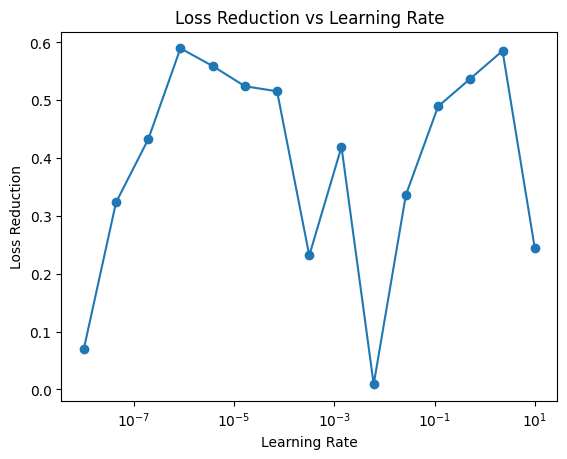

In [13]:
# Plot the loss reduction
plt.plot(learning_rates, loss_reductions, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Loss Reduction')
plt.title('Loss Reduction vs Learning Rate')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.show()

In [14]:
loss_reductions

[0.06986899563318777,
 0.3231441048034934,
 0.43231441048034935,
 0.5895196506550219,
 0.5589519650655022,
 0.5240174672489083,
 0.5152838427947598,
 0.2314410480349345,
 0.4192139737991266,
 0.008733624454148471,
 0.33624454148471616,
 0.4890829694323144,
 0.537117903930131,
 0.5851528384279476,
 0.2445414847161572]

In [15]:
learning_rates

[1e-08,
 4.393970560760795e-08,
 1.9306977288832494e-07,
 8.483428982440725e-07,
 3.727593720314938e-06,
 1.6378937069540644e-05,
 7.196856730011528e-05,
 0.00031622776601683794,
 0.001389495494373139,
 0.006105402296585339,
 0.02682695795279727,
 0.1178768634793589,
 0.5179474679231223,
 2.275845926074791,
 10.0]

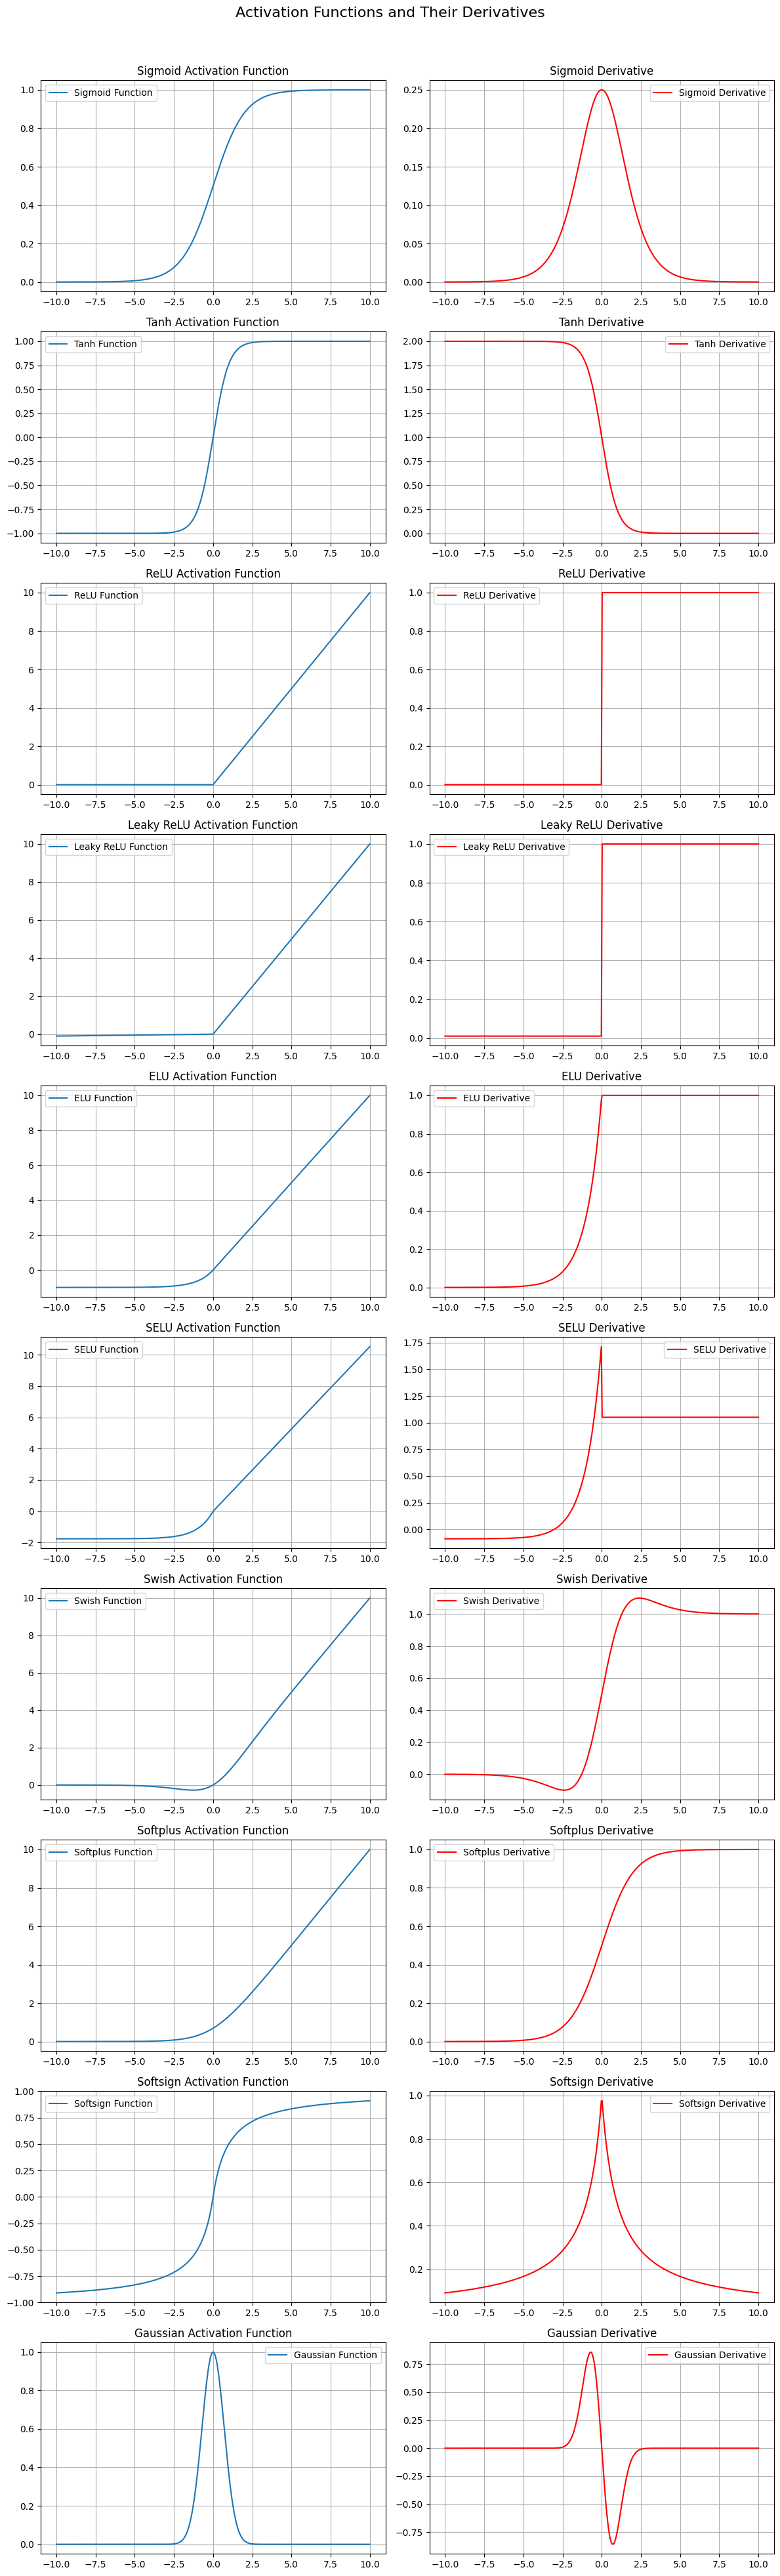

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)  

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def selu_derivative(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x > 0, 1, selu(x, alpha) + alpha)

def swish(x):
    return x * sigmoid(x)

def swish_derivative(x):
    return swish(x) + sigmoid(x) * (1 - swish(x))

def softplus(x):
    return np.log(1 + np.exp(x))

def softplus_derivative(x):
    return sigmoid(x)

def softsign(x):
    return x / (1 + np.abs(x))

def softsign_derivative(x):
    return 1 / (1 + np.abs(x))  

def gaussian(x):
    return np.exp(-x ** 2)

def gaussian_derivative(x):
    return -2 * x * gaussian(x)

activation_functions = {
    "Sigmoid": (sigmoid, sigmoid_derivative),
    "Tanh": (tanh, tanh_derivative),
    "ReLU": (relu, relu_derivative),
    "Leaky ReLU": (leaky_relu, leaky_relu_derivative),
    "ELU": (elu, elu_derivative),
    "SELU": (selu, selu_derivative),
    "Swish": (swish, swish_derivative),
    "Softplus": (softplus, softplus_derivative),
    "Softsign": (softsign, softsign_derivative),
    "Gaussian": (gaussian, gaussian_derivative)
}

# Plotting the activation functions and their derivatives
x = np.linspace(-10, 10, 400)

fig, axes = plt.subplots(10, 2, figsize=(12, 40))
fig.suptitle('Activation Functions and Their Derivatives', fontsize=16)

for i, (name, (func, derivative)) in enumerate(activation_functions.items()):
    y = func(x)
    y_prime = derivative(x)
    
    axes[i, 0].plot(x, y, label=f'{name} Function')
    axes[i, 0].set_title(f'{name} Activation Function')
    axes[i, 0].legend()
    axes[i, 0].grid(True)
    
    axes[i, 1].plot(x, y_prime, label=f'{name} Derivative', color='red')
    axes[i, 1].set_title(f'{name} Derivative')
    axes[i, 1].legend()
    axes[i, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
